In [ ]:
%%bash
rm -r /content/sample_data

The following codeblock is for taking apart the whole datasheet: "extracted_SRR_dates_remove_strings.csv" because it has nearly 60k rows, the maximum processing ability for google colab is 20k rows; thus we need to take the whole datasheet into three parts.

In [ ]:
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df_original = pd.read_csv('/content/extracted_SRR_dates_only_remove_strings.csv')
# Drop nan value in the column SRR_dates and update the dataframe
df = df_original.dropna(subset=['SRR_dates'])
# Make sure the column SRR_dates is string rather than the float
df['SRR_dates'] = df['SRR_dates'].astype(str)
# Calculate the number of rows for each chunk
chunk_size = len(df) // 3
print(chunk_size )

20547


<ipython-input-14-c402231d7273>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SRR_dates'] = df['SRR_dates'].astype(str)


In [ ]:
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df_original = pd.read_csv('/content/extracted_SRR_dates_only_remove_strings.csv')
# Drop nan value in the column SRR_dates and update the dataframe
df = df_original.dropna(subset=['SRR_dates'])
# Make sure the column SRR_dates is string rather than the float
df['SRR_dates'] = df['SRR_dates'].astype(str)
# Calculate the number of rows for each chunk
chunk_size = len(df) // 4
# Create four smaller DataFrames
df1 = df.iloc[:chunk_size]
df2 = df.iloc[chunk_size:2*chunk_size]
df3 = df.iloc[2*chunk_size:3*chunk_size]
df4 = df.iloc[3*chunk_size:]

df1.to_csv('/content/df1.csv')
df2.to_csv('/content/df2.csv')
df3.to_csv('/content/df3.csv')
df4.to_csv('/content/df4.csv')

<ipython-input-15-03c0b5ea0631>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SRR_dates'] = df['SRR_dates'].astype(str)


# **df1**

In [ ]:
from ast import And
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/df1.csv')
# Convert the column "accession_found" in the dataframe to list
gse_founds = df1['accession_found'].tolist()
# Convert the column "SRR_dates" in the dataframe to list
srr_dates = df1['SRR_dates'].tolist()
# The following section checks for one GSE IDs having how many duplicates
# This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
    # If the list is empty, the function returns an empty list [] and exits
    if not same_GSE_IDs:
        return []
    # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
    duplicate_gses = []
    # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
    i = 0
    # Iterate over the list while avoiding an index out of range error
    for count_gse in range(len(same_GSE_IDs) - 1):
      # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
        if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
          # If they are the same, i is incremented by 1
            i += 1
        else:
            # Append the count of consecutive elements and reset i
            duplicate_gses.append(i + 1)
            # The counter i is reset to 0 for the next set of consecutive duplicates
            i = 0
# After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
    duplicate_gses.append(i + 1)
    return duplicate_gses
# This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

# Call the function with gse_founds and print the results
chunks = find_the_number_of_same_GSE_IDs(gse_founds)
# Initialize a counter k
k = 0
# for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
print(chunks)
# Initialize a dictionary to store
date_counts = {}
# Iterate over all the items in the list-chunks
for chunk in chunks:
    # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
    gse_chunks = gse_founds[k:k+chunk]
    srr_dates_chunks = srr_dates[k:k+chunk]
    # Convert and sort the dates within the chunk
    sorted_dates = sort_dates(srr_dates_chunks)
    # Print the sorted dates for this chunk
    print(sorted_dates)

    # Handle the case where there's only one date in sorted_dates
    if len(sorted_dates) == 1:
        # The count of date equals to 1
        x = 1
        list_for_only_one = [sorted_dates[0]]
        print(x)
        print(list_for_only_one)
        # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
        date_counts[sorted_dates[0]] = 1
        print(date_counts)

    # Process only if there are more than one date
    if len(sorted_dates) > 1:
        # Initialize two counter x and z
        x = 0
        z = 0
        # Initialize three dictionaries to store the value
        date_counts1 = {}
        date_counts2 = {}
        date_counts3 = {}
        date_counts4 = {}

        if sorted_dates[-1] != sorted_dates[-2]:
           date_counts3[sorted_dates[-1]] = 1

    # Iterate over list "sorted_dates", "item" is actually a loop counter variable
        for item in range(len(sorted_dates)-1):
    # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
            if sorted_dates[item] == sorted_dates[item + 1]:
                # x increment by 1
                x += 1
                # z represents at the current stage how many dates are equal in total
                z = x + 1
                print(z)
                print([sorted_dates[item]])
               # The purpose of this line is to create or update an entry in the dictionary date_counts1-
               # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                date_counts1[sorted_dates[item]] = z
                date_counts4={**date_counts2, **date_counts1, **date_counts3}
             # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
            elif sorted_dates[item] != sorted_dates[item + 1]:
              # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                 if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                  # Then the total count for the first date which is different with others is 1
                    print(sorted_dates[item])
                    # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                    date_counts2[sorted_dates[item]] = 1
                 else:
                    if sorted_dates[item] == sorted_dates[item - 1]:
                       print(1)
                       print([sorted_dates[item + 1]])
                 x = 0
                 z = 0
        print(date_counts4)
    for q in range(k, k + chunk):
        df1.at[q, 'statistics'] = str(date_counts)
        df1.at[q, 'statistics'] = str(date_counts4)
# The next splicing starts from the line k+chunk
    k += chunk
df1

Streaming output truncated to the last 5000 lines.
['04/12/2019']
74
['04/12/2019']
75
['04/12/2019']
76
['04/12/2019']
77
['04/12/2019']
78
['04/12/2019']
79
['04/12/2019']
80
['04/12/2019']
81
['04/12/2019']
82
['04/12/2019']
83
['04/12/2019']
84
['04/12/2019']
85
['04/12/2019']
86
['04/12/2019']
87
['04/12/2019']
88
['04/12/2019']
89
['04/12/2019']
90
['04/12/2019']
91
['04/12/2019']
92
['04/12/2019']
93
['04/12/2019']
94
['04/12/2019']
95
['04/12/2019']
96
['04/12/2019']
97
['04/12/2019']
98
['04/12/2019']
99
['04/12/2019']
100
['04/12/2019']
101
['04/12/2019']
102
['04/12/2019']
103
['04/12/2019']
104
['04/12/2019']
105
['04/12/2019']
106
['04/12/2019']
107
['04/12/2019']
108
['04/12/2019']
109
['04/12/2019']
110
['04/12/2019']
111
['04/12/2019']
112
['04/12/2019']
113
['04/12/2019']
114
['04/12/2019']
115
['04/12/2019']
116
['04/12/2019']
117
['04/12/2019']
118
['04/12/2019']
119
['04/12/2019']
120
['04/12/2019']
121
['04/12/2019']
122
['04/12/2019']
123
['04/12/2019']
124
['04/1

,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,SRR_dates,GSE_dates,statistics
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX395600,10/6/2014,6-Oct-14,{'10/06/2014': 18}
1,1,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX395601,10/6/2014,6-Oct-14,{'10/06/2014': 18}
2,2,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX395602,10/6/2014,6-Oct-14,{'10/06/2014': 18}
3,3,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX395603,10/6/2014,6-Oct-14,{'10/06/2014': 18}
4,4,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX395604,10/6/2014,6-Oct-14,{'10/06/2014': 18}
...,...,...,...,...,...,...,...,...,...,...,...
15405,15853,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526367,3/2/2020,2-Mar-20,{'03/02/2020': 7}
15406,15854,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526368,3/2/2020,2-Mar-20,{'03/02/2020': 7}
15407,15855,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526369,3/2/2020,2-Mar-20,{'03/02/2020': 7}
15408,15856,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526370,3/2/2020,2-Mar-20,{'03/02/2020': 7}


In [ ]:
# Remove any rows where the combination of "accession_found" and "statistics" is not unique
df1_dropped = df1.drop_duplicates(subset=['accession_found', 'statistics'])
df1_dropped.to_csv('/content/df1_SRR_chunks.csv')

# **df2**

In [ ]:
from ast import And
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/df2.csv')
# Convert the column "accession_found" in the dataframe to list
gse_founds = df2['accession_found'].tolist()
# Convert the column "SRR_dates" in the dataframe to list
srr_dates = df2['SRR_dates'].tolist()
# The following section checks for one GSE IDs having how many duplicates
# This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
    # If the list is empty, the function returns an empty list [] and exits
    if not same_GSE_IDs:
        return []
    # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
    duplicate_gses = []
    # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
    i = 0
    # Iterate over the list while avoiding an index out of range error
    for count_gse in range(len(same_GSE_IDs) - 1):
      # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
        if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
          # If they are the same, i is incremented by 1
            i += 1
        else:
            # Append the count of consecutive elements and reset i
            duplicate_gses.append(i + 1)
            # The counter i is reset to 0 for the next set of consecutive duplicates
            i = 0
# After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
    duplicate_gses.append(i + 1)
    return duplicate_gses
# This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

# Call the function with gse_founds and print the results
chunks = find_the_number_of_same_GSE_IDs(gse_founds)
# Initialize a counter k
k = 0
# for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
print(chunks)
# Initialize a dictionary to store
date_counts = {}
# Iterate over all the items in the list-chunks
for chunk in chunks:
    # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
    gse_chunks = gse_founds[k:k+chunk]
    srr_dates_chunks = srr_dates[k:k+chunk]
    # Convert and sort the dates within the chunk
    sorted_dates = sort_dates(srr_dates_chunks)
    # Print the sorted dates for this chunk
    print(sorted_dates)

    # Handle the case where there's only one date in sorted_dates
    if len(sorted_dates) == 1:
        # The count of date equals to 1
        x = 1
        list_for_only_one = [sorted_dates[0]]
        print(x)
        print(list_for_only_one)
        # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
        date_counts[sorted_dates[0]] = 1
        print(date_counts)

    # Process only if there are more than one date
    if len(sorted_dates) > 1:
        # Initialize two counter x and z
        x = 0
        z = 0
        # Initialize three dictionaries to store the value
        date_counts1 = {}
        date_counts2 = {}
        date_counts3 = {}
        date_counts4 = {}
    #
        if sorted_dates[-1] != sorted_dates[-2]:
           date_counts3[sorted_dates[-1]] = 1

    # Iterate over list "sorted_dates", "item" is actually a loop counter variable
        for item in range(len(sorted_dates)-1):
    # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
            if sorted_dates[item] == sorted_dates[item + 1]:
                # x increment by 1
                x += 1
                # z represents at the current stage how many dates are equal in total
                z = x + 1
                print(z)
                print([sorted_dates[item]])
               # The purpose of this line is to create or update an entry in the dictionary date_counts1-
               # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                date_counts1[sorted_dates[item]] = z
                date_counts4={**date_counts2, **date_counts1, **date_counts3}
             # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
            elif sorted_dates[item] != sorted_dates[item + 1]:
              # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                 if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                  # Then the total count for the first date which is different with others is 1
                    print(sorted_dates[item])
                    # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                    date_counts2[sorted_dates[item]] = 1
                 else:
                    if sorted_dates[item] == sorted_dates[item - 1]:
                       print(1)
                       print([sorted_dates[item + 1]])
                 x = 0
                 z = 0
        print(date_counts4)
    for q in range(k, k + chunk):
        df2.at[q, 'statistics'] = str(date_counts)
        df2.at[q, 'statistics'] = str(date_counts4)
# The next splicing starts from the line k+chunk
    k += chunk
df2

Streaming output truncated to the last 5000 lines.
['04/10/2020']
79
['04/10/2020']
80
['04/10/2020']
81
['04/10/2020']
82
['04/10/2020']
83
['04/10/2020']
84
['04/10/2020']
85
['04/10/2020']
86
['04/10/2020']
87
['04/10/2020']
88
['04/10/2020']
89
['04/10/2020']
90
['04/10/2020']
91
['04/10/2020']
92
['04/10/2020']
93
['04/10/2020']
94
['04/10/2020']
95
['04/10/2020']
96
['04/10/2020']
97
['04/10/2020']
98
['04/10/2020']
99
['04/10/2020']
100
['04/10/2020']
101
['04/10/2020']
102
['04/10/2020']
103
['04/10/2020']
104
['04/10/2020']
105
['04/10/2020']
106
['04/10/2020']
107
['04/10/2020']
108
['04/10/2020']
109
['04/10/2020']
110
['04/10/2020']
111
['04/10/2020']
112
['04/10/2020']
113
['04/10/2020']
114
['04/10/2020']
115
['04/10/2020']
116
['04/10/2020']
117
['04/10/2020']
118
['04/10/2020']
119
['04/10/2020']
120
['04/10/2020']
121
['04/10/2020']
122
['04/10/2020']
123
['04/10/2020']
124
['04/10/2020']
125
['04/10/2020']
126
['04/10/2020']
127
['04/10/2020']
128
['04/10/2020']
129
[

,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,SRR_dates,GSE_dates,statistics
0,15858,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526372,3/2/2020,2-Mar-20,{'03/02/2020': 3}
1,15859,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526373,3/2/2020,2-Mar-20,{'03/02/2020': 3}
2,15860,"10.1101/592774, 10.1101/592774, 10.1101/592774...","10.1186/s12934-019-1167-0, 10.1186/s12934-019-...",GSE128360,"2019-03-30, 2019-03-30, 2019-03-30, 2019-03-30...","2019-06-29, 2019-06-29, 2019-06-29, 2019-06-29...",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5526374,3/2/2020,2-Mar-20,{'03/02/2020': 3}
3,15861,"10.1101/409748, 10.1101/409748, 10.1101/409748","10.1101/gad.321059.118, 10.1101/gad.321059.118...",GSE122417,"2018-09-05, 2018-09-05, 2018-09-05","2019-05-23, 2019-05-23, 2019-05-23",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5001007,11/14/2018,13-Nov-18,{'11/14/2018': 3}
4,15862,"10.1101/409748, 10.1101/409748, 10.1101/409748","10.1101/gad.321059.118, 10.1101/gad.321059.118...",GSE122417,"2018-09-05, 2018-09-05, 2018-09-05","2019-05-23, 2019-05-23, 2019-05-23",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX5001008,11/14/2018,13-Nov-18,{'11/14/2018': 3}
...,...,...,...,...,...,...,...,...,...,...,...
15405,31263,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325668,6/24/2020,24-Jun-20,{'06/24/2020': 97}
15406,31264,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325669,6/24/2020,24-Jun-20,{'06/24/2020': 97}
15407,31265,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325670,6/24/2020,24-Jun-20,{'06/24/2020': 97}
15408,31266,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325671,6/24/2020,24-Jun-20,{'06/24/2020': 97}


In [ ]:
# Remove any rows where the combination of "accession_found" and "statistics" is not unique
df2_dropped = df2.drop_duplicates(subset=['accession_found', 'statistics'])
df2_dropped.to_csv('/content/df2_SRR_chunks.csv')

# **df3**


In [ ]:
from ast import And
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df3 = pd.read_csv('/content/df3.csv')
# Convert the column "accession_found" in the dataframe to list
gse_founds = df3['accession_found'].tolist()
# Convert the column "SRR_dates" in the dataframe to list
srr_dates = df3['SRR_dates'].tolist()
# The following section checks for one GSE IDs having how many duplicates
# This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
    # If the list is empty, the function returns an empty list [] and exits
    if not same_GSE_IDs:
        return []
    # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
    duplicate_gses = []
    # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
    i = 0
    # Iterate over the list while avoiding an index out of range error
    for count_gse in range(len(same_GSE_IDs) - 1):
      # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
        if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
          # If they are the same, i is incremented by 1
            i += 1
        else:
            # Append the count of consecutive elements and reset i
            duplicate_gses.append(i + 1)
            # The counter i is reset to 0 for the next set of consecutive duplicates
            i = 0
# After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
    duplicate_gses.append(i + 1)
    return duplicate_gses
# This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

# Call the function with gse_founds and print the results
chunks = find_the_number_of_same_GSE_IDs(gse_founds)
# Initialize a counter k
k = 0
# for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
print(chunks)
# Initialize a dictionary to store
date_counts = {}
# Iterate over all the items in the list-chunks
for chunk in chunks:
    # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
    gse_chunks = gse_founds[k:k+chunk]
    srr_dates_chunks = srr_dates[k:k+chunk]
    # Convert and sort the dates within the chunk
    sorted_dates = sort_dates(srr_dates_chunks)
    # Print the sorted dates for this chunk
    print(sorted_dates)

    # Handle the case where there's only one date in sorted_dates
    if len(sorted_dates) == 1:
        # The count of date equals to 1
        x = 1
        list_for_only_one = [sorted_dates[0]]
        print(x)
        print(list_for_only_one)
        # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
        date_counts[sorted_dates[0]] = 1
        print(date_counts)

    # Process only if there are more than one date
    if len(sorted_dates) > 1:
        # Initialize two counter x and z
        x = 0
        z = 0
        # Initialize three dictionaries to store the value
        date_counts1 = {}
        date_counts2 = {}
        date_counts3 = {}
        date_counts4 = {}
    #
        if sorted_dates[-1] != sorted_dates[-2]:
           date_counts3[sorted_dates[-1]] = 1

    # Iterate over list "sorted_dates", "item" is actually a loop counter variable
        for item in range(len(sorted_dates)-1):
    # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
            if sorted_dates[item] == sorted_dates[item + 1]:
                # x increment by 1
                x += 1
                # z represents at the current stage how many dates are equal in total
                z = x + 1
                print(z)
                print([sorted_dates[item]])
               # The purpose of this line is to create or update an entry in the dictionary date_counts1-
               # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                date_counts1[sorted_dates[item]] = z
                date_counts4={**date_counts2, **date_counts1, **date_counts3}
             # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
            elif sorted_dates[item] != sorted_dates[item + 1]:
              # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                 if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                  # Then the total count for the first date which is different with others is 1
                    print(sorted_dates[item])
                    # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                    date_counts2[sorted_dates[item]] = 1
                 else:
                    if sorted_dates[item] == sorted_dates[item - 1]:
                       print(1)
                       print([sorted_dates[item + 1]])
                 x = 0
                 z = 0
        print(date_counts4)
    for q in range(k, k + chunk):
        df3.at[q, 'statistics'] = str(date_counts)
        df3.at[q, 'statistics'] = str(date_counts4)
# The next splicing starts from the line k+chunk
    k += chunk
df3

Streaming output truncated to the last 5000 lines.
['09/21/2020']
1
['09/21/2020']
{'06/03/2020': 1, '08/02/2020': 1, '11/21/2021': 1, '02/04/2020': 1, '11/19/2020': 1, '04/01/2021': 1, '09/21/2020': 1}
['02/26/2021', '02/26/2021', '02/26/2021', '02/26/2021']
2
['02/26/2021']
3
['02/26/2021']
4
['02/26/2021']
{'02/26/2021': 4}
['01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021', '01/04/2021']
2
['01/04/2021']
3
['01/04/2021']
4
['01/04/2021']
5
['01/04/2021']
6
['01/04/2021']
7
['01/04/2021']
8
['01/04/2021']
9
['01/04/2021']
10
['01/04/2021'

,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,SRR_dates,GSE_dates,statistics
0,31268,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325673,6/24/2020,24-Jun-20,{'06/24/2020': 131}
1,31269,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325674,6/24/2020,24-Jun-20,{'06/24/2020': 131}
2,31270,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325675,6/24/2020,24-Jun-20,{'06/24/2020': 131}
3,31271,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325676,6/24/2020,24-Jun-20,{'06/24/2020': 131}
4,31272,"10.1101/577478, 10.1101/577478, 10.1101/577478...","10.15252/msb.20209596, 10.15252/msb.20209596, ...",GSE150318,"2019-03-16, 2019-03-16, 2019-03-16, 2019-03-16","2020-06-18, 2020-06-18, 2020-06-18, 2020-06-18",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8325677,6/24/2020,24-Jun-20,{'06/24/2020': 131}
...,...,...,...,...,...,...,...,...,...,...,...
15405,47017,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531424,6/8/2021,23-Apr-21,{'06/08/2021': 196}
15406,47018,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531425,6/8/2021,23-Apr-21,{'06/08/2021': 196}
15407,47019,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531426,6/8/2021,23-Apr-21,{'06/08/2021': 196}
15408,47020,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531427,6/8/2021,23-Apr-21,{'06/08/2021': 196}


In [ ]:
# Remove any rows where the combination of "accession_found" and "statistics" is not unique
df3_dropped = df3.drop_duplicates(subset=['accession_found', 'statistics'])
df3_dropped.to_csv('/content/df3_SRR_chunks.csv')

In [ ]:
from ast import And
import pandas as pd
from datetime import datetime
# Load the CSV file into a DataFrame
df4 = pd.read_csv('/content/df4.csv')
# Convert the column "accession_found" in the dataframe to list
gse_founds = df4['accession_found'].tolist()
# Convert the column "SRR_dates" in the dataframe to list
srr_dates = df4['SRR_dates'].tolist()
# The following section checks for one GSE IDs having how many duplicates
# This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
    # If the list is empty, the function returns an empty list [] and exits
    if not same_GSE_IDs:
        return []
    # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
    duplicate_gses = []
    # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
    i = 0
    # Iterate over the list while avoiding an index out of range error
    for count_gse in range(len(same_GSE_IDs) - 1):
      # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
        if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
          # If they are the same, i is incremented by 1
            i += 1
        else:
            # Append the count of consecutive elements and reset i
            duplicate_gses.append(i + 1)
            # The counter i is reset to 0 for the next set of consecutive duplicates
            i = 0
# After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
    duplicate_gses.append(i + 1)
    return duplicate_gses
# This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

# Call the function with gse_founds and print the results
chunks = find_the_number_of_same_GSE_IDs(gse_founds)
# Initialize a counter k
k = 0
# for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
print(chunks)
# Initialize a dictionary to store
date_counts = {}
# Iterate over all the items in the list-chunks
for chunk in chunks:
    # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
    gse_chunks = gse_founds[k:k+chunk]
    srr_dates_chunks = srr_dates[k:k+chunk]
    # Convert and sort the dates within the chunk
    sorted_dates = sort_dates(srr_dates_chunks)
    # Print the sorted dates for this chunk
    print(sorted_dates)

    # Handle the case where there's only one date in sorted_dates
    if len(sorted_dates) == 1:
        # The count of date equals to 1
        x = 1
        list_for_only_one = [sorted_dates[0]]
        print(x)
        print(list_for_only_one)
        # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
        date_counts[sorted_dates[0]] = 1
        print(date_counts)

    # Process only if there are more than one date
    if len(sorted_dates) > 1:
        # Initialize two counter x and z
        x = 0
        z = 0
        # Initialize three dictionaries to store the value
        date_counts1 = {}
        date_counts2 = {}
        date_counts3 = {}
        date_counts4 = {}
    #
        if sorted_dates[-1] != sorted_dates[-2]:
           date_counts3[sorted_dates[-1]] = 1

    # Iterate over list "sorted_dates", "item" is actually a loop counter variable
        for item in range(len(sorted_dates)-1):
    # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
            if sorted_dates[item] == sorted_dates[item + 1]:
                # x increment by 1
                x += 1
                # z represents at the current stage how many dates are equal in total
                z = x + 1
                print(z)
                print([sorted_dates[item]])
               # The purpose of this line is to create or update an entry in the dictionary date_counts1-
               # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                date_counts1[sorted_dates[item]] = z
                date_counts4={**date_counts2, **date_counts1, **date_counts3}
             # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
            elif sorted_dates[item] != sorted_dates[item + 1]:
              # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                 if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                  # Then the total count for the first date which is different with others is 1
                    print(sorted_dates[item])
                    # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                    date_counts2[sorted_dates[item]] = 1
                 else:
                    if sorted_dates[item] == sorted_dates[item - 1]:
                       print(1)
                       print([sorted_dates[item + 1]])
                 x = 0
                 z = 0
        print(date_counts4)
    for q in range(k, k + chunk):
        df4.at[q, 'statistics'] = str(date_counts)
        df4.at[q, 'statistics'] = str(date_counts4)
# The next splicing starts from the line k+chunk
    k += chunk
df4

Streaming output truncated to the last 5000 lines.
18
['12/03/2021']
19
['12/03/2021']
20
['12/03/2021']
21
['12/03/2021']
22
['12/03/2021']
23
['12/03/2021']
24
['12/03/2021']
25
['12/03/2021']
26
['12/03/2021']
27
['12/03/2021']
28
['12/03/2021']
29
['12/03/2021']
30
['12/03/2021']
31
['12/03/2021']
32
['12/03/2021']
33
['12/03/2021']
34
['12/03/2021']
35
['12/03/2021']
36
['12/03/2021']
37
['12/03/2021']
38
['12/03/2021']
39
['12/03/2021']
40
['12/03/2021']
41
['12/03/2021']
42
['12/03/2021']
43
['12/03/2021']
44
['12/03/2021']
45
['12/03/2021']
46
['12/03/2021']
47
['12/03/2021']
48
['12/03/2021']
49
['12/03/2021']
50
['12/03/2021']
51
['12/03/2021']
52
['12/03/2021']
53
['12/03/2021']
54
['12/03/2021']
55
['12/03/2021']
56
['12/03/2021']
57
['12/03/2021']
58
['12/03/2021']
59
['12/03/2021']
60
['12/03/2021']
61
['12/03/2021']
62
['12/03/2021']
{'12/03/2021': 62}
['10/01/2021', '10/01/2021', '10/01/2021', '10/01/2021', '10/01/2021', '10/01/2021']
2
['10/01/2021']
3
['10/01/2021']
4

,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,SRR_dates,GSE_dates,statistics
0,47022,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531429,6/8/2021,23-Apr-21,{'06/08/2021': 304}
1,47023,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531430,6/8/2021,23-Apr-21,{'06/08/2021': 304}
2,47024,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531431,6/8/2021,23-Apr-21,{'06/08/2021': 304}
3,47025,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531432,6/8/2021,23-Apr-21,{'06/08/2021': 304}
4,47026,10.1101/2020.06.29.177147,10.1038/s41467-021-23588-w,GSE152295,6/29/2020,6/2/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX8531433,6/8/2021,23-Apr-21,{'06/08/2021': 304}
...,...,...,...,...,...,...,...,...,...,...,...
15408,62553,10.1101/2020.07.02.182758,10.1016/j.celrep.2021.110109,GSE178820,7/3/2020,12/14/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX11499342,11/19/2021,17-Nov-21,{'11/19/2021': 93}
15409,62554,10.1101/2020.07.02.182758,10.1016/j.celrep.2021.110109,GSE178820,7/3/2020,12/14/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX11499343,11/19/2021,17-Nov-21,{'11/19/2021': 93}
15410,62555,10.1101/2020.07.02.182758,10.1016/j.celrep.2021.110109,GSE178820,7/3/2020,12/14/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX11499344,11/19/2021,17-Nov-21,{'11/19/2021': 93}
15411,62556,10.1101/2020.07.02.182758,10.1016/j.celrep.2021.110109,GSE178820,7/3/2020,12/14/2021,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,https://www.ncbi.nlm.nih.gov/sra?term=SRX11499345,11/19/2021,17-Nov-21,{'11/19/2021': 93}


In [ ]:
# Remove any rows where the combination of "accession_found" and "statistics" is not unique
df4_dropped = df4.drop_duplicates(subset=['accession_found', 'statistics'])
df4_dropped.to_csv('/content/df4_SRR_chunks.csv')

# ***Concatenate three data frames into one ***

In [ ]:
df_result = pd.concat([df1_dropped,df2_dropped,df3_dropped,df4_dropped],ignore_index=True)
df_result.to_csv('/content/in_only_SRR_chunks.csv')

# **Convert numbers to the rate(%)**

In [ ]:
import pandas as pd

df_SRR_chunks_with_dic= pd.read_csv('/content/in_both_SRR_chunks.csv')

def calculate_rate(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    total_count = sum(dates_counts.values())

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        date, count = next(iter(dates_counts.items()))
        return {date: '100%'}
    # Situation 2: Multiple dates and values
    else:
        rate_dict = {date: f"{count / total_count * 100:.1f}%" for date, count in dates_counts.items()}
        return rate_dict

# Apply the function to each row and create a new column 'rate'
df_SRR_chunks_with_dic["{'SRR_Date' : 'rate'}"] = df_SRR_chunks_with_dic.apply(calculate_rate, axis=1)

print(df_SRR_chunks_with_dic)

                   preprint_doi               published_doi_x accession_found  \
0                10.1101/001107         10.1101/gr.181016.114        GSE58871   
1                10.1101/006171  10.1371/journal.pgen.1004663        GSE57483   
2                10.1101/006270           10.7554/eLife.03915        GSE58423   
3                10.1101/008136  10.1371/journal.pgen.1005118        GSE57608   
4                10.1101/012757         10.1534/g3.115.019497        GSE63488   
...                         ...                           ...             ...   
1227  10.1101/2020.12.28.424586    10.1172/jci.insight.147280       GSE163649   
1228  10.1101/2020.12.29.424680     10.3389/fnins.2021.671249       GSE160992   
1229  10.1101/2020.12.30.424365           10.7554/eLife.70514       GSE163775   
1230  10.1101/2020.12.30.424776        10.15252/msb.202110207       GSE158319   
1231  10.1101/2020.12.30.424817    10.1186/s13059-021-02453-5       GSE163896   

                           

In [ ]:
df_SRR_chunks_with_dic.to_csv("/content/in_both_SRR_chunks_with_rate.csv")

# **Let's investigate the pattern**

In [ ]:
import pandas as pd
import ast
df_SRR_rate = pd.read_csv('/content/in_both_SRR_chunks_with_rate.csv')

column_name = "{'SRR_Date' : 'rate'}"
# Create a boolean mask
mask = df_SRR_rate[column_name].apply(lambda x: len(ast.literal_eval(x)) >= 2 if isinstance(x, str) else False)

df_new = df_SRR_rate[mask]
df_new.to_csv("/content/more_than_two_times.csv")

In [ ]:
import pandas as pd
import ast

df_SRR_rate = pd.read_csv('/content/in_both_SRR_chunks_with_rate.csv')

first_day_values = []
last_day_values = []
first_day_values1 = []
last_day_values1 = []
mid_day_values = []
i = -1
x = 0
y = 0
for row in df_SRR_rate["{'SRR_Date' : 'rate'}"]:
        i += 1
        dict_row = ast.literal_eval(row)
        if isinstance(dict_row, dict):
           values = list(dict_row.values())

           if len(dict_row) == 1:
              df_SRR_rate.at[i,"Pattern_the_first_day"]= "N/A"
              df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]= "N/A"
              df_SRR_rate.at[i,"Pattern_the_last_day"]= "N/A"

           elif len(dict_row) == 2:
              x += 1
              print(x)
              first_day_values.append((values[0]))
              last_day_values.append((values[-1]))
              print(first_day_values)
              print(last_day_values)
              df_SRR_rate.at[i,"Pattern_the_first_day"]=first_day_values[x-1]
              df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]= "N/A"
              df_SRR_rate.at[i,"Pattern_the_last_day"]=last_day_values[x-1]
           elif len(dict_row) > 2:
                y += 1
                first_day_values1.append((values[0]))
                last_day_values1.append((values[-1]))
                first_day_value2 = float(values[0].rstrip('%'))
                last_day_value2 = float(values[-1].rstrip('%'))
                # Subtract the sum of the first and last values from 100
                mid_day_value = 100 - (first_day_value2 + last_day_value2)
                mid_day_values.append(f"{mid_day_value:1f}%")
                df_SRR_rate.at[i,"Pattern_the_first_day"]=first_day_values1[y-1]
                df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]=mid_day_values[y-1]
                df_SRR_rate.at[i,"Pattern_the_last_day"]=last_day_values1[y-1]
df_SRR_rate.to_csv('/content/in_both_with_pattern.csv')

1
['96.9%']
['3.1%']
2
['96.9%', '94.0%']
['3.1%', '6.0%']
3
['96.9%', '94.0%', '94.2%']
['3.1%', '6.0%', '5.8%']
4
['96.9%', '94.0%', '94.2%', '51.2%']
['3.1%', '6.0%', '5.8%', '48.8%']
5
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%']
6
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%', '85.3%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%', '14.7%']
7
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%', '85.3%', '75.0%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%', '14.7%', '25.0%']
8
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%', '85.3%', '75.0%', '10.5%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%', '14.7%', '25.0%', '89.5%']
9
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%', '85.3%', '75.0%', '10.5%', '5.1%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%', '14.7%', '25.0%', '89.5%', '94.9%']
10
['96.9%', '94.0%', '94.2%', '51.2%', '93.8%', '85.3%', '75.0%', '10.5%', '5.1%', '11.1%']
['3.1%', '6.0%', '5.8%', '48.8%', '6.2%', '14.7%', '25.0%', '89.5%', '94.9%', '88.9%']
11
[

# **Calculate the date interval between different days when SRR were published**

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/in_both_with_pattern.csv')

# Define a function to calculate the time intervals based on the scenario
def calculate_time_interval(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
       return None

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        return None
    # Situation 2: Multiple dates and values
    else:
        dates = sorted(dates_counts.keys())
        intervals = [abs((pd.to_datetime(dates[i + 1]) - pd.to_datetime(dates[i])).days) for i in range(len(dates) - 1)]

        # Format intervals as strings
        formatted_intervals = [f"{interval}" for interval in intervals]
        return "{" + ", ".join(formatted_intervals) + "}"

df['time_interval'] = df.apply(calculate_time_interval, axis=1)

df = df.fillna("N/A")
df.to_csv("/content/in_both_final.csv")

### **Copy the  "GSE_public_dates" from "SRR_and_GSE_dates_remove_strings" and paste it into the dataframe we obtained from the previous step("/content/in_both_final.csv")**

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/in_both_final.csv")
df2 = pd.read_csv("/content/SRR_and_GSE_dates_remove_strings.csv")
df1 = df1.merge(df2[['accession_found', 'GSE_public_dates']], on='accession_found', how='left')
df1

,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},NaN,NaN,NaN,NaN,23-Sep-14
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,9-May-14
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",4.50%,4.60%,90.90%,"{35, 367}",13-Jun-14
3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Apr-15
4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Dec-14
...,...,...,...,...,...,...,...,...,...,...
1227,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},NaN,NaN,NaN,NaN,22-Dec-20
1228,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},NaN,NaN,NaN,NaN,11-May-21
1229,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},NaN,NaN,NaN,NaN,7-Oct-21
1230,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},NaN,NaN,NaN,NaN,31-Oct-20


## **Find each GSE ID corresponding preprint published dates and publication published dates, and paste them into the dataframe we obtained from the previous step(df1)**

Let's deal with the preprint published date at first; at the very begining, we need to explode each cell(column: "GSE_accessions_found"; dataframe: "6834_simplified.csv") into multiple rows at first, this is because there are multiple GSE IDs in one cell.

In [ ]:
df_6834 = pd.read_csv("/content/6834_simplified.csv")
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].astype(str)
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].str.replace(' ', '')
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].str.split(',')
df_6834 = df_6834.explode('GSE_accessions_found')
df_6834

,preprint_doi1,published_doi1,published_journal,preprint_platform,preprint_date,published_date,preprint_author_corresponding,preprint_author_corresponding_institution,GSE_accessions_found,Unnamed: 9,1829 in 6834
0,10.1101/19001925,10.1093/hmg/ddz301,Human Molecular Genetics,medRxiv,7/12/2019,12/6/2019,Brock C. Christensen,Geisel School of Medicine at Dartmouth,GSE133918,NaN,echoed!
0,10.1101/19001925,10.1093/hmg/ddz301,Human Molecular Genetics,medRxiv,7/12/2019,12/6/2019,Brock C. Christensen,Geisel School of Medicine at Dartmouth,GSE133918,NaN,echoed!
0,10.1101/19001925,10.1093/hmg/ddz301,Human Molecular Genetics,medRxiv,7/12/2019,12/6/2019,Brock C. Christensen,Geisel School of Medicine at Dartmouth,GSE133918,NaN,echoed!
0,10.1101/19001925,10.1093/hmg/ddz301,Human Molecular Genetics,medRxiv,7/12/2019,12/6/2019,Brock C. Christensen,Geisel School of Medicine at Dartmouth,GSE133918,NaN,echoed!
0,10.1101/19001925,10.1093/hmg/ddz301,Human Molecular Genetics,medRxiv,7/12/2019,12/6/2019,Brock C. Christensen,Geisel School of Medicine at Dartmouth,GSE133918,NaN,echoed!
...,...,...,...,...,...,...,...,...,...,...,...
6832,10.1101/2022.10.31.514567,10.1073/pnas.2216822120,Proceedings of the National Academy of Sciences,bioRxiv,11/1/2022,1/18/2023,Steven E. Jacobsen,"Department of Molecular, Cell and Developmenta...",GSE206798,NaN,None!
6832,10.1101/2022.10.31.514567,10.1073/pnas.2216822120,Proceedings of the National Academy of Sciences,bioRxiv,11/1/2022,1/18/2023,Steven E. Jacobsen,"Department of Molecular, Cell and Developmenta...",GSE206798,NaN,None!
6833,10.1101/2020.12.20.423651,10.1038/s41589-022-01225-x,Nature Chemical Biology,bioRxiv,12/21/2020,1/12/2023,Hyun Youk,University of Massachusetts Medical School,GSE157642,NaN,None!
6834,10.1101/2021.11.03.467131,10.1038/s41586-022-05623-y,Nature,bioRxiv,11/3/2021,1/18/2023,Andrea Pauli,IMP,GSE32898,NaN,None!


In [ ]:
import pandas as pd
# Step 1: Rename the column in df2 to match the column name in df1 for a proper merge
df_6834 = df_6834.rename(columns={'GSE_accessions_found': 'accession_found', 'preprint_doi1': 'preprint_doi'})
# Step 2: Merge df1 with df_6834 on both 'accession_found' and 'preprint_doi' to get the 'preprint_date'
df1 = df1.merge(df_6834[['accession_found', 'preprint_doi', 'preprint_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_6834'))
# Overwrite the 'preprint_date' in df1 with the one from df2:
df1['preprint_publish_date_1'] = df1['preprint_date']
# Now df1 will have the 'preprint_date' from df2 where the 'accession_found' and 'preprint_doi' match
df1.drop(columns='preprint_date', inplace=True)
# Drop duplicated rows:
df1 = df1.drop_duplicates(subset=['accession_found', 'preprint_doi','published_doi_x',"{'SRR_Date' : 'count'}"], keep='last')
df1

,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,preprint_publish_date_1
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},NaN,NaN,NaN,NaN,23-Sep-14,12/3/2013
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,9-May-14,6/11/2014
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",4.50%,4.60%,90.90%,"{35, 367}",13-Jun-14,6/12/2014
3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Apr-15,8/18/2014
4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Dec-14,12/16/2014
...,...,...,...,...,...,...,...,...,...,...,...
1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},NaN,NaN,NaN,NaN,22-Dec-20,12/28/2020
1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},NaN,NaN,NaN,NaN,11-May-21,12/30/2020
1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},NaN,NaN,NaN,NaN,7-Oct-21,12/30/2020
1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},NaN,NaN,NaN,NaN,31-Oct-20,12/30/2020


Now, let's deal with publication published date:

In [ ]:
# Step 2: Merge df1 with df_6834 on both 'accession_found' and 'preprint_doi' to get the 'published_date'
df1 = df1.merge(df_6834[['accession_found', 'preprint_doi', 'published_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_6834'))
# Overwrite the 'published_date' in df1 with the one from df2:
df1['paper_publish_date_1'] = df1['published_date']
df1.drop(columns='published_date', inplace=True)
# Drop duplicated rows if there are any:
df1 = df1.drop_duplicates(subset=['accession_found', 'preprint_doi','published_doi_x',"{'SRR_Date' : 'count'}"], keep='last')
df1

,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,preprint_publish_date_1,paper_publish_date_1
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},NaN,NaN,NaN,NaN,23-Sep-14,12/3/2013,9/29/2014
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,9-May-14,6/11/2014,9/18/2014
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",4.50%,4.60%,90.90%,"{35, 367}",13-Jun-14,6/12/2014,11/7/2014
3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Apr-15,8/18/2014,4/2/2015
4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},NaN,NaN,NaN,NaN,17-Dec-14,12/16/2014,8/24/2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},NaN,NaN,NaN,NaN,22-Dec-20,12/28/2020,6/17/2021
1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},NaN,NaN,NaN,NaN,11-May-21,12/30/2020,5/14/2021
1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},NaN,NaN,NaN,NaN,7-Oct-21,12/30/2020,9/8/2021
1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},NaN,NaN,NaN,NaN,31-Oct-20,12/30/2020,6/7/2021


rearrange the sequence of columns:

In [ ]:
cols = df1.columns.tolist()
cols.insert(5, cols.pop(cols.index('preprint_publish_date_1')))  # Move 'col3' to the first position
cols.insert(6, cols.pop(cols.index('paper_publish_date_1')))
df1 = df1[cols]  # Reindex the DataFrame with the new column order
df1 = df1.fillna('N/A')
df1.to_csv('/content/in_both_final_new.csv')
df1

,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,N/A,N/A,N/A,N/A,23-Sep-14
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},6/11/2014,9/18/2014,N/A,N/A,N/A,N/A,9-May-14
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,"{35, 367}",13-Jun-14
3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,N/A,N/A,N/A,N/A,17-Apr-15
4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,N/A,N/A,N/A,N/A,17-Dec-14
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},12/28/2020,6/17/2021,N/A,N/A,N/A,N/A,22-Dec-20
1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},12/30/2020,5/14/2021,N/A,N/A,N/A,N/A,11-May-21
1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},12/30/2020,9/8/2021,N/A,N/A,N/A,N/A,7-Oct-21
1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},12/30/2020,6/7/2021,N/A,N/A,N/A,N/A,31-Oct-20


Let's get the latest_SRR_published_date at first, the reason of doing this because in the later step, we will compare the latest SRR published date with the GSE registration date to see it usally takes how long since people created the GSE ID and finally uploaded all the sequencing data.

In [ ]:
import pandas as pd
from datetime import datetime
# Read the CSV file
df_calculation= pd.read_csv('/content/in_both_final_new.csv')
# Define a function to obtain the last key in the dictionary
def calculate_rate(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        # Handle the case where the literal is not a valid dictionary
        return None
    # Check for situation 1: Only one date and value, obtain the first key
    if len(dates_counts) == 1:
        # Only one date (and value), get the first key
        return list(dates_counts.keys())[0]
    elif len(dates_counts) > 1:
        # Multiple dates and values, get the last key
        return list(dates_counts.keys())[-1]
    else:
        # Handle the case where the dictionary is empty
        return None
df_calculation['latest_SRR_published_date'] = df_calculation.apply(calculate_rate, axis=1)
# Now, let's convert the format of values in the column "GSE_publica_dates", to keep the same format with "latest_SRR_published_date"
df_calculation['GSE_public_dates'] = pd.to_datetime(df_calculation['GSE_public_dates'], format='%d-%b-%y')
df_calculation['GSE_public_dates'] = df_calculation['GSE_public_dates'].dt.strftime('%m/%d/%Y')
df_calculation

,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date
0,0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,NaN,09/23/2014,09/23/2014
1,1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,NaN,05/09/2014,07/22/2015
2,2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,"{35, 367}",06/13/2014,07/22/2015
3,3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,NaN,NaN,NaN,NaN,04/17/2015,07/22/2015
4,4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,NaN,NaN,NaN,NaN,12/17/2014,07/22/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},12/28/2020,6/17/2021,NaN,NaN,NaN,NaN,12/22/2020,12/25/2020
1228,1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},12/30/2020,5/14/2021,NaN,NaN,NaN,NaN,05/11/2021,05/13/2021
1229,1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},12/30/2020,9/8/2021,NaN,NaN,NaN,NaN,10/07/2021,10/09/2021
1230,1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},12/30/2020,6/7/2021,NaN,NaN,NaN,NaN,10/31/2020,11/01/2020


Now, let's get the earliest_SRR_published_date:

In [ ]:
def calculate_rate(row):
    try:
        # Assuming the 'row' argument contains a string representation of a dictionary
        # and the key for this dictionary is literally "{'SRR_Date' : 'count'}"
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])

        if dates_counts:
            # Return the first key if the dictionary is not empty
            return list(dates_counts.keys())[0]
        else:
            # Return None if the dictionary is empty
            return None

    except SyntaxError:
        # Handle the case where the literal is not a valid dictionary
        return None

# Apply the function to each row in the DataFrame
df_calculation['earliest_SRR_published_date'] = df_calculation.apply(calculate_rate, axis=1)

df_calculation

,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date
0,0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,NaN,09/23/2014,09/23/2014,09/23/2014
1,1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,NaN,05/09/2014,07/22/2015,07/22/2015
2,2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,"{35, 367}",06/13/2014,07/22/2015,06/15/2014
3,3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,NaN,NaN,NaN,NaN,04/17/2015,07/22/2015,07/22/2015
4,4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,NaN,NaN,NaN,NaN,12/17/2014,07/22/2015,07/22/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},12/28/2020,6/17/2021,NaN,NaN,NaN,NaN,12/22/2020,12/25/2020,12/25/2020
1228,1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},12/30/2020,5/14/2021,NaN,NaN,NaN,NaN,05/11/2021,05/13/2021,05/13/2021
1229,1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},12/30/2020,9/8/2021,NaN,NaN,NaN,NaN,10/07/2021,10/09/2021,10/09/2021
1230,1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},12/30/2020,6/7/2021,NaN,NaN,NaN,NaN,10/31/2020,11/01/2020,11/01/2020


Let's compare two dates: "GSE_public_dates" and "earliest_SRR_published_date" to determine who is the earlier one. If the earlier one is the GSE_public_dates, then it means that even if people have the access to the GSE ID, they still could not see any sequencing data in the NCBI; if the earlier one is the earliest_SRR_published_date, then it means that once people have the access to the GSE ID, they could immediately see sequencing data(in some situations, not all the sequencing data) in the NCBI.

In [ ]:
import pandas as pd
# Convert the columns to datetime
df_calculation['GSE_public_dates'] = pd.to_datetime(df_calculation['GSE_public_dates'], format='%m/%d/%Y')
df_calculation['earliest_SRR_published_date'] = pd.to_datetime(df_calculation['earliest_SRR_published_date'], format='%m/%d/%Y')
# Iterating over rows to compare dates and update 'sequencing_data_can_be_seen'
for index, row in df_calculation.iterrows():
    # Compare the dates
    if row['GSE_public_dates'] <= row['earliest_SRR_published_date']:
        df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['earliest_SRR_published_date']
    else:
        df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['GSE_public_dates']
df_calculation

,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen
0,0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,NaN,2014-09-23,09/23/2014,2014-09-23,2014-09-23
1,1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,NaN,2014-05-09,07/22/2015,2015-07-22,2015-07-22
2,2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,"{35, 367}",2014-06-13,07/22/2015,2014-06-15,2014-06-15
3,3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,NaN,NaN,NaN,NaN,2015-04-17,07/22/2015,2015-07-22,2015-07-22
4,4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,NaN,NaN,NaN,NaN,2014-12-17,07/22/2015,2015-07-22,2015-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},12/28/2020,6/17/2021,NaN,NaN,NaN,NaN,2020-12-22,12/25/2020,2020-12-25,2020-12-25
1228,1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},12/30/2020,5/14/2021,NaN,NaN,NaN,NaN,2021-05-11,05/13/2021,2021-05-13,2021-05-13
1229,1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},12/30/2020,9/8/2021,NaN,NaN,NaN,NaN,2021-10-07,10/09/2021,2021-10-09,2021-10-09
1230,1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},12/30/2020,6/7/2021,NaN,NaN,NaN,NaN,2020-10-31,11/01/2020,2020-11-01,2020-11-01


In [ ]:
df_calculation.to_csv("/content/in_both_with_calculation.csv")

Finally, let's calculate the date intervals between "sequencing_data_can_be_seen" and "preprint_publish_date_1"; "sequencing_data_can_be_seen" and "paper_publish_date_1":

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
df_calculation2 = pd.read_csv('/content/in_both_with_calculation.csv')
# Convert the columns to datetime, assuming the dates are in 'YYYY-MM-DD' format
df_calculation2['preprint_publish_date_1'] = pd.to_datetime(df_calculation2['preprint_publish_date_1'], format='%m/%d/%Y')
df_calculation2['paper_publish_date_1'] = pd.to_datetime(df_calculation2['paper_publish_date_1'], format='%m/%d/%Y')
df_calculation2['sequencing_data_can_be_seen'] = pd.to_datetime(df_calculation2['sequencing_data_can_be_seen'], format='%Y-%m-%d')

df_calculation2['sequencing_availa_subtracts_preprint_posting'] = (df_calculation2['sequencing_data_can_be_seen'] - df_calculation2['preprint_publish_date_1']).dt.days
df_calculation2['sequencing_availa_subtracts_publication_posting'] = (df_calculation2['sequencing_data_can_be_seen'] - df_calculation2['paper_publish_date_1']).dt.days

df_calculation2


,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting
0,0,0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},2013-12-03,2014-09-29,NaN,NaN,NaN,NaN,2014-09-23,09/23/2014,2014-09-23,2014-09-23,294,-6
1,1,1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},2014-06-11,2014-09-18,NaN,NaN,NaN,NaN,2014-05-09,07/22/2015,2015-07-22,2015-07-22,406,307
2,2,2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",2014-06-12,2014-11-07,4.50%,4.60%,90.90%,"{35, 367}",2014-06-13,07/22/2015,2014-06-15,2014-06-15,3,-145
3,3,3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},2014-08-18,2015-04-02,NaN,NaN,NaN,NaN,2015-04-17,07/22/2015,2015-07-22,2015-07-22,338,111
4,4,4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},2014-12-16,2015-08-24,NaN,NaN,NaN,NaN,2014-12-17,07/22/2015,2015-07-22,2015-07-22,218,-33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1227,1972,10.1101/2020.12.28.424586,10.1172/jci.insight.147280,GSE163649,{'12/25/2020': 9},{'12/25/2020': '100%'},2020-12-28,2021-06-17,NaN,NaN,NaN,NaN,2020-12-22,12/25/2020,2020-12-25,2020-12-25,-3,-174
1228,1228,1973,10.1101/2020.12.29.424680,10.3389/fnins.2021.671249,GSE160992,{'05/13/2021': 6},{'05/13/2021': '100%'},2020-12-30,2021-05-14,NaN,NaN,NaN,NaN,2021-05-11,05/13/2021,2021-05-13,2021-05-13,134,-1
1229,1229,1974,10.1101/2020.12.30.424365,10.7554/eLife.70514,GSE163775,{'10/09/2021': 8},{'10/09/2021': '100%'},2020-12-30,2021-09-08,NaN,NaN,NaN,NaN,2021-10-07,10/09/2021,2021-10-09,2021-10-09,283,31
1230,1230,1977,10.1101/2020.12.30.424776,10.15252/msb.202110207,GSE158319,{'11/01/2020': 341},{'11/01/2020': '100%'},2020-12-30,2021-06-07,NaN,NaN,NaN,NaN,2020-10-31,11/01/2020,2020-11-01,2020-11-01,-59,-218


Now, let's do the time pin to mark the different scienarios:

1: sequencing data shared before preprint and publication posting

2: sequencing data shared on the same date as preprint posting, but before the publication posting

3: sequencing data shared after preprint posting, but before the publication posting

4: sequencing data shared on the same date as publication posting

5: sequencing data shared after publication posting

In [ ]:
for index, row in df_calculation2.iterrows():
  if row['sequencing_availa_subtracts_preprint_posting']<0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=1
  elif row['sequencing_availa_subtracts_preprint_posting']==0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=2
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=3
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']==0:
    df_calculation2.at[index,'time_pin_1']=4
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']>0:
    df_calculation2.at[index,'time_pin_1']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = df_calculation2['time_pin_1'].isnull().sum()
print(null_sum )

df_calculation2.to_csv("/content/in_both_with_time_pin1.csv")

0


Now, let's deal with the dataset where GSE IDs do not have corresponding raw sequencing data; they are just gene expression data. In the following step, we will firstly merge the dataset of GSE IDs where they do not have raw sequencing data with "in_both_final.csv".

At the very begining, let's drop the duplicated rows:

In [ ]:
import pandas as pd
df_multiple = pd.read_csv("/content/extracted_gse_dates.csv")
df_multiple_dropped_duplicates = df_multiple.drop_duplicates(subset=['accession_found','preprint_doi','published_doi_x','SRX_links'])
df_multiple_dropped_duplicates

,preprint_doi,published_doi_x,accession_found,GSM_links,SRX_links,SRR_dates,GSE_public_dates
0,10.1101/002006,10.1186/1471-2164-15-962,GSE54119,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,14-May-15
11,10.1101/004853,10.1371/journal.pgen.1004402,GSE50759,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,5-May-14
107,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,9-May-14
171,10.1101/008607,10.7554/eLife.04525,GSE57025,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,23-Feb-15
362,10.1101/009373,10.7554/eLife.02504,GSE61417,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,4-Dec-14
...,...,...,...,...,...,...,...
10036,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,6-Oct-20
10046,10.1101/2020.11.08.373514,10.7554/eLife.64682,GSE160783,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,13-Apr-21
10082,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,11-May-21
10106,10.1101/2020.12.10.20246405,10.1038/s41380-021-01079-0,GSE137921,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,NaN,8-Apr-21


In [ ]:
columns_to_drop = ['SRX_links', 'SRR_dates', 'GSM_links']
df_multiple_dropped_duplicates = df_multiple_dropped_duplicates.drop(columns_to_drop, axis=1)
df_multiple_dropped_duplicates

,preprint_doi,published_doi_x,accession_found,GSE_public_dates
0,10.1101/002006,10.1186/1471-2164-15-962,GSE54119,14-May-15
11,10.1101/004853,10.1371/journal.pgen.1004402,GSE50759,5-May-14
107,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,9-May-14
171,10.1101/008607,10.7554/eLife.04525,GSE57025,23-Feb-15
362,10.1101/009373,10.7554/eLife.02504,GSE61417,4-Dec-14
...,...,...,...,...
10036,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,6-Oct-20
10046,10.1101/2020.11.08.373514,10.7554/eLife.64682,GSE160783,13-Apr-21
10082,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,11-May-21
10106,10.1101/2020.12.10.20246405,10.1038/s41380-021-01079-0,GSE137921,8-Apr-21


Now, let's merge them into one big dataset:

In [ ]:
combined_df = pd.concat([df_calculation2, df_multiple_dropped_duplicates], ignore_index=True)
combined_df

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,0.0,0.0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},2013-12-03,2014-09-29,NaN,NaN,NaN,NaN,2014-09-23,09/23/2014,2014-09-23,2014-09-23,294.0,-6.0,3.0
1,1.0,1.0,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 10},{'07/22/2015': '100%'},2014-06-11,2014-09-18,NaN,NaN,NaN,NaN,2014-05-09,07/22/2015,2015-07-22,2015-07-22,406.0,307.0,5.0
2,2.0,2.0,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",2014-06-12,2014-11-07,4.50%,4.60%,90.90%,"{35, 367}",2014-06-13,07/22/2015,2014-06-15,2014-06-15,3.0,-145.0,3.0
3,3.0,3.0,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},2014-08-18,2015-04-02,NaN,NaN,NaN,NaN,2015-04-17,07/22/2015,2015-07-22,2015-07-22,338.0,111.0,5.0
4,4.0,4.0,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},2014-12-16,2015-08-24,NaN,NaN,NaN,NaN,2014-12-17,07/22/2015,2015-07-22,2015-07-22,218.0,-33.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,NaN,NaN,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,6-Oct-20,NaN,NaN,NaT,NaN,NaN,NaN
1412,NaN,NaN,10.1101/2020.11.08.373514,10.7554/eLife.64682,GSE160783,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,13-Apr-21,NaN,NaN,NaT,NaN,NaN,NaN
1413,NaN,NaN,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,11-May-21,NaN,NaN,NaT,NaN,NaN,NaN
1414,NaN,NaN,10.1101/2020.12.10.20246405,10.1038/s41380-021-01079-0,GSE137921,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,8-Apr-21,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
combined_df.to_csv("/content/combined_df.csv")

However, the total number of GSE IDs that shared in both preprints and publications are 1,397; here we can see the total number is 1416. That means there are some overlaps between 1232 GSE IDs that have sequencing data and 184 GSE IDs that do not have sequencing data. These overlaps need to be checked manually and removed. In the following codeblock, we will match 1232 GSE IDs and 184 GSE IDs together based on the same GSE ID:

In [ ]:
df_merged = df_multiple_dropped_duplicates.merge(df_calculation2, on='accession_found', how='right')
df_merged.to_csv('/content/need_to_be_corrected.csv')

Let's do a test at first, to see the total number of the overlaps:

In [ ]:
df_need_to_be_corrected = pd.read_csv("/content/need_to_be_corrected.csv")
df_need_to_be_corrected['GSE_public_dates_x'].notna().sum()

52

Open the "need_to_be_corrected.csv" in the google sheet and rename it as "need_to_cover_false_values"; we add a column called "{'SRR_Date' : 'count'}_correct" to store the correct result that checked manually(search every GSE ID on the NCBI and see it's SRR run selector to verify the count and release date of GSE ID):

https://docs.google.com/spreadsheets/d/1gK5Olf-ASf6ruxrVdTl1yzl7iF4hImRYS8SjjXV7MjE/edit?usp=sharing


Now, let's drop the overlapped GSE IDs that occured in the category "GSE IDs do not have the sequencing data" at first("combined_df.csv"):

In [ ]:
import pandas as pd
combined_df_new = pd.read_csv("/content/combined_df.csv")
combined_df_new_drop = combined_df_new.drop_duplicates(subset=['accession_found'], keep = 'first')

combined_df_new_drop.to_csv('/content/combined_df_need_to_be_modified.csv')

False positive GSE IDs are removed. Now, Let's cover the wrong values in the "{'SRR_Date' : 'count'}" column with the correct value:

Download the modified csv from the previous google sheet link at first:

In [ ]:
import pandas as pd
# Read CSV file
manually_modified_df = pd.read_csv('/content/need_to_cover_false_values.csv')
# Iterate over the DataFrame and update values
for index, row in manually_modified_df.iterrows():
    if pd.notna(row["{'SRR_Date' : 'count'}_correct"]):  # Check for non-NaN
        manually_modified_df.at[index, "{'SRR_Date' : 'count'}"] = row["{'SRR_Date' : 'count'}_correct"]

In [ ]:
# Step 1: Merge DataFrames
ultimate_df = pd.merge(combined_df_new_drop, manually_modified_df[['accession_found', "{'SRR_Date' : 'count'}"]],
                     on=['accession_found'],
                     how='left',
                     suffixes=('', '_modified'))

# Step 2: Update Column
ultimate_df["{'SRR_Date' : 'count'}"] = ultimate_df["{'SRR_Date' : 'count'}_modified"].combine_first(ultimate_df["{'SRR_Date' : 'count'}"])

# Step 3: Drop Unnecessary Columns
ultimate_df.drop(columns=["{'SRR_Date' : 'count'}_modified"], inplace=True)

# ultimate_df now has the updated column
# Step 3: Drop Unnecessary Columns
ultimate_df.to_csv('/content/need_to_calcu_false_values.csv')

Now, let's change:

https://docs.google.com/spreadsheets/d/1WoOuWk5h8QhBF54V8BdK5trA4vAsc13DUsVoHcmuHKM/edit?usp=sharing

In [ ]:
# Filter rows where 'accession_found' is 'GSE163693'
condition = ultimate_df['accession_found'] == 'GSE163693'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'06/17/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '06/17/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '06/17/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '06/17/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 113
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -54

In [ ]:
# Filter rows where 'accession_found' is 'GSE86029'
condition1 = ultimate_df['accession_found'] == 'GSE86029'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition1, "{'SRR_Date' : 'rate'}"] = "{'04/17/2020': '100%'}"
ultimate_df.loc[condition1, 'latest_SRR_published_date'] = '04/17/2020'
ultimate_df.loc[condition1, 'earliest_SRR_published_date'] = '04/17/2020'
ultimate_df.loc[condition1, 'sequencing_data_can_be_seen'] = '04/17/2020'
ultimate_df.loc[condition1, 'sequencing_availa_subtracts_preprint_posting'] = 653
ultimate_df.loc[condition1, 'sequencing_availa_subtracts_publication_posting'] = 353

In [ ]:
# Filter rows where 'accession_found' is 'GSE132012'
condition2 = ultimate_df['accession_found'] == 'GSE132012'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition2, "{'SRR_Date' : 'rate'}"] = "{'10/03/2019': '100%'}"
ultimate_df.loc[condition2, 'latest_SRR_published_date'] = '10/03/2019'
ultimate_df.loc[condition2, 'earliest_SRR_published_date'] = '10/03/2019'
ultimate_df.loc[condition2, 'sequencing_data_can_be_seen'] = '10/03/2019'
ultimate_df.loc[condition2, 'sequencing_availa_subtracts_preprint_posting'] = 115
ultimate_df.loc[condition2, 'sequencing_availa_subtracts_publication_posting'] = -434

In [ ]:
# Filter rows where 'accession_found' is 'GSE153916'
condition3 = ultimate_df['accession_found'] == 'GSE153916'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition3, "{'SRR_Date' : 'rate'}"] = "{'08/02/2020': '100%'}"
ultimate_df.loc[condition3, 'latest_SRR_published_date'] = '08/02/2020'
ultimate_df.loc[condition3, 'earliest_SRR_published_date'] = '08/02/2020'
ultimate_df.loc[condition3, 'sequencing_data_can_be_seen'] = '08/02/2020'
ultimate_df.loc[condition3, 'sequencing_availa_subtracts_preprint_posting'] = 12
ultimate_df.loc[condition3, 'sequencing_availa_subtracts_publication_posting'] = -1
ultimate_df.loc[condition3, 'Pattern_the_first_day'] = ''
ultimate_df.loc[condition3, 'Pattern_the_last_day'] = ''
ultimate_df.loc[condition3, 'time_interval'] = ''

In [ ]:
# Filter rows where 'accession_found' is 'GSE154829'
condition4 = ultimate_df['accession_found'] == 'GSE154829'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition4, "{'SRR_Date' : 'rate'}"] = "{'07/23/2020': '85.4%', '09/09/2020': '14.6%'}"
ultimate_df.loc[condition4, 'latest_SRR_published_date'] = '09/09/2020'
ultimate_df.loc[condition4, 'earliest_SRR_published_date'] = '07/23/2020'
ultimate_df.loc[condition4, 'Pattern_the_first_day'] = '85.4%'
ultimate_df.loc[condition4, 'Pattern_the_last_day'] = '14.6%'

In [ ]:
ultimate_df.to_csv('/content/in_both_the_ultimate.csv')

In [ ]:
import pandas as pd
ultimate_df = pd.read_csv('/content/in_both_the_ultimate.csv')
def process_row(row):
    if pd.isna(row["{'SRR_Date' : 'count'}"]):  # Adjust the column name as needed
        # Convert the 'GSE_public_dates' column to DateTime format
        date_object = pd.to_datetime(row['GSE_public_dates'], format='%d-%b-%y')
        # Convert the datetime object to the new format MM/DD/YYYY
        row['GSE_public_dates'] = date_object.strftime("%m/%d/%Y")

    return row

# Apply the function to each row
ultimate_df = ultimate_df.apply(process_row, axis=1)

ultimate_df.to_csv('/content/in_both_the_ultimate_converted.csv')

Now, let's investigate the time interval between gene expression data public date and preprint/publication posting date:

At the very begining, let's compelete the preprint posting date and publication posting date for these 184-52 = 132 GSE IDs that do not have raw sequencing data.  

In [ ]:
df_6834 = pd.read_csv("/content/6834_simplified.csv")
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].astype(str)
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].str.replace(' ', '')
df_6834['GSE_accessions_found'] = df_6834['GSE_accessions_found'].str.split(',')
df_6834 = df_6834.explode('GSE_accessions_found')

In [ ]:
import pandas as pd
ultimate_need_to_complete = pd.read_csv('/content/in_both_the_ultimate_converted.csv')
ultimate_need_to_complete['accession_found'] = ultimate_need_to_complete['accession_found'].str.strip()
ultimate_new = ultimate_need_to_complete[pd.isna(ultimate_need_to_complete["{'SRR_Date' : 'count'}"])]
ultimate_new

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
1232,1232,1232,10.1101/002006,10.1186/1471-2164-15-962,GSE54119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/14/2015,NaN,NaN,NaN,NaN,NaN,NaN
1233,1233,1233,10.1101/004853,10.1371/journal.pgen.1004402,GSE50759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2014,NaN,NaN,NaN,NaN,NaN,NaN
1234,1234,1234,10.1101/008607,10.7554/eLife.04525,GSE57025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/23/2015,NaN,NaN,NaN,NaN,NaN,NaN
1235,1235,1235,10.1101/009373,10.7554/eLife.02504,GSE61417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/04/2014,NaN,NaN,NaN,NaN,NaN,NaN
1236,1236,1236,10.1101/013631,10.1371/journal.pgen.1005216,GSE64263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/17/2014,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1359,1359,10.1101/2020.10.18.344663,10.1016/j.isci.2021.102404,GSE156989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/29/2021,NaN,NaN,NaN,NaN,NaN,NaN
1360,1360,1360,10.1101/2020.10.26.20218636,10.1126/scitranslmed.abe4282,GSE158127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/28/2020,NaN,NaN,NaN,NaN,NaN,NaN
1361,1361,1361,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/06/2020,NaN,NaN,NaN,NaN,NaN,NaN
1362,1362,1362,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/11/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming df1(included in the df2) and df2 are your DataFrames.
# Step 1: Rename the column in df2 to match the column name in df1 for a proper merge
df_6834 = df_6834.rename(columns={'GSE_accessions_found': 'accession_found', 'preprint_doi1': 'preprint_doi'})
# Step 2: Merge df1 with df_6834 on both 'accession_found' and 'preprint_doi' to get the 'preprint_date'
ultimate_new = ultimate_new.merge(df_6834[['accession_found', 'preprint_doi', 'preprint_date','published_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_6834'))
# If you want to overwrite the 'preprint_date' in df1 with the one from df2, do the following:
ultimate_new['preprint_publish_date_1'] = ultimate_new['preprint_date']
ultimate_new['paper_publish_date_1'] = ultimate_new['published_date']
# Now df1 will have the 'preprint_date' from df2 where the 'accession_found' and 'preprint_doi' match.
ultimate_new.drop(columns=['preprint_date','published_date'], inplace=True)
# Drop duplicated rows:
ultimate_new.drop_duplicates(subset=['preprint_doi','accession_found'], inplace=True)
# Update the original DataFrame with the modified DataFrame
ultimate_new

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,1232,1232,10.1101/002006,10.1186/1471-2164-15-962,GSE54119,NaN,NaN,1/23/2014,11/7/2014,NaN,NaN,NaN,NaN,05/14/2015,NaN,NaN,NaN,NaN,NaN,NaN
1,1233,1233,10.1101/004853,10.1371/journal.pgen.1004402,GSE50759,NaN,NaN,5/6/2014,5/29/2014,NaN,NaN,NaN,NaN,05/05/2014,NaN,NaN,NaN,NaN,NaN,NaN
2,1234,1234,10.1101/008607,10.7554/eLife.04525,GSE57025,NaN,NaN,9/1/2014,2/3/2015,NaN,NaN,NaN,NaN,02/23/2015,NaN,NaN,NaN,NaN,NaN,NaN
3,1235,1235,10.1101/009373,10.7554/eLife.02504,GSE61417,NaN,NaN,9/18/2014,12/9/2014,NaN,NaN,NaN,NaN,12/04/2014,NaN,NaN,NaN,NaN,NaN,NaN
5,1236,1236,10.1101/013631,10.1371/journal.pgen.1005216,GSE64263,NaN,NaN,1/10/2015,5/7/2015,NaN,NaN,NaN,NaN,12/17/2014,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1359,1359,10.1101/2020.10.18.344663,10.1016/j.isci.2021.102404,GSE156989,NaN,NaN,10/19/2020,4/16/2021,NaN,NaN,NaN,NaN,03/29/2021,NaN,NaN,NaN,NaN,NaN,NaN
274,1360,1360,10.1101/2020.10.26.20218636,10.1126/scitranslmed.abe4282,GSE158127,NaN,NaN,10/27/2020,11/30/2020,NaN,NaN,NaN,NaN,10/28/2020,NaN,NaN,NaN,NaN,NaN,NaN
279,1361,1361,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,NaN,NaN,11/6/2020,4/19/2021,NaN,NaN,NaN,NaN,10/06/2020,NaN,NaN,NaN,NaN,NaN,NaN
282,1362,1362,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,NaN,NaN,11/27/2020,5/25/2021,NaN,NaN,NaN,NaN,05/11/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ultimate_final = pd.concat([ultimate_need_to_complete, ultimate_new], ignore_index=True)
ultimate_final = ultimate_final.drop_duplicates(subset=['accession_found'], keep='last')

ultimate_final

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi_x,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,0,0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,NaN,9/23/2014,9/23/2014,9/23/2014,9/23/2014,294.0,-6.0,3.0
1,1,1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 35},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,NaN,5/9/2014,7/22/2015,7/22/2015,7/22/2015,406.0,307.0,5.0
2,2,2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,"{35, 367}",6/13/2014,7/22/2015,6/15/2014,6/15/2014,3.0,-145.0,3.0
3,3,3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,NaN,NaN,NaN,NaN,4/17/2015,7/22/2015,7/22/2015,7/22/2015,338.0,111.0,5.0
4,4,4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,NaN,NaN,NaN,NaN,12/17/2014,7/22/2015,7/22/2015,7/22/2015,218.0,-33.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1359,1359,10.1101/2020.10.18.344663,10.1016/j.isci.2021.102404,GSE156989,NaN,NaN,10/19/2020,4/16/2021,NaN,NaN,NaN,NaN,03/29/2021,NaN,NaN,NaN,NaN,NaN,NaN
1492,1360,1360,10.1101/2020.10.26.20218636,10.1126/scitranslmed.abe4282,GSE158127,NaN,NaN,10/27/2020,11/30/2020,NaN,NaN,NaN,NaN,10/28/2020,NaN,NaN,NaN,NaN,NaN,NaN
1493,1361,1361,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,NaN,NaN,11/6/2020,4/19/2021,NaN,NaN,NaN,NaN,10/06/2020,NaN,NaN,NaN,NaN,NaN,NaN
1494,1362,1362,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,NaN,NaN,11/27/2020,5/25/2021,NaN,NaN,NaN,NaN,05/11/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in ultimate_final.iterrows():
    # Convert 'GSE_public_dates' to Timestamp if it's not already
    gse_public_date = pd.to_datetime(row['GSE_public_dates'])

    # Ensure 'preprint_publish_date_1' and 'paper_publish_date_1' are also Timestamps
    preprint_publish_date = pd.to_datetime(row['preprint_publish_date_1'])
    paper_publish_date = pd.to_datetime(row['paper_publish_date_1'])

    # Calculate the differences in days
    ultimate_final.at[index, 'GeneExpression_availa_subtracts_preprint_posting'] = (gse_public_date - preprint_publish_date).days
    ultimate_final.at[index, 'GeneExpression_availa_subtracts_publication_posting'] = (gse_public_date - paper_publish_date).days


Now, let's do the time pin to mark the different scienarios:

1: Gene expression data shared before preprint and publication posting

2: Gene expression data shared on the same date as preprint posting, but before the publication posting

3: Gene expression data shared after preprint posting, but before the publication posting

4: Gene expression data shared on the same date as publication posting

5: Gene expression data shared after publication posting

In [ ]:
for index, row in ultimate_final.iterrows():
  if row['GeneExpression_availa_subtracts_preprint_posting']<0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=1
  elif row['GeneExpression_availa_subtracts_preprint_posting']==0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=2
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=3
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']==0:
    ultimate_final.at[index,'time_pin_2']=4
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']>0:
    ultimate_final.at[index,'time_pin_2']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = ultimate_final['time_pin_2'].isnull().sum()
print(null_sum )

0


In [ ]:
ultimate_final.to_csv('/content/in_both_ultimate_final.csv')

# **Now Let's deal with GSE IDs shared only in publication**

# **Statistics on how many times that authors upload SRR runs**

In [ ]:
import pandas as pd
import ast  # for safely evaluating strings as python expressions
df_SRR_rate = pd.read_csv('/content/in_only_SRR.csv')
for i in range(1, 12):
    count = 0
    for row in df_SRR_rate["{'SRR_Date' : 'rate'}"]:
        # Convert the string representation of a dictionary to an actual dictionary
        try:
            dict_row = ast.literal_eval(row)
            if isinstance(dict_row, dict) and len(dict_row) == i:
                count += 1
        except:
            pass  # in case the row cannot be converted to a dictionary
    print(f"{count} studies uploaded all SRR runs in {i} time/times")

1506 studies uploaded all SRR runs in 1 time/times
81 studies uploaded all SRR runs in 2 time/times
14 studies uploaded all SRR runs in 3 time/times
5 studies uploaded all SRR runs in 4 time/times
0 studies uploaded all SRR runs in 5 time/times
1 studies uploaded all SRR runs in 6 time/times
0 studies uploaded all SRR runs in 7 time/times
0 studies uploaded all SRR runs in 8 time/times
0 studies uploaded all SRR runs in 9 time/times
0 studies uploaded all SRR runs in 10 time/times
1 studies uploaded all SRR runs in 11 time/times


# **Let's investigate the pattern**

In [ ]:
import pandas as pd
import ast
df_SRR_rate = pd.read_csv('/content/in_only_SRR.csv')
# Assuming 'column_name' is the name of the column containing the dictionary strings
column_name = "{'SRR_Date' : 'rate'}"  # replace with your actual column name
# Create a boolean mask
mask = df_SRR_rate[column_name].apply(lambda x: len(ast.literal_eval(x)) >= 2 if isinstance(x, str) else False)
# Apply the mask to the DataFrame
df_new = df_SRR_rate[mask]
df_new.to_csv("/content/more_than_two_times.csv")

In [ ]:
import pandas as pd
import ast

df_SRR_rate = pd.read_csv('/content/in_only_SRR.csv')

first_day_values = []
last_day_values = []
first_day_values1 = []
last_day_values1 = []
mid_day_values = []
i = -1
x = 0
y = 0
for row in df_SRR_rate["{'SRR_Date' : 'rate'}"]:
        i += 1
        dict_row = ast.literal_eval(row)
        if isinstance(dict_row, dict):
           values = list(dict_row.values())

           if len(dict_row) == 1:
              df_SRR_rate.at[i,"Pattern_the_first_day"]= "N/A"
              df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]= "N/A"
              df_SRR_rate.at[i,"Pattern_the_last_day"]= "N/A"

           elif len(dict_row) == 2:
              x += 1
              print(x)
              first_day_values.append((values[0]))  # Convert to float and append
              last_day_values.append((values[-1]))  # Convert to float and append
              print(first_day_values)
              print(last_day_values)
              df_SRR_rate.at[i,"Pattern_the_first_day"]=first_day_values[x-1]
              df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]= "N/A"
              df_SRR_rate.at[i,"Pattern_the_last_day"]=last_day_values[x-1]
           elif len(dict_row) > 2:
                y += 1
                first_day_values1.append((values[0]))
                last_day_values1.append((values[-1]))
                first_day_value2 = float(values[0].rstrip('%'))
                last_day_value2 = float(values[-1].rstrip('%'))
                # Assuming you want to subtract the sum of the first and last values from 100
                mid_day_value = 100 - (first_day_value2 + last_day_value2)
                mid_day_values.append(f"{mid_day_value:1f}%")  # Convert back to percentage format
                df_SRR_rate.at[i,"Pattern_the_first_day"]=first_day_values1[y-1]
                df_SRR_rate.at[i,"Pattern_dates_in_the_middle"]=mid_day_values[y-1]
                df_SRR_rate.at[i,"Pattern_the_last_day"]=last_day_values1[y-1]
df_SRR_rate.to_csv('/content/in_only_with_pattern.csv')

1
['40.0%']
['60.0%']
2
['40.0%', '83.3%']
['60.0%', '16.7%']
3
['40.0%', '83.3%', '83.3%']
['60.0%', '16.7%', '16.7%']
4
['40.0%', '83.3%', '83.3%', '98.4%']
['60.0%', '16.7%', '16.7%', '1.6%']
5
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%']
6
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%', '80.0%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%', '20.0%']
7
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%', '80.0%', '97.8%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%', '20.0%', '2.2%']
8
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%', '80.0%', '97.8%', '95.8%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%', '20.0%', '2.2%', '4.2%']
9
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%', '80.0%', '97.8%', '95.8%', '97.0%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%', '20.0%', '2.2%', '4.2%', '3.0%']
10
['40.0%', '83.3%', '83.3%', '98.4%', '99.1%', '80.0%', '97.8%', '95.8%', '97.0%', '3.8%']
['60.0%', '16.7%', '16.7%', '1.6%', '0.9%', '20.0%', '2.2%', '4.2%', '3.0%', '

### **Copy the  "GSE_public_dates" from "SRR_and_GSE_dates_only_in_pub" and paste it into the dataframe we obtained from the previous step("/content/in_only_with_pattern.csv")**

In [ ]:
df1 = pd.read_csv("/content/in_only_with_pattern.csv")
df2 = pd.read_csv("/content/SRR_and_GSE_dates_only_in_pub.csv")
df1 = df1.merge(df2[['accession_found', 'GSE_public_dates']], on='accession_found', how='left')
df1

,Unnamed: 0,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,6-Oct-14
1,1,"10.1101/003202, 10.1101/003202","10.1093/hmg/ddu359, 10.1093/hmg/ddu359",GSE50398,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,17-Jul-14
2,2,10.1101/006130,10.7717/peerj.869,GSE64673,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,7-Jan-15
3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,4-Mar-15
4,4,10.1101/013029,10.1038/srep09597,GSE64990,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,3-Jan-16
...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,"10.1101/2021.11.21.469458, 10.1101/2021.11.21....","10.7554/eLife.75508, 10.7554/eLife.75508",GSE184705,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,30-Dec-21
1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,23-Jan-22
1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,20-Dec-21
1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,4-Jan-22


In [ ]:
import pandas as pd
df1['published_doi'] = df1['published_doi'].astype(str)
df1['published_doi'] = df1['published_doi'].str.replace(' ', '')
df1['published_doi'] = df1['published_doi'].str.split(',')
df1 = df1.explode('published_doi')
# Drop duplicated rows:
df1 = df1.drop_duplicates(subset=['accession_found','preprint_doi','published_doi',"{'SRR_Date' : 'count'}"], keep='last')
df1

,Unnamed: 0,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,6-Oct-14
1,1,"10.1101/003202, 10.1101/003202",10.1093/hmg/ddu359,GSE50398,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,17-Jul-14
2,2,10.1101/006130,10.7717/peerj.869,GSE64673,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,7-Jan-15
3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,4-Mar-15
4,4,10.1101/013029,10.1038/srep09597,GSE64990,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,3-Jan-16
...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,"10.1101/2021.11.21.469458, 10.1101/2021.11.21....",10.7554/eLife.75508,GSE184705,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,30-Dec-21
1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,23-Jan-22
1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,20-Dec-21
1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,4-Jan-22


In [ ]:
import pandas as pd
df1['preprint_doi'] = df1['preprint_doi'].astype(str)
df1['preprint_doi'] = df1['preprint_doi'].str.replace(' ', '')
df1['preprint_doi'] = df1['preprint_doi'].str.split(',')
df1 = df1.explode('preprint_doi')
# Drop duplicated rows:
df1 = df1.drop_duplicates(subset=['accession_found','preprint_doi','published_doi',"{'SRR_Date' : 'count'}"], keep='last')
df1

,Unnamed: 0,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,6-Oct-14
1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,17-Jul-14
2,2,10.1101/006130,10.7717/peerj.869,GSE64673,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,7-Jan-15
3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,4-Mar-15
4,4,10.1101/013029,10.1038/srep09597,GSE64990,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,3-Jan-16
...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,30-Dec-21
1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,23-Jan-22
1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,20-Dec-21
1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,4-Jan-22


## **Find each GSE ID corresponding preprint published dates and publication published dates, and paste them into the dataframe we obtained from the previous step(df1)**

Let's deal with the preprint published date at first; at the very begining, we need to explode each cell(columns: "preprint_doi" and "published_doi"; dataframe: "1810_None.csv") into multiple rows at first, this is because there might be multiple GSE IDs in one cell.

In [ ]:
import pandas as pd
df_1810 = pd.read_csv("/content/1810_None.csv")
df_1810['published_doi'] = df_1810['published_doi'].astype(str)
df_1810['published_doi'] = df_1810['published_doi'].str.replace(' ', '')
df_1810['published_doi'] = df_1810['published_doi'].str.split(',')
df_1810 = df_1810.explode('published_doi')
# Drop duplicated rows:
df_1810 = df_1810.drop_duplicates(subset=['accession_found'], keep='last')
df_1810

,Unnamed: 0,pmc_ID,accession,converted_accession,repository,reuse_role,published_doi,preprint_doi,preprint_platform,preprint_title,preprint_authors,preprint_category,preprint_date,published_date,Unnamed: 14,1397 in 3177,accession_found
0,1,PMC4132098,GSE57440,"SRP041142, GSE57440","SRA, GEO","G, G",10.1371/journal.pone.0103207,"10.1101/005611, 10.1101/005611","bioRxiv, bioRxiv",A comparative study of techniques for differen...,Zong Hong Zhang;Dhanisha J. Jhaveri;Vikki M. M...,"Bioinformatics , Bioinformatics","2014-05-28, 2014-05-28","2014-08-13, 2014-08-13",NaN,None!,GSE57440
1,3,PMC4180976,GSE53463,GSE53463,GEO,G,10.1101/gad.241422.114,10.1101/003293,bioRxiv,Distinct structural transitions of chromatin t...,François Le Dily;Davide Baù;Andy Pohl;Guillerm...,Genomics,3/13/2014,10/1/2014,NaN,None!,GSE53463
2,5,PMC4240194,GSE50398,"ERP004227, GSE50398","SRA, GEO","G, G",10.1093/hmg/ddu359,"10.1101/003202, 10.1101/003202","bioRxiv, bioRxiv",TCF7L2 is a master regulator of insulin produc...,Yuedan Zhou;Soo-Young Park;Jing Su;Kathleen Ba...,"Cell Biology , Cell Biology","2014-03-05, 2014-03-05","2014-07-11, 2014-07-11",NaN,None!,GSE50398
3,11,PMC4380159,GSE64673,GSE64673,GEO,G,10.7717/peerj.869,10.1101/006130,bioRxiv,Validation of methods for Low-volume RNA-seq,Peter Acuña Combs;Michael B Eisen;,Genomics,6/10/2014,3/26/2015,NaN,None!,GSE64673
4,12,PMC4381059,GSE61099,GSE61099,GEO,G,10.1093/nar/gkv137,10.1101/005413,bioRxiv,A genome-wide analysis of Cas9 binding specifi...,Henriette O'Geen;Isabelle M. Henry;Mital S. Bh...,Molecular Biology,5/22/2014,2/25/2015,NaN,None!,GSE61099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,3167,PMC8872733,GSE194100,GSE194100,GEO,G,10.1073/pnas.2116662119,10.1101/2021.09.03.458900,bioRxiv,The m6A reader YTHDC2 is essential for escape ...,"Macveigh-Fierro, D.; Cicerchia, A.; Cadorette,...",microbiology,9/4/2021,2/17/2022,NaN,None!,GSE194100
1806,3169,PMC8874938,GSE172466,"GSE172465, GSE172466","GEO, GEO","G, G",10.3390/toxins14020069,"10.1101/2021.06.11.448004, 10.1101/2021.06.11....","bioRxiv, bioRxiv",Stx2 Induces Differential Gene Expression by A...,"Obata, F.; Ozuru, R.; Tsuji, T.; Matsuba, T.; ...","pathology, pathology","2021-06-11, 2021-06-11","2022-01-19, 2022-01-19",NaN,None!,GSE172466
1807,3170,PMC8880437,GSE191153,GSE191153,GEO,G,10.1371/journal.pone.0262374,10.1101/2021.12.26.474199,bioRxiv,Transcriptional signatures of clonally derived...,"Theisen, T. C.; Boothroyd, J. C.",microbiology,12/26/2021,2/25/2022,NaN,None!,GSE191153
1808,3175,PMC8889149,GSE153069,GSE153069,GEO,G,10.1016/j.isci.2022.103838,10.1101/2020.08.20.259101,bioRxiv,Patterning the embryonic pulmonary mesenchyme,"Goodwin, K.; Jaslove, J. M.; Tao, H.; Zhu, M.;...",developmental biology,8/20/2020,1/30/2022,NaN,None!,GSE153069


In [ ]:
import pandas as pd
df_1810['preprint_doi'] = df_1810['preprint_doi'].astype(str)
df_1810['preprint_doi'] = df_1810['preprint_doi'].str.replace(' ', '')
df_1810['preprint_doi'] = df_1810['preprint_doi'].str.split(',')
df_1810 = df_1810.explode('preprint_doi')
# Drop duplicated rows:
df_1810 = df_1810.drop_duplicates(subset=['accession_found'], keep='last')
df_1810.to_csv("1810_simplified.csv", index=False)
df_1810

,Unnamed: 0,pmc_ID,accession,converted_accession,repository,reuse_role,published_doi,preprint_doi,preprint_platform,preprint_title,preprint_authors,preprint_category,preprint_date,published_date,Unnamed: 14,1397 in 3177,accession_found
0,1,PMC4132098,GSE57440,"SRP041142, GSE57440","SRA, GEO","G, G",10.1371/journal.pone.0103207,10.1101/005611,"bioRxiv, bioRxiv",A comparative study of techniques for differen...,Zong Hong Zhang;Dhanisha J. Jhaveri;Vikki M. M...,"Bioinformatics , Bioinformatics","2014-05-28, 2014-05-28","2014-08-13, 2014-08-13",NaN,None!,GSE57440
1,3,PMC4180976,GSE53463,GSE53463,GEO,G,10.1101/gad.241422.114,10.1101/003293,bioRxiv,Distinct structural transitions of chromatin t...,François Le Dily;Davide Baù;Andy Pohl;Guillerm...,Genomics,3/13/2014,10/1/2014,NaN,None!,GSE53463
2,5,PMC4240194,GSE50398,"ERP004227, GSE50398","SRA, GEO","G, G",10.1093/hmg/ddu359,10.1101/003202,"bioRxiv, bioRxiv",TCF7L2 is a master regulator of insulin produc...,Yuedan Zhou;Soo-Young Park;Jing Su;Kathleen Ba...,"Cell Biology , Cell Biology","2014-03-05, 2014-03-05","2014-07-11, 2014-07-11",NaN,None!,GSE50398
3,11,PMC4380159,GSE64673,GSE64673,GEO,G,10.7717/peerj.869,10.1101/006130,bioRxiv,Validation of methods for Low-volume RNA-seq,Peter Acuña Combs;Michael B Eisen;,Genomics,6/10/2014,3/26/2015,NaN,None!,GSE64673
4,12,PMC4381059,GSE61099,GSE61099,GEO,G,10.1093/nar/gkv137,10.1101/005413,bioRxiv,A genome-wide analysis of Cas9 binding specifi...,Henriette O'Geen;Isabelle M. Henry;Mital S. Bh...,Molecular Biology,5/22/2014,2/25/2015,NaN,None!,GSE61099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,3167,PMC8872733,GSE194100,GSE194100,GEO,G,10.1073/pnas.2116662119,10.1101/2021.09.03.458900,bioRxiv,The m6A reader YTHDC2 is essential for escape ...,"Macveigh-Fierro, D.; Cicerchia, A.; Cadorette,...",microbiology,9/4/2021,2/17/2022,NaN,None!,GSE194100
1806,3169,PMC8874938,GSE172466,"GSE172465, GSE172466","GEO, GEO","G, G",10.3390/toxins14020069,10.1101/2021.06.11.448004,"bioRxiv, bioRxiv",Stx2 Induces Differential Gene Expression by A...,"Obata, F.; Ozuru, R.; Tsuji, T.; Matsuba, T.; ...","pathology, pathology","2021-06-11, 2021-06-11","2022-01-19, 2022-01-19",NaN,None!,GSE172466
1807,3170,PMC8880437,GSE191153,GSE191153,GEO,G,10.1371/journal.pone.0262374,10.1101/2021.12.26.474199,bioRxiv,Transcriptional signatures of clonally derived...,"Theisen, T. C.; Boothroyd, J. C.",microbiology,12/26/2021,2/25/2022,NaN,None!,GSE191153
1808,3175,PMC8889149,GSE153069,GSE153069,GEO,G,10.1016/j.isci.2022.103838,10.1101/2020.08.20.259101,bioRxiv,Patterning the embryonic pulmonary mesenchyme,"Goodwin, K.; Jaslove, J. M.; Tao, H.; Zhu, M.;...",developmental biology,8/20/2020,1/30/2022,NaN,None!,GSE153069


In [ ]:
import pandas as pd
df_1810['published_date'] = df_1810['published_date'].astype(str)
df_1810['published_date'] = df_1810['published_date'].str.replace(' ', '')
df_1810['published_date'] = df_1810['published_date'].str.split(',')
df_1810 = df_1810.explode('published_date')
# Drop duplicated rows:
df_1810 = df_1810.drop_duplicates(subset=['accession_found'], keep='last')
df_1810

,Unnamed: 0,pmc_ID,accession,converted_accession,repository,reuse_role,published_doi,preprint_doi,preprint_platform,preprint_title,preprint_authors,preprint_category,preprint_date,published_date,Unnamed: 14,1397 in 3177,accession_found
0,1,PMC4132098,GSE57440,"SRP041142, GSE57440","SRA, GEO","G, G",10.1371/journal.pone.0103207,10.1101/005611,"bioRxiv, bioRxiv",A comparative study of techniques for differen...,Zong Hong Zhang;Dhanisha J. Jhaveri;Vikki M. M...,"Bioinformatics , Bioinformatics","2014-05-28, 2014-05-28",2014-08-13,NaN,None!,GSE57440
1,3,PMC4180976,GSE53463,GSE53463,GEO,G,10.1101/gad.241422.114,10.1101/003293,bioRxiv,Distinct structural transitions of chromatin t...,François Le Dily;Davide Baù;Andy Pohl;Guillerm...,Genomics,3/13/2014,10/1/2014,NaN,None!,GSE53463
2,5,PMC4240194,GSE50398,"ERP004227, GSE50398","SRA, GEO","G, G",10.1093/hmg/ddu359,10.1101/003202,"bioRxiv, bioRxiv",TCF7L2 is a master regulator of insulin produc...,Yuedan Zhou;Soo-Young Park;Jing Su;Kathleen Ba...,"Cell Biology , Cell Biology","2014-03-05, 2014-03-05",2014-07-11,NaN,None!,GSE50398
3,11,PMC4380159,GSE64673,GSE64673,GEO,G,10.7717/peerj.869,10.1101/006130,bioRxiv,Validation of methods for Low-volume RNA-seq,Peter Acuña Combs;Michael B Eisen;,Genomics,6/10/2014,3/26/2015,NaN,None!,GSE64673
4,12,PMC4381059,GSE61099,GSE61099,GEO,G,10.1093/nar/gkv137,10.1101/005413,bioRxiv,A genome-wide analysis of Cas9 binding specifi...,Henriette O'Geen;Isabelle M. Henry;Mital S. Bh...,Molecular Biology,5/22/2014,2/25/2015,NaN,None!,GSE61099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,3167,PMC8872733,GSE194100,GSE194100,GEO,G,10.1073/pnas.2116662119,10.1101/2021.09.03.458900,bioRxiv,The m6A reader YTHDC2 is essential for escape ...,"Macveigh-Fierro, D.; Cicerchia, A.; Cadorette,...",microbiology,9/4/2021,2/17/2022,NaN,None!,GSE194100
1806,3169,PMC8874938,GSE172466,"GSE172465, GSE172466","GEO, GEO","G, G",10.3390/toxins14020069,10.1101/2021.06.11.448004,"bioRxiv, bioRxiv",Stx2 Induces Differential Gene Expression by A...,"Obata, F.; Ozuru, R.; Tsuji, T.; Matsuba, T.; ...","pathology, pathology","2021-06-11, 2021-06-11",2022-01-19,NaN,None!,GSE172466
1807,3170,PMC8880437,GSE191153,GSE191153,GEO,G,10.1371/journal.pone.0262374,10.1101/2021.12.26.474199,bioRxiv,Transcriptional signatures of clonally derived...,"Theisen, T. C.; Boothroyd, J. C.",microbiology,12/26/2021,2/25/2022,NaN,None!,GSE191153
1808,3175,PMC8889149,GSE153069,GSE153069,GEO,G,10.1016/j.isci.2022.103838,10.1101/2020.08.20.259101,bioRxiv,Patterning the embryonic pulmonary mesenchyme,"Goodwin, K.; Jaslove, J. M.; Tao, H.; Zhu, M.;...",developmental biology,8/20/2020,1/30/2022,NaN,None!,GSE153069


In [ ]:
import pandas as pd
df_1810['preprint_date'] = df_1810['preprint_date'].astype(str)
df_1810['preprint_date'] = df_1810['preprint_date'].str.replace(' ', '')
df_1810['preprint_date'] = df_1810['preprint_date'].str.split(',')
df_1810 = df_1810.explode('preprint_date')
# Drop duplicated rows:
df_1810 = df_1810.drop_duplicates(subset=['accession_found'], keep='last')
df_1810.to_csv("1810_simplified.csv", index=False)
df_1810

,Unnamed: 0,pmc_ID,accession,converted_accession,repository,reuse_role,published_doi,preprint_doi,preprint_platform,preprint_title,preprint_authors,preprint_category,preprint_date,published_date,Unnamed: 14,1397 in 3177,accession_found
0,1,PMC4132098,GSE57440,"SRP041142, GSE57440","SRA, GEO","G, G",10.1371/journal.pone.0103207,10.1101/005611,"bioRxiv, bioRxiv",A comparative study of techniques for differen...,Zong Hong Zhang;Dhanisha J. Jhaveri;Vikki M. M...,"Bioinformatics , Bioinformatics",2014-05-28,2014-08-13,NaN,None!,GSE57440
1,3,PMC4180976,GSE53463,GSE53463,GEO,G,10.1101/gad.241422.114,10.1101/003293,bioRxiv,Distinct structural transitions of chromatin t...,François Le Dily;Davide Baù;Andy Pohl;Guillerm...,Genomics,3/13/2014,10/1/2014,NaN,None!,GSE53463
2,5,PMC4240194,GSE50398,"ERP004227, GSE50398","SRA, GEO","G, G",10.1093/hmg/ddu359,10.1101/003202,"bioRxiv, bioRxiv",TCF7L2 is a master regulator of insulin produc...,Yuedan Zhou;Soo-Young Park;Jing Su;Kathleen Ba...,"Cell Biology , Cell Biology",2014-03-05,2014-07-11,NaN,None!,GSE50398
3,11,PMC4380159,GSE64673,GSE64673,GEO,G,10.7717/peerj.869,10.1101/006130,bioRxiv,Validation of methods for Low-volume RNA-seq,Peter Acuña Combs;Michael B Eisen;,Genomics,6/10/2014,3/26/2015,NaN,None!,GSE64673
4,12,PMC4381059,GSE61099,GSE61099,GEO,G,10.1093/nar/gkv137,10.1101/005413,bioRxiv,A genome-wide analysis of Cas9 binding specifi...,Henriette O'Geen;Isabelle M. Henry;Mital S. Bh...,Molecular Biology,5/22/2014,2/25/2015,NaN,None!,GSE61099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,3167,PMC8872733,GSE194100,GSE194100,GEO,G,10.1073/pnas.2116662119,10.1101/2021.09.03.458900,bioRxiv,The m6A reader YTHDC2 is essential for escape ...,"Macveigh-Fierro, D.; Cicerchia, A.; Cadorette,...",microbiology,9/4/2021,2/17/2022,NaN,None!,GSE194100
1806,3169,PMC8874938,GSE172466,"GSE172465, GSE172466","GEO, GEO","G, G",10.3390/toxins14020069,10.1101/2021.06.11.448004,"bioRxiv, bioRxiv",Stx2 Induces Differential Gene Expression by A...,"Obata, F.; Ozuru, R.; Tsuji, T.; Matsuba, T.; ...","pathology, pathology",2021-06-11,2022-01-19,NaN,None!,GSE172466
1807,3170,PMC8880437,GSE191153,GSE191153,GEO,G,10.1371/journal.pone.0262374,10.1101/2021.12.26.474199,bioRxiv,Transcriptional signatures of clonally derived...,"Theisen, T. C.; Boothroyd, J. C.",microbiology,12/26/2021,2/25/2022,NaN,None!,GSE191153
1808,3175,PMC8889149,GSE153069,GSE153069,GEO,G,10.1016/j.isci.2022.103838,10.1101/2020.08.20.259101,bioRxiv,Patterning the embryonic pulmonary mesenchyme,"Goodwin, K.; Jaslove, J. M.; Tao, H.; Zhu, M.;...",developmental biology,8/20/2020,1/30/2022,NaN,None!,GSE153069


In [ ]:
import pandas as pd

# Step 1: Merge df1 with df_1810 on both 'accession_found' and 'preprint_doi' to get the 'preprint_date'
df1 = df1.merge(df_1810[['accession_found', 'preprint_doi', 'preprint_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_1810'))
# overwrite the 'preprint_date' in df1 with the one from df2:
df1['preprint_publish_date_1'] = df1['preprint_date']
# Now df1 will have the 'preprint_date' from df2 where the 'accession_found' and 'preprint_doi' match.
df1.drop(columns='preprint_date', inplace=True)
# Drop duplicated rows:
df1 = df1.drop_duplicates(subset=['accession_found', 'preprint_doi','published_doi',"{'SRR_Date' : 'count'}"], keep='last')
df1

NameError: ignored

In [ ]:
# Step 2: Merge df1 with df_1810 on both 'accession_found' and 'preprint_doi' to get the 'published_date'
df1 = df1.merge(df_1810[['accession_found', 'preprint_doi', 'published_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_1810'))
# overwrite the 'published_date' in df1 with the one from df2:
df1['paper_publish_date_1'] = df1['published_date']
df1.drop(columns='published_date', inplace=True)
# Drop duplicated rows if there are any:
df1 = df1.drop_duplicates(subset=['accession_found', 'preprint_doi','published_doi',"{'SRR_Date' : 'count'}"], keep='last')
df1

,Unnamed: 0,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,preprint_publish_date_1,paper_publish_date_1
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,6-Oct-14,3/13/2014,10/1/2014
1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,17-Jul-14,2014-03-05,2014-07-11
2,2,10.1101/006130,10.7717/peerj.869,GSE64673,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,7-Jan-15,6/10/2014,3/26/2015
3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,4-Mar-15,5/22/2014,2/25/2015
4,4,10.1101/013029,10.1038/srep09597,GSE64990,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,3-Jan-16,12/19/2014,4/15/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,30-Dec-21,2021-11-21,2022-02-03
1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,23-Jan-22,9/4/2021,2/17/2022
1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,20-Dec-21,12/26/2021,2/25/2022
1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,4-Jan-22,8/20/2020,1/30/2022


In [ ]:
cols = df1.columns.tolist()
cols.insert(4, cols.pop(cols.index('preprint_publish_date_1')))  # Move 'col2' to the first position
cols.insert(5, cols.pop(cols.index('paper_publish_date_1')))
df1 = df1[cols]  # Reindex the DataFrame with the new column order
df1 = df1.fillna('N/A')
df1.to_csv('/content/in_only_final.csv')
df1

,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates
0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,{'10/06/2014': 18},{'10/06/2014': '100%'},N/A,N/A,N/A,N/A,6-Oct-14
1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},{'07/17/2014': '100%'},N/A,N/A,N/A,N/A,17-Jul-14
2,2,10.1101/006130,10.7717/peerj.869,GSE64673,6/10/2014,3/26/2015,{'01/08/2015': 26},{'01/08/2015': '100%'},N/A,N/A,N/A,N/A,7-Jan-15
3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,5/22/2014,2/25/2015,{'03/05/2015': 12},{'03/05/2015': '100%'},N/A,N/A,N/A,N/A,4-Mar-15
4,4,10.1101/013029,10.1038/srep09597,GSE64990,12/19/2014,4/15/2015,{'01/04/2016': 9},{'01/04/2016': '100%'},N/A,N/A,N/A,N/A,3-Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,2021-11-21,2022-02-03,{'12/31/2021': 2},{'12/31/2021': '100%'},N/A,N/A,N/A,N/A,30-Dec-21
1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,9/4/2021,2/17/2022,{'01/23/2022': 4},{'01/23/2022': '100%'},N/A,N/A,N/A,N/A,23-Jan-22
1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,12/26/2021,2/25/2022,{'12/20/2021': 11},{'12/20/2021': '100%'},N/A,N/A,N/A,N/A,20-Dec-21
1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,8/20/2020,1/30/2022,{'01/05/2022': 2},{'01/05/2022': '100%'},N/A,N/A,N/A,N/A,4-Jan-22


Let's get the latest_SRR_published_date at first, the reason of doing this because in the later step, we will compare the latest SRR published date with the GSE ID public date to see it usally takes how long since people published the GSE ID and finally uploaded all the sequencing data.

In [ ]:
import pandas as pd
from datetime import datetime

df_calculation= pd.read_csv('/content/in_only_final.csv')

def get_latest(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    if len(dates_counts) == 1:
        return list(dates_counts.keys())[0]
    elif len(dates_counts) > 1:
        return list(dates_counts.keys())[-1]
    else:
        return None
df_calculation['latest_SRR_published_date'] = df_calculation.apply(get_latest, axis=1)
# Now, let's convert the format of values in the column "GSE_publica_dates", to keep the same format with "latest_SRR_published_date"
df_calculation['GSE_public_dates'] = pd.to_datetime(df_calculation['GSE_public_dates'], format='%d-%b-%y')
df_calculation['GSE_public_dates'] = df_calculation['GSE_public_dates'].dt.strftime('%m/%d/%Y')
df_calculation

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date
0,0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,10/06/2014,10/06/2014
1,1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,07/17/2014,07/17/2014
2,2,2,10.1101/006130,10.7717/peerj.869,GSE64673,6/10/2014,3/26/2015,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,01/07/2015,01/08/2015
3,3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,5/22/2014,2/25/2015,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,03/04/2015,03/05/2015
4,4,4,10.1101/013029,10.1038/srep09597,GSE64990,12/19/2014,4/15/2015,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,01/03/2016,01/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,2021-11-21,2022-02-03,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,12/30/2021,12/31/2021
1604,1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,9/4/2021,2/17/2022,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,01/23/2022,01/23/2022
1605,1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,12/26/2021,2/25/2022,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,12/20/2021,12/20/2021
1606,1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,8/20/2020,1/30/2022,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,01/04/2022,01/05/2022


Now, let's get the earliest_SRR_published_date:

In [ ]:
def get_earliest(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
        if dates_counts:
            # Return the first key if the dictionary is not empty
            return list(dates_counts.keys())[0]
        else:
            return None
    except SyntaxError:
        return None

df_calculation['earliest_SRR_published_date'] = df_calculation.apply(get_earliest, axis=1)

df_calculation

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date
0,0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,10/06/2014,10/06/2014,10/06/2014
1,1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,07/17/2014,07/17/2014,07/17/2014
2,2,2,10.1101/006130,10.7717/peerj.869,GSE64673,6/10/2014,3/26/2015,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,01/07/2015,01/08/2015,01/08/2015
3,3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,5/22/2014,2/25/2015,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,03/04/2015,03/05/2015,03/05/2015
4,4,4,10.1101/013029,10.1038/srep09597,GSE64990,12/19/2014,4/15/2015,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,01/03/2016,01/04/2016,01/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,2021-11-21,2022-02-03,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,12/30/2021,12/31/2021,12/31/2021
1604,1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,9/4/2021,2/17/2022,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,01/23/2022,01/23/2022,01/23/2022
1605,1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,12/26/2021,2/25/2022,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,12/20/2021,12/20/2021,12/20/2021
1606,1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,8/20/2020,1/30/2022,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,01/04/2022,01/05/2022,01/05/2022


Let's compare two dates:

"GSE_public_dates" and "earliest_SRR_published_date" to determine who is the earlier one. If the earlier one is the GSE_public_dates, then it means that even if people can see the gene expression data, they still could not see any sequencing data related to the GSE ID.

If the earlier one is the earliest_SRR_published_date, then it means that once people can see the gene expression data, they could also see sequencing data(in some situations, not all the sequencing data) in the NCBI.

In [ ]:
import pandas as pd
# Convert the columns to datetime
df_calculation['GSE_public_dates'] = pd.to_datetime(df_calculation['GSE_public_dates'], format='%m/%d/%Y')
df_calculation['earliest_SRR_published_date'] = pd.to_datetime(df_calculation['earliest_SRR_published_date'], format='%m/%d/%Y')

for index, row in df_calculation.iterrows():

    if row['GSE_public_dates'] <= row['earliest_SRR_published_date']:
        df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['earliest_SRR_published_date']
    else:
        df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['GSE_public_dates']
df_calculation

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen
0,0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,2014-10-06,10/06/2014,2014-10-06,2014-10-06
1,1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,2014-07-17,07/17/2014,2014-07-17,2014-07-17
2,2,2,10.1101/006130,10.7717/peerj.869,GSE64673,6/10/2014,3/26/2015,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,2015-01-07,01/08/2015,2015-01-08,2015-01-08
3,3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,5/22/2014,2/25/2015,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,2015-03-04,03/05/2015,2015-03-05,2015-03-05
4,4,4,10.1101/013029,10.1038/srep09597,GSE64990,12/19/2014,4/15/2015,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,2016-01-03,01/04/2016,2016-01-04,2016-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,2021-11-21,2022-02-03,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,2021-12-30,12/31/2021,2021-12-31,2021-12-31
1604,1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,9/4/2021,2/17/2022,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,2022-01-23,01/23/2022,2022-01-23,2022-01-23
1605,1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,12/26/2021,2/25/2022,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,2021-12-20,12/20/2021,2021-12-20,2021-12-20
1606,1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,8/20/2020,1/30/2022,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,2022-01-04,01/05/2022,2022-01-05,2022-01-05


In [ ]:
df_calculation.to_csv("/content/in_only_with_calculation.csv")

Finally, let's calculate the date intervals between "sequencing_data_can_be_seen" and "preprint_publish_date_1"; "sequencing_data_can_be_seen" and "paper_publish_date_1":

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
df_calculation2 = pd.read_csv('/content/in_only_with_calculation.csv')
# Convert the columns to datetime, assuming the dates are in 'YYYY-MM-DD' format
df_calculation2['preprint_publish_date_1'] = pd.to_datetime(df_calculation2['preprint_publish_date_1'], format='%m/%d/%Y')
df_calculation2['paper_publish_date_1'] = pd.to_datetime(df_calculation2['paper_publish_date_1'], format='%m/%d/%Y')
df_calculation2['sequencing_data_can_be_seen'] = pd.to_datetime(df_calculation2['sequencing_data_can_be_seen'], format='%m/%d/%Y')

df_calculation2['sequencing_availa_subtracts_preprint_posting'] = (df_calculation2['sequencing_data_can_be_seen'] - df_calculation2['preprint_publish_date_1']).dt.days
df_calculation2['sequencing_availa_subtracts_publication_posting'] = (df_calculation2['sequencing_data_can_be_seen'] - df_calculation2['paper_publish_date_1']).dt.days

df_calculation2

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting
0,0,0,0,10.1101/003293,10.1101/gad.241422.114,GSE53463,2014-03-13,2014-10-01,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,NaN,10/6/2014,10/6/2014,10/6/2014,2014-10-06,207,5
1,1,1,1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,NaN,7/17/2014,7/17/2014,7/17/2014,2014-07-17,134,6
2,2,2,2,10.1101/006130,10.7717/peerj.869,GSE64673,2014-06-10,2015-03-26,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,NaN,1/7/2015,1/8/2015,1/8/2015,2015-01-08,212,-77
3,3,3,3,10.1101/005413,10.1093/nar/gkv137,GSE61099,2014-05-22,2015-02-25,{'03/05/2015': 12},{'03/05/2015': '100%'},NaN,NaN,NaN,NaN,3/4/2015,3/5/2015,3/5/2015,2015-03-05,287,8
4,4,4,4,10.1101/013029,10.1038/srep09597,GSE64990,2014-12-19,2015-04-15,{'01/04/2016': 9},{'01/04/2016': '100%'},NaN,NaN,NaN,NaN,1/3/2016,1/4/2016,1/4/2016,2016-01-04,381,264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,1603,1603,10.1101/2021.11.21.469458,10.7554/eLife.75508,GSE184705,2021-11-21,2022-02-03,{'12/31/2021': 2},{'12/31/2021': '100%'},NaN,NaN,NaN,NaN,12/30/2021,12/31/2021,12/31/2021,2021-12-31,40,-34
1604,1604,1604,1604,10.1101/2021.09.03.458900,10.1073/pnas.2116662119,GSE194100,2021-09-04,2022-02-17,{'01/23/2022': 4},{'01/23/2022': '100%'},NaN,NaN,NaN,NaN,1/23/2022,1/23/2022,1/23/2022,2022-01-23,141,-25
1605,1605,1605,1605,10.1101/2021.12.26.474199,10.1371/journal.pone.0262374,GSE191153,2021-12-26,2022-02-25,{'12/20/2021': 11},{'12/20/2021': '100%'},NaN,NaN,NaN,NaN,12/20/2021,12/20/2021,12/20/2021,2021-12-20,-6,-67
1606,1606,1606,1606,10.1101/2020.08.20.259101,10.1016/j.isci.2022.103838,GSE153069,2020-08-20,2022-01-30,{'01/05/2022': 2},{'01/05/2022': '100%'},NaN,NaN,NaN,NaN,1/4/2022,1/5/2022,1/5/2022,2022-01-05,503,-25


Now, let's do the time pin to mark the different scienarios:

1: sequencing data shared before preprint and publication posting

2: sequencing data shared on the same date as preprint posting, but before the publication posting

3: sequencing data shared after preprint posting, but before the publication posting

4: sequencing data shared on the same date as publication posting

5: sequencing data shared after publication posting

In [ ]:
for index, row in df_calculation2.iterrows():
  if row['sequencing_availa_subtracts_preprint_posting']<0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=1
  elif row['sequencing_availa_subtracts_preprint_posting']==0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=2
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=3
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']==0:
    df_calculation2.at[index,'time_pin_1']=4
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']>0:
    df_calculation2.at[index,'time_pin_1']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = df_calculation2['time_pin_1'].isnull().sum()
print(null_sum )

df_calculation2.to_csv("/content/in_only_with_time_pin1.csv")

0


Do a statistics at first:

In [ ]:
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count = df_calculation2[df_calculation2['time_pin_1'] == x].shape[0]
    print(f"{x}: {count}")

1: 50
2: 3
3: 1102
4: 60
5: 393


Now, let's deal with the dataset where GSE IDs do not have corresponding raw sequencing data; they are just gene expression data. In the following step, we will firstly merge the dataset of GSE IDs where they do not have raw sequencing data with "in_only_final.csv".



At the very begining, let's drop the duplicated rows:

In [ ]:
import pandas as pd
df_multiple = pd.read_csv("/content/extracted_gse_dates_pub.csv")
df_multiple['preprint_date'] = df_multiple['preprint_date'].astype(str)
df_multiple['preprint_date'] = df_multiple['preprint_date'].str.replace(' ', '')
df_multiple['preprint_date'] = df_multiple['preprint_date'].str.split(',')
df_multiple = df_multiple.explode('preprint_date')
df_multiple_dropped_duplicates = df_multiple.drop_duplicates(subset=['accession_found','preprint_doi','published_doi','SRX_links'])
df_multiple_dropped_duplicates

,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,GSE_public_dates
0,"10.1101/005611, 10.1101/005611","10.1371/journal.pone.0103207, 10.1371/journal....",GSE57440,2014-05-28,"2014-08-13, 2014-08-13",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,20-Jun-14
6,"10.1101/003202, 10.1101/003202","10.1093/hmg/ddu359, 10.1093/hmg/ddu359",GSE50398,2014-03-05,"2014-07-11, 2014-07-11",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,17-Jul-14
95,"10.1101/008607, 10.1101/008607","10.7554/eLife.04525, 10.7554/eLife.04525",GSE57026,2014-09-01,"2015-02-03, 2015-02-03",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Feb-15
131,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,7/30/2014,4/21/2015,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,21-Feb-15
453,"10.1101/025288, 10.1101/025288, 10.1101/025288","10.1371/journal.pgen.1005819, 10.1371/journal....",GSE77136,2015-08-25,"2016-02-25, 2016-02-25, 2016-02-25",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Jan-16
...,...,...,...,...,...,...,...,...
16398,"10.1101/2021.07.29.454219, 10.1101/2021.07.29....","10.3389/fphar.2021.789080, 10.3389/fphar.2021....",GSE185146,2021-07-29,"2022-01-24, 2022-01-24",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,25-Jan-22
16402,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,4/2/2021,2/15/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,9-Mar-22
16403,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,4/30/2021,2/23/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,2-Mar-22
16404,"10.1101/2021.06.11.448004, 10.1101/2021.06.11....","10.3390/toxins14020069, 10.3390/toxins14020069",GSE172466,2021-06-11,"2022-01-19, 2022-01-19",https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,1-Jan-22


In [ ]:
df_multiple['published_date'] = df_multiple['published_date'].astype(str)
df_multiple['published_date'] = df_multiple['published_date'].str.replace(' ', '')
df_multiple['published_date'] = df_multiple['published_date'].str.split(',')
df_multiple = df_multiple.explode('published_date')
df_multiple_dropped_duplicates = df_multiple.drop_duplicates(subset=['accession_found','preprint_doi','published_doi','SRX_links'])
df_multiple_dropped_duplicates

,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,GSE_public_dates
0,"10.1101/005611, 10.1101/005611","10.1371/journal.pone.0103207, 10.1371/journal....",GSE57440,2014-05-28,2014-08-13,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,20-Jun-14
6,"10.1101/003202, 10.1101/003202","10.1093/hmg/ddu359, 10.1093/hmg/ddu359",GSE50398,2014-03-05,2014-07-11,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,17-Jul-14
95,"10.1101/008607, 10.1101/008607","10.7554/eLife.04525, 10.7554/eLife.04525",GSE57026,2014-09-01,2015-02-03,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Feb-15
131,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,7/30/2014,4/21/2015,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,21-Feb-15
453,"10.1101/025288, 10.1101/025288, 10.1101/025288","10.1371/journal.pgen.1005819, 10.1371/journal....",GSE77136,2015-08-25,2016-02-25,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Jan-16
...,...,...,...,...,...,...,...,...
16398,"10.1101/2021.07.29.454219, 10.1101/2021.07.29....","10.3389/fphar.2021.789080, 10.3389/fphar.2021....",GSE185146,2021-07-29,2022-01-24,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,25-Jan-22
16402,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,4/2/2021,2/15/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,9-Mar-22
16403,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,4/30/2021,2/23/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,2-Mar-22
16404,"10.1101/2021.06.11.448004, 10.1101/2021.06.11....","10.3390/toxins14020069, 10.3390/toxins14020069",GSE172466,2021-06-11,2022-01-19,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,1-Jan-22


In [ ]:
df_multiple['preprint_doi'] = df_multiple['preprint_doi'].astype(str)
df_multiple['preprint_doi'] = df_multiple['preprint_doi'].str.replace(' ', '')
df_multiple['preprint_doi'] = df_multiple['preprint_doi'].str.split(',')
df_multiple = df_multiple.explode('preprint_doi')
df_multiple_dropped_duplicates = df_multiple.drop_duplicates(subset=['accession_found','preprint_doi','published_doi','SRX_links'])
df_multiple_dropped_duplicates

,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,GSE_public_dates
0,10.1101/005611,"10.1371/journal.pone.0103207, 10.1371/journal....",GSE57440,2014-05-28,2014-08-13,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,20-Jun-14
6,10.1101/003202,"10.1093/hmg/ddu359, 10.1093/hmg/ddu359",GSE50398,2014-03-05,2014-07-11,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,17-Jul-14
95,10.1101/008607,"10.7554/eLife.04525, 10.7554/eLife.04525",GSE57026,2014-09-01,2015-02-03,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Feb-15
131,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,7/30/2014,4/21/2015,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,21-Feb-15
453,10.1101/025288,"10.1371/journal.pgen.1005819, 10.1371/journal....",GSE77136,2015-08-25,2016-02-25,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Jan-16
...,...,...,...,...,...,...,...,...
16398,10.1101/2021.07.29.454219,"10.3389/fphar.2021.789080, 10.3389/fphar.2021....",GSE185146,2021-07-29,2022-01-24,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,25-Jan-22
16402,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,4/2/2021,2/15/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,9-Mar-22
16403,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,4/30/2021,2/23/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,2-Mar-22
16404,10.1101/2021.06.11.448004,"10.3390/toxins14020069, 10.3390/toxins14020069",GSE172466,2021-06-11,2022-01-19,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,1-Jan-22


In [ ]:
df_multiple['published_doi'] = df_multiple['published_doi'].astype(str)
df_multiple['published_doi'] = df_multiple['published_doi'].str.replace(' ', '')
df_multiple['published_doi'] = df_multiple['published_doi'].str.split(',')
df_multiple = df_multiple.explode('published_doi')
df_multiple_dropped_duplicates = df_multiple.drop_duplicates(subset=['accession_found','preprint_doi','published_doi','SRX_links'])
df_multiple_dropped_duplicates

,preprint_doi,published_doi,accession_found,preprint_date,published_date,GSM_links,SRX_links,GSE_public_dates
0,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,2014-05-28,2014-08-13,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,20-Jun-14
6,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,17-Jul-14
95,10.1101/008607,10.7554/eLife.04525,GSE57026,2014-09-01,2015-02-03,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Feb-15
131,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,7/30/2014,4/21/2015,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,21-Feb-15
453,10.1101/025288,10.1371/journal.pgen.1005819,GSE77136,2015-08-25,2016-02-25,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,23-Jan-16
...,...,...,...,...,...,...,...,...
16398,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,2021-07-29,2022-01-24,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,25-Jan-22
16402,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,4/2/2021,2/15/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,9-Mar-22
16403,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,4/30/2021,2/23/2022,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,2-Mar-22
16404,10.1101/2021.06.11.448004,10.3390/toxins14020069,GSE172466,2021-06-11,2022-01-19,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,SRX not found,1-Jan-22


In [ ]:
columns_to_drop = ['SRX_links', 'GSM_links', 'preprint_date', 'published_date']
df_multiple_dropped_duplicates = df_multiple_dropped_duplicates.drop(columns_to_drop, axis=1)
df_multiple_dropped_duplicates

,preprint_doi,published_doi,accession_found,GSE_public_dates
0,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,20-Jun-14
6,10.1101/003202,10.1093/hmg/ddu359,GSE50398,17-Jul-14
95,10.1101/008607,10.7554/eLife.04525,GSE57026,23-Feb-15
131,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,21-Feb-15
453,10.1101/025288,10.1371/journal.pgen.1005819,GSE77136,23-Jan-16
...,...,...,...,...
16398,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,25-Jan-22
16402,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,9-Mar-22
16403,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,2-Mar-22
16404,10.1101/2021.06.11.448004,10.3390/toxins14020069,GSE172466,1-Jan-22


Now, let's merge them into one big dataset:

In [ ]:
df_calculation2 = pd.read_csv('/content/in_only_with_time_pin1.csv')
combined_df = pd.concat([df_calculation2, df_multiple_dropped_duplicates], ignore_index=True)
combined_df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},...,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,0.0,0.0,0.0,0.0,10.1101/003293,10.1101/gad.241422.114,GSE53463,2014-03-13,2014-10-01,{'10/06/2014': 18},...,NaN,NaN,NaN,10/6/2014,10/6/2014,10/6/2014,2014-10-06,207.0,5.0,5.0
1,1.0,1.0,1.0,1.0,10.1101/003202,10.1093/hmg/ddu359,GSE50398,2014-03-05,2014-07-11,{'07/17/2014': 89},...,NaN,NaN,NaN,7/17/2014,7/17/2014,7/17/2014,2014-07-17,134.0,6.0,5.0
2,2.0,2.0,2.0,2.0,10.1101/006130,10.7717/peerj.869,GSE64673,2014-06-10,2015-03-26,{'01/08/2015': 26},...,NaN,NaN,NaN,1/7/2015,1/8/2015,1/8/2015,2015-01-08,212.0,-77.0,3.0
3,3.0,3.0,3.0,3.0,10.1101/005413,10.1093/nar/gkv137,GSE61099,2014-05-22,2015-02-25,{'03/05/2015': 12},...,NaN,NaN,NaN,3/4/2015,3/5/2015,3/5/2015,2015-03-05,287.0,8.0,5.0
4,4.0,4.0,4.0,4.0,10.1101/013029,10.1038/srep09597,GSE64990,2014-12-19,2015-04-15,{'01/04/2016': 9},...,NaN,NaN,NaN,1/3/2016,1/4/2016,1/4/2016,2016-01-04,381.0,264.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,NaN,NaN,NaN,NaN,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,NaN,NaN,NaN,...,NaN,NaN,NaN,25-Jan-22,NaN,NaN,NaN,NaN,NaN,NaN
1861,NaN,NaN,NaN,NaN,10.1101/2021.04.01.438039,10.1016/j.celrep.2022.110381,GSE159596,NaN,NaN,NaN,...,NaN,NaN,NaN,9-Mar-22,NaN,NaN,NaN,NaN,NaN,NaN
1862,NaN,NaN,NaN,NaN,10.1101/2021.04.29.441915,10.7554/eLife.69745,GSE173809,NaN,NaN,NaN,...,NaN,NaN,NaN,2-Mar-22,NaN,NaN,NaN,NaN,NaN,NaN
1863,NaN,NaN,NaN,NaN,10.1101/2021.06.11.448004,10.3390/toxins14020069,GSE172466,NaN,NaN,NaN,...,NaN,NaN,NaN,1-Jan-22,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.to_csv("/content/combined_df.csv")

However, the total number of GSE IDs that shared in both preprints and publications are 1810; here we can see the total number is 1865. That means there are some overlaps between 1608 GSE IDs that have sequencing data and 257 GSE IDs that do not have sequencing data. These overlaps need to be checked manually and removed. In the following codeblock, we will match 1608 GSE IDs and 257 GSE IDs together based on the same GSE ID:

In [ ]:
df_calculation2 = pd.read_csv("/content/in_only_with_time_pin1.csv")
df_merged = df_multiple_dropped_duplicates.merge(df_calculation2, on='accession_found', how='right')
df_merged.to_csv('/content/need_to_be_corrected.csv')

Let's do a test at first, to see the total number of the overlaps:

In [ ]:
df_need_to_be_corrected = pd.read_csv("/content/need_to_be_corrected.csv")
df_need_to_be_corrected['GSE_public_dates_x'].notna().sum()

59

Open the "need_to_be_corrected.csv" in the google sheet and rename it as "need_to_cover_false_values"; we add a column called "{'SRR_Date' : 'count'}_correct" to store the correct result that checked manually(search every GSE ID on the NCBI and see it's SRR run selector to verify the count and release date of GSE ID):

https://docs.google.com/spreadsheets/d/19P7XEEtakvKdQ4QlaXc1OvGeD9pdf00qE3P_gLc2hpY/edit#gid=567735577

Now, let's drop the overlapped GSE IDs that occured in the category "GSE IDs do not have the sequencing data" at first("combined_df.csv"):



In [ ]:
import pandas as pd
combined_df_new = pd.read_csv("/content/combined_df.csv")
combined_df_new_drop = combined_df_new.drop_duplicates(subset=['accession_found'], keep = 'first')

combined_df_new_drop.to_csv('/content/combined_df_need_to_be_modified.csv')

False positive GSE IDs are removed. Now, Let's cover the wrong values in the "{'SRR_Date' : 'count'}" column with the correct value:

Download the modified csv from the previous google sheet link at first

In [ ]:
import pandas as pd
# Read CSV file
manually_modified_df = pd.read_csv('/content/need_to_cover_false_values.csv')
# Iterate over the DataFrame and update values
for index, row in manually_modified_df.iterrows():
    if pd.notna(row["{'SRR_Date' : 'count'}_correct"]):  # Check for non-NaN
        manually_modified_df.at[index, "{'SRR_Date' : 'count'}"] = row["{'SRR_Date' : 'count'}_correct"]

In [ ]:
# Step 1: Merge DataFrames
ultimate_df = pd.merge(combined_df_new_drop, manually_modified_df[['accession_found', "{'SRR_Date' : 'count'}"]],
                     on=['accession_found'],
                     how='left',
                     suffixes=('', '_modified'))

# Step 2: Update Column
ultimate_df["{'SRR_Date' : 'count'}"] = ultimate_df["{'SRR_Date' : 'count'}_modified"].combine_first(ultimate_df["{'SRR_Date' : 'count'}"])

# Step 3: Drop Unnecessary Columns
ultimate_df.drop(columns=["{'SRR_Date' : 'count'}_modified"], inplace=True)

# ultimate_df now has the updated column
# Step 3: Drop Unnecessary Columns
ultimate_df.to_csv('/content/need_to_calcu_false_values.csv')

Now, let's change:

https://docs.google.com/spreadsheets/d/1WoOuWk5h8QhBF54V8BdK5trA4vAsc13DUsVoHcmuHKM/edit?usp=sharing

In [ ]:
# Filter rows where 'accession_found' is 'GSE82141'
condition = ultimate_df['accession_found'] == 'GSE82141'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'10/28/2016': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '10/28/2016'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '10/28/2016'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '10/28/2016'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 95
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -19

In [ ]:
# Filter rows where 'accession_found' is 'GSE105047'
condition = ultimate_df['accession_found'] == 'GSE105047'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'06/14/2018': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '06/14/2018'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '06/14/2018'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '06/14/2018'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 177
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -50

In [ ]:
# Filter rows where 'accession_found' is 'GSE130526'
condition = ultimate_df['accession_found'] == 'GSE130526'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'04/30/2019': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '04/30/2019'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '04/30/2019'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '5/13/2019'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 111
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -15

In [ ]:
# Filter rows where 'accession_found' is 'GSE114986'
condition = ultimate_df['accession_found'] == 'GSE114986'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'10/10/2019': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '10/10/2019'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '10/10/2019'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '10/10/2019'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 475
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 10

In [ ]:
# Filter rows where 'accession_found' is 'GSE128934'
condition = ultimate_df['accession_found'] == 'GSE128934'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'09/03/2019': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '09/03/2019'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '09/03/2019'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '09/03/2019'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 422
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -63

In [ ]:
# Filter rows where 'accession_found' is 'GSE146040'
condition = ultimate_df['accession_found'] == 'GSE146040'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'03/27/2020': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '03/27/2020'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '03/27/2020'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '03/27/2020'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 168
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -31
ultimate_df.loc[condition, 'time_pin_1'] = 3

In [ ]:
# Filter rows where 'accession_found' is 'GSE149907'
condition = ultimate_df['accession_found'] == 'GSE149907'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'05/13/2020': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '05/13/2020'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '05/13/2020'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '05/13/2020'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 20
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 0
ultimate_df.loc[condition, 'time_pin_1'] = 4

In [ ]:
# Filter rows where 'accession_found' is 'GSE181894'
condition = ultimate_df['accession_found'] == 'GSE181894'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'11/21/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '11/21/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '11/21/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '11/21/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 422
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -63

In [ ]:
# Filter rows where 'accession_found' is 'GSE128934'
condition = ultimate_df['accession_found'] == 'GSE128934'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'09/03/2019': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '09/03/2019'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '09/03/2019'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '09/03/2019'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 199
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 2
ultimate_df.loc[condition, 'time_pin_1'] = 5

In [ ]:
# Filter rows where 'accession_found' is 'GSE144434'
condition = ultimate_df['accession_found'] == 'GSE144434'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'02/04/2020': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '02/04/2020'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '02/04/2020'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '02/04/2020'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 81
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -76
ultimate_df.loc[condition, 'time_pin_1'] = 3
ultimate_df.loc[condition, 'Pattern_the_first_day'] = ''
ultimate_df.loc[condition, 'Pattern_the_last_day'] = ''
ultimate_df.loc[condition, 'time_interval'] = ''

In [ ]:
# Filter rows where 'accession_found' is 'GSE142356'
condition = ultimate_df['accession_found'] == 'GSE142356'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'11/19/2020': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '11/19/2020'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '11/19/2020'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '11/19/2020'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 329
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 1

In [ ]:
# Filter rows where 'accession_found' is 'GSE166977'
condition = ultimate_df['accession_found'] == 'GSE166977'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'04/01/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '04/01/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '04/01/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '04/01/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 307
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -7
ultimate_df.loc[condition, 'time_pin_1'] = 3

In [ ]:
# Filter rows where 'accession_found' is 'GSE158074'
condition = ultimate_df['accession_found'] == 'GSE158074'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'09/21/2020': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '09/21/2020'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '09/21/2020'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '09/21/2020'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 353
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -192

In [ ]:
# Filter rows where 'accession_found' is 'GSE166603'
condition = ultimate_df['accession_found'] == 'GSE166603'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'03/28/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '03/28/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '03/28/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '03/28/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 88
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -54

In [ ]:
# Filter rows where 'accession_found' is 'GSE152295'
condition = ultimate_df['accession_found'] == 'GSE152295'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'06/08/2021': '93.60%', '11/08/2021': '6.40%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '11/08/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '06/08/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '06/08/2021'
ultimate_df.loc[condition, 'Pattern_the_first_day'] = '93.60%'
ultimate_df.loc[condition, 'Pattern_the_last_day'] = '6.40%'
ultimate_df.loc[condition, 'Pattern_the_last_day'] = '6.40%'
ultimate_df.loc[condition, 'time_interval'] = {153}

In [ ]:
# Filter rows where 'accession_found' is 'GSE173834'
condition = ultimate_df['accession_found'] == 'GSE173834'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'05/06/2021': '50.00%', '07/14/2022': '50.00%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '07/14/2022'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '05/06/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '05/06/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 293
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -32
ultimate_df.loc[condition, 'Pattern_the_first_day'] = '50.00%'
ultimate_df.loc[condition, 'time_interval'] = {434}

In [ ]:
# Filter rows where 'accession_found' is 'GSE144201'
condition = ultimate_df['accession_found'] == 'GSE144201'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'06/06/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '06/06/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '06/06/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '06/06/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 352
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 3

In [ ]:
# Filter rows where 'accession_found' is 'GSE155536'
condition = ultimate_df['accession_found'] == 'GSE155536'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'02/02/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '02/02/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '02/02/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '02/02/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 194
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -205

In [ ]:
# Filter rows where 'accession_found' is 'GSE161834'
condition = ultimate_df['accession_found'] == 'GSE161834'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'09/24/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '09/24/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '09/24/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '09/24/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 219
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -12

In [ ]:
# Filter rows where 'accession_found' is 'GSE185053'
condition = ultimate_df['accession_found'] == 'GSE185053'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'10/05/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '10/05/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '10/05/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '10/05/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 327
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = -21

In [ ]:
# Filter rows where 'accession_found' is 'GSE158166'
condition = ultimate_df['accession_found'] == 'GSE158166'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'11/25/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '11/25/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '11/25/2021'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '11/25/2021'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 434
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 8
ultimate_df.loc[condition, 'Pattern_the_first_day'] = ''
ultimate_df.loc[condition, 'Pattern_the_last_day'] = ''
ultimate_df.loc[condition, 'time_interval'] = ''

In [ ]:
# Filter rows where 'accession_found' is 'GSE177051'
condition = ultimate_df['accession_found'] == 'GSE177051'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'01/28/2021': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '01/28/2021'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '01/28/2021'

In [ ]:
# Filter rows where 'accession_found' is 'GSE165408'
condition = ultimate_df['accession_found'] == 'GSE165408'
# Update 'Column1' and 'Column2' based on the condition
ultimate_df.loc[condition, "{'SRR_Date' : 'rate'}"] = "{'03/03/2022': '100%'}"
ultimate_df.loc[condition, 'latest_SRR_published_date'] = '03/03/2022'
ultimate_df.loc[condition, 'earliest_SRR_published_date'] = '03/03/2022'
ultimate_df.loc[condition, 'sequencing_data_can_be_seen'] = '03/03/2022'
ultimate_df.loc[condition, 'sequencing_availa_subtracts_preprint_posting'] = 407
ultimate_df.loc[condition, 'sequencing_availa_subtracts_publication_posting'] = 9

In [ ]:
ultimate_df.to_csv('/content/in_only_the_ultimate.csv')

Now, let's investigate the time interval between gene expression data public date and preprint/publication posting date:

At the very begining, let's compelete the preprint posting date and publication posting date for these GSE IDs that do not have raw sequencing data.

In [ ]:
import pandas as pd
ultimate_need_to_complete = pd.read_csv('/content/in_only_the_ultimate.csv')
ultimate_need_to_complete['accession_found'] = ultimate_need_to_complete['accession_found'].str.strip()
ultimate_new = ultimate_need_to_complete[pd.isna(ultimate_need_to_complete["{'SRR_Date' : 'count'}"])]
ultimate_new

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,...,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
1607,1607,1607,1608,NaN,NaN,NaN,NaN,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,...,NaN,NaN,NaN,06/20/2014,NaN,NaN,NaN,NaN,NaN,NaN
1608,1608,1608,1610,NaN,NaN,NaN,NaN,10.1101/008607,10.7554/eLife.04525,GSE57026,...,NaN,NaN,NaN,02/23/2015,NaN,NaN,NaN,NaN,NaN,NaN
1609,1609,1609,1611,NaN,NaN,NaN,NaN,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,...,NaN,NaN,NaN,02/21/2015,NaN,NaN,NaN,NaN,NaN,NaN
1610,1610,1610,1613,NaN,NaN,NaN,NaN,10.1101/013342,10.1093/nar/gkv636,GSE65365,...,NaN,NaN,NaN,01/31/2015,NaN,NaN,NaN,NaN,NaN,NaN
1611,1611,1611,1614,NaN,NaN,NaN,NaN,10.1101/030759,10.1534/g3.116.028712,GSE78083,...,NaN,NaN,NaN,02/20/2016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,1801,1801,1856,NaN,NaN,NaN,NaN,10.1101/2021.04.12.439495,10.1038/s41467-021-27869-2,GSE150022,...,NaN,NaN,NaN,11/18/2021,NaN,NaN,NaN,NaN,NaN,NaN
1802,1802,1802,1857,NaN,NaN,NaN,NaN,10.1101/2021.09.15.460427,10.3390/biology11010124,GSE193362,...,NaN,NaN,NaN,01/15/2022,NaN,NaN,NaN,NaN,NaN,NaN
1803,1803,1803,1859,NaN,NaN,NaN,NaN,10.1101/2021.04.25.441378,10.1016/j.isci.2022.103772,GSE175507,...,NaN,NaN,NaN,05/26/2021,NaN,NaN,NaN,NaN,NaN,NaN
1804,1804,1804,1860,NaN,NaN,NaN,NaN,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,...,NaN,NaN,NaN,01/25/2022,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1810 = pd.read_csv("/content/1810_simplified.csv")
# Step 1: Merge df1 with df_1810 on both 'accession_found' and 'preprint_doi' to get the 'preprint_date'
ultimate_new = ultimate_new.merge(df_1810[['accession_found', 'preprint_doi', 'preprint_date','published_date']],
                on=['accession_found', 'preprint_doi'],
                how='left',
                suffixes=('', '_from_df_1810'))
# If you want to overwrite the 'preprint_date' in df1 with the one from df2, do the following:
ultimate_new['preprint_publish_date_1'] = ultimate_new['preprint_date']
ultimate_new['paper_publish_date_1'] = ultimate_new['published_date']
# Now df1 will have the 'preprint_date' from df2 where the 'accession_found' and 'preprint_doi' match.
ultimate_new.drop(columns=['preprint_date','published_date'], inplace=True)
# Drop duplicated rows:
ultimate_new.drop_duplicates(subset=['preprint_doi','accession_found'], inplace=True)
# Update the original DataFrame with the modified DataFrame
ultimate_new

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,...,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,1607,1607,1608,NaN,NaN,NaN,NaN,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,...,NaN,NaN,NaN,06/20/2014,NaN,NaN,NaN,NaN,NaN,NaN
1,1608,1608,1610,NaN,NaN,NaN,NaN,10.1101/008607,10.7554/eLife.04525,GSE57026,...,NaN,NaN,NaN,02/23/2015,NaN,NaN,NaN,NaN,NaN,NaN
2,1609,1609,1611,NaN,NaN,NaN,NaN,10.1101/005850,10.1371/journal.pgen.1005068,GSE66157,...,NaN,NaN,NaN,02/21/2015,NaN,NaN,NaN,NaN,NaN,NaN
3,1610,1610,1613,NaN,NaN,NaN,NaN,10.1101/013342,10.1093/nar/gkv636,GSE65365,...,NaN,NaN,NaN,01/31/2015,NaN,NaN,NaN,NaN,NaN,NaN
4,1611,1611,1614,NaN,NaN,NaN,NaN,10.1101/030759,10.1534/g3.116.028712,GSE78083,...,NaN,NaN,NaN,02/20/2016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1801,1801,1856,NaN,NaN,NaN,NaN,10.1101/2021.04.12.439495,10.1038/s41467-021-27869-2,GSE150022,...,NaN,NaN,NaN,11/18/2021,NaN,NaN,NaN,NaN,NaN,NaN
195,1802,1802,1857,NaN,NaN,NaN,NaN,10.1101/2021.09.15.460427,10.3390/biology11010124,GSE193362,...,NaN,NaN,NaN,01/15/2022,NaN,NaN,NaN,NaN,NaN,NaN
196,1803,1803,1859,NaN,NaN,NaN,NaN,10.1101/2021.04.25.441378,10.1016/j.isci.2022.103772,GSE175507,...,NaN,NaN,NaN,05/26/2021,NaN,NaN,NaN,NaN,NaN,NaN
197,1804,1804,1860,NaN,NaN,NaN,NaN,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,...,NaN,NaN,NaN,01/25/2022,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ultimate_final = pd.concat([ultimate_need_to_complete, ultimate_new], ignore_index=True)
ultimate_final = ultimate_final.drop_duplicates(subset=['accession_found'], keep='last')

ultimate_final

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,accession_found,...,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,0,0,0,0.0,0.0,0.0,0.0,10.1101/003293,10.1101/gad.241422.114,GSE53463,...,NaN,NaN,NaN,10/6/2014,10/6/2014,10/6/2014,2014-10-06,207.0,5.0,5.0
1,1,1,1,1.0,1.0,1.0,1.0,10.1101/003202,10.1093/hmg/ddu359,GSE50398,...,NaN,NaN,NaN,7/17/2014,7/17/2014,7/17/2014,2014-07-17,134.0,6.0,5.0
2,2,2,2,2.0,2.0,2.0,2.0,10.1101/006130,10.7717/peerj.869,GSE64673,...,NaN,NaN,NaN,1/7/2015,1/8/2015,1/8/2015,2015-01-08,212.0,-77.0,3.0
3,3,3,3,3.0,3.0,3.0,3.0,10.1101/005413,10.1093/nar/gkv137,GSE61099,...,NaN,NaN,NaN,3/4/2015,3/5/2015,3/5/2015,2015-03-05,287.0,8.0,5.0
4,4,4,4,4.0,4.0,4.0,4.0,10.1101/013029,10.1038/srep09597,GSE64990,...,NaN,NaN,NaN,1/3/2016,1/4/2016,1/4/2016,2016-01-04,381.0,264.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,1801,1801,1856,NaN,NaN,NaN,NaN,10.1101/2021.04.12.439495,10.1038/s41467-021-27869-2,GSE150022,...,NaN,NaN,NaN,11/18/2021,NaN,NaN,NaN,NaN,NaN,NaN
2001,1802,1802,1857,NaN,NaN,NaN,NaN,10.1101/2021.09.15.460427,10.3390/biology11010124,GSE193362,...,NaN,NaN,NaN,01/15/2022,NaN,NaN,NaN,NaN,NaN,NaN
2002,1803,1803,1859,NaN,NaN,NaN,NaN,10.1101/2021.04.25.441378,10.1016/j.isci.2022.103772,GSE175507,...,NaN,NaN,NaN,05/26/2021,NaN,NaN,NaN,NaN,NaN,NaN
2003,1804,1804,1860,NaN,NaN,NaN,NaN,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,...,NaN,NaN,NaN,01/25/2022,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in ultimate_final.iterrows():
    # Convert 'GSE_public_dates' to Timestamp if it's not already
    gse_public_date = pd.to_datetime(row['GSE_public_dates'])

    # Ensure 'preprint_publish_date_1' and 'paper_publish_date_1' are also Timestamps
    preprint_publish_date = pd.to_datetime(row['preprint_publish_date_1'])
    paper_publish_date = pd.to_datetime(row['paper_publish_date_1'])

    # Calculate the differences in days
    ultimate_final.at[index, 'GeneExpression_availa_subtracts_preprint_posting'] = (gse_public_date - preprint_publish_date).days
    ultimate_final.at[index, 'GeneExpression_availa_subtracts_publication_posting'] = (gse_public_date - paper_publish_date).days


Now, let's do the time pin to mark the different scienarios:

1: Gene expression data shared before preprint and publication posting

2: Gene expression data shared on the same date as preprint posting, but before the publication posting

3: Gene expression data shared after preprint posting, but before the publication posting

4: Gene expression data shared on the same date as publication posting

5: Gene expression data shared after publication posting

In [ ]:
for index, row in ultimate_final.iterrows():
  if row['GeneExpression_availa_subtracts_preprint_posting']<0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=1
  elif row['GeneExpression_availa_subtracts_preprint_posting']==0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=2
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    ultimate_final.at[index,'time_pin_2']=3
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']==0:
    ultimate_final.at[index,'time_pin_2']=4
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']>0:
    ultimate_final.at[index,'time_pin_2']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = ultimate_final['time_pin_2'].isnull().sum()
print(null_sum )

0


In [ ]:
ultimate_final.to_csv('/content/in_only_ultimate_final.csv')

## Check for FPs for "GSE IDs mentioned only in publication" scenario

If studies from "in_only_ultimate_final" in deed only mentioned the GSE ID in publication, then it means that it should not have any cross with the studies that mentioned the same GSE ID in the text of preprint.

In [ ]:
import pandas as pd
df_1804_only_in_pub = pd.read_csv("in_only_ultimate_final.csv")
df_6834 = pd.read_csv("6834_original.csv")
df_6834.rename(columns={'GSE_accessions_found': 'accession_found'}, inplace=True)

In [ ]:
df_1804_only_in_pub.head(3)

,preprint_doi,published_doi,accession_found,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,Pattern_dates_in_the_middle,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,10.1101/003293,10.1101/gad.241422.114,GSE53463,3/13/2014,10/1/2014,{'10/06/2014': 18},{'10/06/2014': '100%'},NaN,NaN,NaN,...,10/6/2014,10/6/2014,10/6/2014,10/6/2014,207.0,5.0,5.0,207,5,5
1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,3/5/2014,7/11/2014,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,NaN,...,7/17/2014,7/17/2014,7/17/2014,7/17/2014,134.0,6.0,5.0,134,6,5
2,10.1101/006130,10.7717/peerj.869,GSE64673,6/10/2014,3/26/2015,{'01/08/2015': 26},{'01/08/2015': '100%'},NaN,NaN,NaN,...,1/7/2015,1/8/2015,1/8/2015,1/8/2015,212.0,-77.0,3.0,211,-78,3


Expand each GSE ID into a single cell

In [ ]:
df_6834['accession_found'] = df_6834['accession_found'].str.strip()
df_6834['accession_found'] = df_6834['accession_found'].str.split(',')
df_6834_expanded = df_6834.explode('accession_found')
print(len(df_6834_expanded))

26071


In [ ]:
df_6834_expanded.drop_duplicates(subset=['preprint_doi','published_doi','accession_found'], inplace=True)
print(len(df_6834_expanded))

17150


In [ ]:
merged_FPs = pd.merge(df_1804_only_in_pub, df_6834_expanded, on=['preprint_doi','published_doi','accession_found'], how='inner',indicator=True)
merged_FPs_picked_out = merged_FPs[['preprint_doi', 'published_doi', 'accession_found', '_merge']]
merged_FPs_picked_out

,preprint_doi,published_doi,accession_found,_merge
0,10.1101/003202,10.1093/hmg/ddu359,GSE50398,both
1,10.1101/044982,10.1093/nar/gkw457,GSE79119,both
2,10.1101/026831,10.1371/journal.pgen.1006338,GSE73765,both
3,10.1101/182691,10.1093/nar/gkx951,GSE89831,both
4,10.1101/254748,10.1073/pnas.1716713115,GSE101204,both
...,...,...,...,...
86,10.1101/2021.01.21.427604,10.1038/s41467-021-23237-2,GSE124229,both
87,10.1101/2020.06.17.20132951,10.1038/s41598-021-91907-8,GSE151103,both
88,10.1101/2021.01.07.425771,10.7150/thno.58655,GSE148016,both
89,10.1101/2020.07.29.227090,10.1016/j.isci.2021.102713,GSE149212,both


In [ ]:
Marked_as_FPs = pd.merge(merged_FPs_picked_out, df_1804_only_in_pub, on=['preprint_doi','published_doi','accession_found'], how='outer')
Marked_as_FPs

,preprint_doi,published_doi,accession_found,_merge,preprint_publish_date_1,paper_publish_date_1,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},time_interval,Pattern_the_first_day,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,10.1101/003202,10.1093/hmg/ddu359,GSE50398,both,3/5/2014,7/11/2014,{'07/17/2014': 89},{'07/17/2014': '100%'},NaN,NaN,...,7/17/2014,7/17/2014,7/17/2014,7/17/2014,134.0,6.0,5.0,134,6,5
1,10.1101/044982,10.1093/nar/gkw457,GSE79119,both,3/21/2016,5/20/2016,{'05/19/2016': 3},{'05/19/2016': '100%'},NaN,NaN,...,5/18/2016,5/19/2016,5/19/2016,5/19/2016,59.0,-1.0,3.0,58,-2,3
2,10.1101/026831,10.1371/journal.pgen.1006338,GSE73765,both,9/15/2015,9/30/2016,{'09/07/2016': 234},{'09/07/2016': '100%'},NaN,NaN,...,9/6/2016,9/7/2016,9/7/2016,9/7/2016,358.0,-23.0,3.0,357,-24,3
3,10.1101/182691,10.1093/nar/gkx951,GSE89831,both,9/5/2017,10/20/2017,"{'09/15/2017': 15, '04/05/2019': 3}","{'09/15/2017': '83.3%', '04/05/2019': '16.7%'}",{567},83.30%,...,9/15/2017,4/5/2019,9/15/2017,9/15/2017,10.0,-35.0,3.0,10,-35,3
4,10.1101/254748,10.1073/pnas.1716713115,GSE101204,both,1/30/2018,4/2/2018,{'03/22/2018': 8},{'03/22/2018': '100%'},NaN,NaN,...,3/21/2018,3/22/2018,3/22/2018,3/22/2018,51.0,-11.0,3.0,50,-12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,10.1101/2021.04.12.439495,10.1038/s41467-021-27869-2,GSE150022,NaN,4/12/2021,1/18/2022,NaN,NaN,NaN,NaN,...,11/18/2021,NaN,NaN,NaN,NaN,NaN,NaN,220,-61,3
1800,10.1101/2021.09.15.460427,10.3390/biology11010124,GSE193362,NaN,9/16/2021,1/13/2022,NaN,NaN,NaN,NaN,...,1/15/2022,NaN,NaN,NaN,NaN,NaN,NaN,121,2,5
1801,10.1101/2021.04.25.441378,10.1016/j.isci.2022.103772,GSE175507,NaN,4/26/2021,1/15/2022,NaN,NaN,NaN,NaN,...,5/26/2021,NaN,NaN,NaN,NaN,NaN,NaN,30,-234,3
1802,10.1101/2021.07.29.454219,10.3389/fphar.2021.789080,GSE185146,NaN,7/29/2021,1/24/2022,NaN,NaN,NaN,NaN,...,1/25/2022,NaN,NaN,NaN,NaN,NaN,NaN,180,1,5


In [ ]:
Marked_as_FPs.loc[Marked_as_FPs['_merge']=='both', 'Sharing Scenario'] = 'GSE IDs in both'
Marked_as_FPs.loc[Marked_as_FPs['_merge']!='both', 'Sharing Scenario'] = 'GSE IDs only in pub'

In [ ]:
count_both = (Marked_as_FPs['Sharing Scenario'] == 'GSE IDs in both').sum()
count_only_in_pub = (Marked_as_FPs['Sharing Scenario'] == 'GSE IDs only in pub').sum()

print(f"Number of 'GSE IDs in both': {count_both}")
print(f"Number of 'GSE IDs only in pub': {count_only_in_pub}")

Number of 'GSE IDs in both': 91
Number of 'GSE IDs only in pub': 1713


In [ ]:
Marked_as_FPs.drop(columns=['_merge'], inplace=True)
Marked_as_FPs.to_csv('in_only_utimate_final_marking_FPs.csv')

## Rename columns in "in_both_ultimate_final.csv" and add "Sharing Scenario" column

In [ ]:
import pandas as pd
df_1361_in_both = pd.read_csv("in_both_ultimate_final.csv")
df_1361_in_both.rename(columns={'published_doi_x': 'published_doi'}, inplace=True)

df_1361_in_both['Sharing Scenario'] = 'GSE IDs in both'
df_1361_in_both

,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,...,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,Sharing Scenario
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,...,9/23/2014,9/23/2014,9/23/2014,294.0,-6.0,3.0,294,-6,3,GSE IDs in both
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 35},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,...,7/22/2015,7/22/2015,7/22/2015,406.0,307.0,5.0,-33,-132,1,GSE IDs in both
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,...,7/22/2015,6/15/2014,6/15/2014,3.0,-145.0,3.0,1,-147,3,GSE IDs in both
3,10.1101/008136,10.1371/journal.pgen.1005118,GSE57608,{'07/22/2015': 7},{'07/22/2015': '100%'},8/18/2014,4/2/2015,NaN,NaN,NaN,...,7/22/2015,7/22/2015,7/22/2015,338.0,111.0,5.0,242,15,5,GSE IDs in both
4,10.1101/012757,10.1534/g3.115.019497,GSE63488,{'07/22/2015': 7},{'07/22/2015': '100%'},12/16/2014,8/24/2015,NaN,NaN,NaN,...,7/22/2015,7/22/2015,7/22/2015,218.0,-33.0,3.0,1,-250,3,GSE IDs in both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,10.1101/2020.10.18.344663,10.1016/j.isci.2021.102404,GSE156989,NaN,NaN,10/19/2020,4/16/2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,161,-18,3,GSE IDs in both
1358,10.1101/2020.10.26.20218636,10.1126/scitranslmed.abe4282,GSE158127,NaN,NaN,10/27/2020,11/30/2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,-33,3,GSE IDs in both
1359,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE159061,NaN,NaN,11/6/2020,4/19/2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-31,-195,1,GSE IDs in both
1360,10.1101/2020.11.25.397935,10.1371/journal.pgen.1009587,GSE156834,NaN,NaN,11/27/2020,5/25/2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,165,-14,3,GSE IDs in both


## Concatenate "in both" and "only in pub" together, adding columns, and  preparing for extracting SRR created dates, library strategy, library source, and scientific name

In [ ]:
df_GSE_IDs_whole = pd.concat([df_1361_in_both, Marked_as_FPs], ignore_index=True)
df_GSE_IDs_whole.to_csv("df_GSE_IDs_whole_3165_from_code_based_method.csv")

  Check if the total number of "in both" and "only in pub" scenarios are correct

In [ ]:
import pandas as pd

df_GSE_IDs_whole = pd.read_csv("df_GSE_IDs_whole_3165_from_code_based_method.csv")

count_both = (df_GSE_IDs_whole['Sharing Scenario'] == 'GSE IDs in both').sum()
count_only_in_pub = (df_GSE_IDs_whole['Sharing Scenario'] == 'GSE IDs only in pub').sum()

print(f"Number of 'GSE IDs in both': {count_both}")
print(f"Number of 'GSE IDs only in pub': {count_only_in_pub}")

Number of 'GSE IDs in both': 1453
Number of 'GSE IDs only in pub': 1713


Add "Associating Sequence data", "Method to obtain data", and "Repository" column

In [ ]:
df_GSE_IDs_whole.loc[df_GSE_IDs_whole["{'SRR_Date' : 'count'}"].isna(), 'Associating Sequence data'] = 'No'
df_GSE_IDs_whole.loc[df_GSE_IDs_whole["{'SRR_Date' : 'count'}"].notna(), 'Associating Sequence data'] = 'Yes'

In [ ]:
df_GSE_IDs_whole['Method to obtain data'] = 'Code based'
df_GSE_IDs_whole['Repository'] = 'GEO'

In [ ]:
df_GSE_IDs_whole.drop(columns=['Unnamed: 0'], inplace=True)
df_GSE_IDs_whole.to_csv("updated_GSE_IDs_whole_3165_from_code_based_method.csv")

# This step is to convert GSE IDs to Bioproject IDs and download all xml files based on each accession ID through NCBI Entrez Direct. Please notice that this step is performed on the HPC.

## Convert GSE IDs to Bioproject IDs

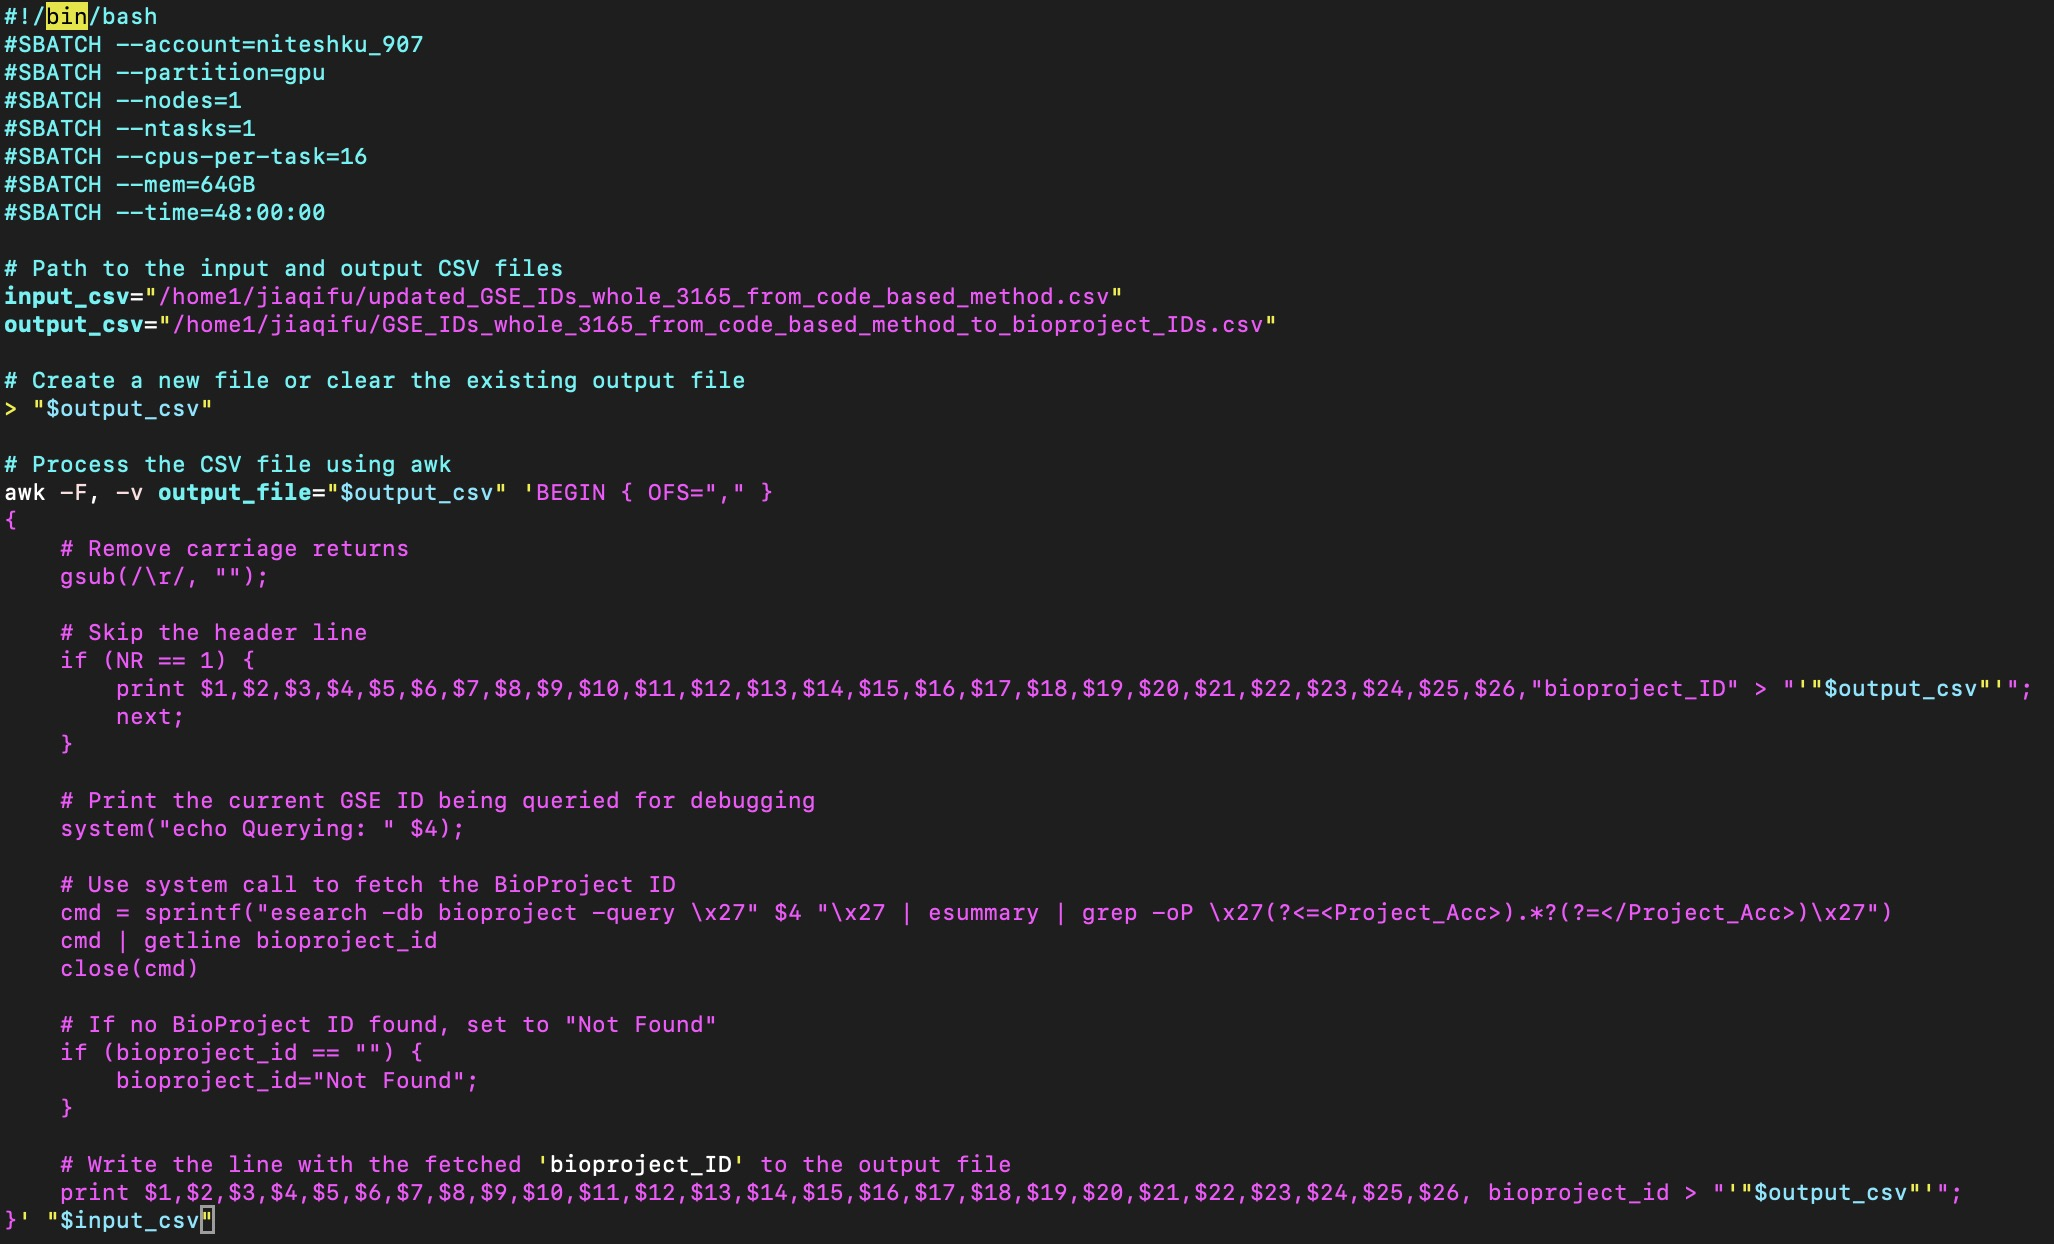

In [ ]:
import pandas as pd

df_GSE_IDs_whole_3165_from_code_based_with_metadata = pd.read_csv("updated_GSE_IDs_whole_3165_from_code_based_method_with_metadata.csv", index_col=False, encoding='utf-8')
print(len(df_GSE_IDs_whole_3165_from_code_based_with_metadata))

3166


In [ ]:
df_GSE_IDs_whole_3165_from_code_based_with_metadata.drop(columns=['Unnamed: 0'], inplace=True)

## Pick out the column "SRR_created_dates" and make a new dataframe

In [ ]:
import csv
df_GSE_IDs_whole_3165_with_SRR_created_dates = df_GSE_IDs_whole_3165_from_code_based_with_metadata[['preprint_doi','published_doi','accession_found','SRR_created_dates']]

csv.field_size_limit(10000000)
df_GSE_IDs_whole_3165_with_SRR_created_dates.to_csv('prepared_3165_GSE_IDs_with_SRR_created_dates.csv',quoting=csv.QUOTE_ALL,encoding='utf-8')

Drop "SRR_created_dates":

In [ ]:
df_GSE_IDs_whole_3165_from_code_based_with_metadata.drop(columns=['SRR_created_dates'], inplace=True)
print(len(df_GSE_IDs_whole_3165_from_code_based_with_metadata))
df_GSE_IDs_whole_3165_from_code_based_with_metadata.head(3)

3166


,preprint_doi,published_doi,accession_found,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,...,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,Sharing Scenario,Associating Sequence data,Method to obtain data,Repository,Library_Strategy,Library_Source,Scientific_Name
0,10.1101/001107,10.1101/gr.181016.114,GSE58871,{'09/23/2014': 7},{'09/23/2014': '100%'},12/3/2013,9/29/2014,NaN,NaN,NaN,...,294,-6,3,GSE IDs in both,Yes,Code based,GEO,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens
1,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,{'07/22/2015': 35},{'07/22/2015': '100%'},6/11/2014,9/18/2014,NaN,NaN,NaN,...,-33,-132,1,GSE IDs in both,Yes,Code based,GEO,Bisulfite-Seq,GENOMIC,Homo sapiens
2,10.1101/006270,10.7554/eLife.03915,GSE58423,"{'06/15/2014': 1, '07/20/2014': 1, '07/22/2015...","{'06/15/2014': '4.5%', '07/20/2014': '4.5%', '...",6/12/2014,11/7/2014,4.50%,4.60%,90.90%,...,1,-147,3,GSE IDs in both,Yes,Code based,GEO,RNA-Seq,TRANSCRIPTOMIC,Mus musculus


## Adjust sequence of columns

In [ ]:
# List of columns to move to the front
columns_to_move = ["Repository", "Sharing Scenario", "Associating Sequence data", "Method to obtain data", "Library_Strategy", "Library_Source", "Scientific_Name"]
new_order = columns_to_move + [col for col in df_GSE_IDs_whole_3165_from_code_based_with_metadata.columns if col not in columns_to_move]
df_GSE_IDs_whole_3165_from_code_based_with_metadata = df_GSE_IDs_whole_3165_from_code_based_with_metadata[new_order]
df_GSE_IDs_whole_3165_from_code_based_with_metadata.head(3)

,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,accession_found,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/001107,10.1101/gr.181016.114,GSE58871,...,9/23/2014,9/23/2014,9/23/2014,9/23/2014,294.0,-6.0,3.0,294,-6,3
1,GEO,GSE IDs in both,Yes,Code based,Bisulfite-Seq,GENOMIC,Homo sapiens,10.1101/006171,10.1371/journal.pgen.1004663,GSE57483,...,5/9/2014,7/22/2015,7/22/2015,7/22/2015,406.0,307.0,5.0,-33,-132,1
2,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/006270,10.7554/eLife.03915,GSE58423,...,6/13/2014,7/22/2015,6/15/2014,6/15/2014,3.0,-145.0,3.0,1,-147,3


## Concatenate GSE IDs from code based method and manual check method together

In [ ]:
import pandas as pd

df_GSE_IDs_whole_1117_from_manual_check = pd.read_csv("ultimate_df_total_1117_GSE_IDs_from_manual_final.csv", index_col=False)
df_GSE_IDs_whole_1117_from_manual_check.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,0,GEO,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,...,2/26/2019,2/27/2019,2/27/2019,2/27/2019,118.0,-140.0,3.0,117,-141,3
1,1,GEO,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,...,4/23/2019,4/23/2019,4/23/2019,4/23/2019,211.0,0.0,4.0,211,0,4
2,2,GEO,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,...,7/2/2019,7/8/2019,7/8/2019,7/8/2019,325.0,-43.0,3.0,319,-49,3


In [ ]:
df_GSE_IDs_whole_1117_from_manual_check.drop(columns=['Unnamed: 0','bioproject_ID'],inplace=True)

df_GSE_IDs_whole_1117_from_manual_check.rename(columns={'publication_doi': 'published_doi'}, inplace=True)
df_GSE_IDs_whole_1117_from_manual_check.head(3)

,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,accession_found,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,GEO,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,...,2/26/2019,2/27/2019,2/27/2019,2/27/2019,118.0,-140.0,3.0,117,-141,3
1,GEO,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,...,4/23/2019,4/23/2019,4/23/2019,4/23/2019,211.0,0.0,4.0,211,0,4
2,GEO,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,...,7/2/2019,7/8/2019,7/8/2019,7/8/2019,325.0,-43.0,3.0,319,-49,3


In [ ]:
df_GEO_database_total_4282_GSE_IDs = pd.concat([df_GSE_IDs_whole_3165_from_code_based_with_metadata, df_GSE_IDs_whole_1117_from_manual_check], ignore_index=True)

In [ ]:
df_GEO_database_total_4282_GSE_IDs['Associating Sequence data'].fillna('No', inplace=True)

Do a statistics on how many pairs belonging to "GSE IDs in both" and "GSE IDs only in pub" scenario:

In [ ]:
count_in_both = df_GEO_database_total_4282_GSE_IDs[df_GEO_database_total_4282_GSE_IDs['Sharing Scenario'] == 'GSE IDs in both'].shape[0]
print(count_in_both)

count_only_in_pub = df_GEO_database_total_4282_GSE_IDs[df_GEO_database_total_4282_GSE_IDs['Sharing Scenario'] == 'GSE IDs only in pub'].shape[0]
print(count_only_in_pub)

2230
2053


Do a statistics on how many GSE IDs associate with seuqencing data and how many don't:

In [ ]:
count_associated = df_GEO_database_total_4282_GSE_IDs[df_GEO_database_total_4282_GSE_IDs['Associating Sequence data'] == 'Yes'].shape[0]
print(count_associated)

count_do_not_associated = df_GEO_database_total_4282_GSE_IDs[df_GEO_database_total_4282_GSE_IDs['Associating Sequence data'] == 'No'].shape[0]
print(count_do_not_associated)

3825
458


In [ ]:
df_GEO_database_total_4282_GSE_IDs.to_csv("final_total_4282_GSE_IDs_with_ultimate_analysis.csv")

# Extract number of citations

# **Finally, check for false positive results, duplicated results**

## Drop Duplicated pairs of GSE IDs and studies. Duplicated GSE IDs are caused by recorded twice(through code based and manaul check)

In [ ]:
import pandas as pd
df_whole_4282_in_general = pd.read_csv("final_total_4282_GSE_IDs_with_ultimate_analysis_and_numberofcitations.csv", index_col=False)
duplicates = df_whole_4282_in_general.duplicated(subset=['preprint_doi', 'published_doi', 'accession_found','number_of_citations'], keep=False)

duplicate_rows = df_whole_4282_in_general[duplicates]
duplicate_rows_checking = duplicate_rows.groupby(['preprint_doi', 'published_doi', 'accession_found', 'number_of_citations']).agg({
    'Sharing Scenario': ','.join,
    'Method to obtain data': ','.join,
    }).reset_index()

In [ ]:
duplicate_rows_checking

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
0,10.1101/001479,10.3389/fgene.2015.00352,GSE75457,53,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,96,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
2,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,135,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
3,10.1101/012757,10.1534/g3.115.019497,GSE63488,15,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
4,10.1101/013250,10.1101/gr.188516.114,GSE64061,16,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
...,...,...,...,...,...,...
843,10.1101/868281,10.1167/iovs.61.8.39,GSE142635,12,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
844,10.1101/868281,10.1167/iovs.61.8.39,GSE142636,12,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
845,10.1101/870352,10.1038/s41467-021-22639-6,GSE166503,8,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
846,10.1101/870378,10.1186/s13059-020-02070-8,GSE136685,19,"GSE IDs in both,GSE IDs in both","Code based,Manual check"


### There are inconsistent result between code-based and manual-checked, let's identify these scenarios:

In [ ]:
duplicate_rows_checking.loc[(duplicate_rows_checking['Sharing Scenario'] == 'GSE IDs in both,GSE IDs in both') & (duplicate_rows_checking['Method to obtain data'] == 'Code based,Manual check')]

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,96,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
3,10.1101/012757,10.1534/g3.115.019497,GSE63488,15,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
4,10.1101/013250,10.1101/gr.188516.114,GSE64061,16,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
5,10.1101/019794,10.1093/toxsci/kfv195,GSE62843,20,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
6,10.1101/024117,10.1101/gr.197897.115,GSE69749,55,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
...,...,...,...,...,...,...
841,10.1101/867903,10.1186/s13059-019-1915-9,GSE119168,35,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
842,10.1101/867903,10.1186/s13059-019-1915-9,GSE119490,35,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
843,10.1101/868281,10.1167/iovs.61.8.39,GSE142635,12,"GSE IDs in both,GSE IDs in both","Code based,Manual check"
844,10.1101/868281,10.1167/iovs.61.8.39,GSE142636,12,"GSE IDs in both,GSE IDs in both","Code based,Manual check"


In [ ]:
duplicate_rows_checking.loc[(duplicate_rows_checking['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs only in pub') & (duplicate_rows_checking['Method to obtain data'] == 'Code based,Manual check')]

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
0,10.1101/001479,10.3389/fgene.2015.00352,GSE75457,53,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
7,10.1101/025288,10.1371/journal.pgen.1005819,GSE77136,14,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
11,10.1101/026948,10.1038/nmeth.3734,GSE76005,213,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
17,10.1101/044693,10.1261/rna.057208.116,GSE81121,17,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
27,10.1101/083949,10.1101/gad.290155.116,GSE94704,31,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
...,...,...,...,...,...,...
817,10.1101/828707,10.1038/s41388-020-01429-2,GSE150475,19,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
821,10.1101/830794,10.1038/s41598-020-73942-z,GSE124688,4,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
827,10.1101/840884,10.1038/s41467-021-22489-2,GSE168234,7,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"
845,10.1101/870352,10.1038/s41467-021-22639-6,GSE166503,8,"GSE IDs only in pub,GSE IDs only in pub","Code based,Manual check"


In [ ]:
duplicate_rows_checking.loc[(duplicate_rows_checking['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs in both') & (duplicate_rows_checking['Method to obtain data'] == 'Code based,Manual check')]

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
2,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,135,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
9,10.1101/026831,10.1371/journal.pgen.1006338,GSE73502,56,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
13,10.1101/030650,10.1128/mSystems.00025-15,GSE67038,56,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
20,10.1101/050989,10.1038/srep31597,GSE80818,18,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
22,10.1101/050989,10.1038/srep31597,GSE81104,18,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
...,...,...,...,...,...,...
829,10.1101/845768,10.1093/nar/gkaa473,GSE138173,32,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
830,10.1101/845768,10.1093/nar/gkaa473,GSE138476,32,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
832,10.1101/848358,10.1111/all.14633,GSE128074,23,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"
834,10.1101/848952,10.1038/s41388-020-01389-7,GSE135942,11,"GSE IDs only in pub,GSE IDs in both","Code based,Manual check"


In [ ]:
duplicate_rows_checking.loc[(duplicate_rows_checking['Sharing Scenario'] == 'GSE IDs in both,GSE IDs only in pub') & (duplicate_rows_checking['Method to obtain data'] == 'Code based,Manual check')]

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
44,10.1101/182691,10.1093/nar/gkx951,GSE89831,31,"GSE IDs in both,GSE IDs only in pub","Code based,Manual check"
694,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE132951,21,"GSE IDs in both,GSE IDs only in pub","Code based,Manual check"


Overwrite duplicated or erronous values

In [ ]:
def overwrite_the_content(row):

    # The following two conditions marked duplicated checking results, and results are consistent:
    if row['Sharing Scenario'] == 'GSE IDs in both,GSE IDs in both':
        row['Sharing Scenario'] = 'GSE IDs in both'

    elif row['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs only in pub':
        row['Sharing Scenario'] = 'GSE IDs only in pub'


    # The following condition marked inconsistent result from code based and manual check, the manual check result "GSE IDs only in pub" is not correct, these GSE IDs are mentioned in preprints:
    elif row['Sharing Scenario'] == 'GSE IDs in both,GSE IDs only in pub':
        row['Sharing Scenario'] = 'GSE IDs in both'


    # The following condition marked inconsistent result from code based and manual check, the code based result "GSE IDs only in pub" is not correct, these GSE IDs are mentioned in preprints:
    elif row['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs in both':
        row['Sharing Scenario'] = 'GSE IDs in both'

    row['Method to obtain data'] = 'Code based,Manual check'

    return row

new  = duplicate_rows_checking.apply(overwrite_the_content, axis=1)
new

,preprint_doi,published_doi,accession_found,number_of_citations,Sharing Scenario,Method to obtain data
0,10.1101/001479,10.3389/fgene.2015.00352,GSE75457,53,GSE IDs only in pub,"Code based,Manual check"
1,10.1101/003202,10.1093/hmg/ddu359,GSE50398,96,GSE IDs in both,"Code based,Manual check"
2,10.1101/005611,10.1371/journal.pone.0103207,GSE57440,135,GSE IDs in both,"Code based,Manual check"
3,10.1101/012757,10.1534/g3.115.019497,GSE63488,15,GSE IDs in both,"Code based,Manual check"
4,10.1101/013250,10.1101/gr.188516.114,GSE64061,16,GSE IDs in both,"Code based,Manual check"
...,...,...,...,...,...,...
843,10.1101/868281,10.1167/iovs.61.8.39,GSE142635,12,GSE IDs in both,"Code based,Manual check"
844,10.1101/868281,10.1167/iovs.61.8.39,GSE142636,12,GSE IDs in both,"Code based,Manual check"
845,10.1101/870352,10.1038/s41467-021-22639-6,GSE166503,8,GSE IDs only in pub,"Code based,Manual check"
846,10.1101/870378,10.1186/s13059-020-02070-8,GSE136685,19,GSE IDs in both,"Code based,Manual check"


Drop duplicated values in "final_total_4282_GSE_IDs_with_ultimate_analysis_and_numberofcitations.csv"

In [ ]:
df_whole_4282_in_general_drop_duplicates = df_whole_4282_in_general.drop_duplicates(subset=['preprint_doi', 'published_doi', 'accession_found','number_of_citations'], keep='first')
print(len(df_whole_4282_in_general_drop_duplicates))

3435


Merge the dropped duplicated values dataframe with the corrected dataframe

In [ ]:
merged_df = pd.merge(df_whole_4282_in_general_drop_duplicates, new, on=['preprint_doi', 'published_doi', 'accession_found', 'number_of_citations'], how='left', suffixes=('', '_new'))
merged_df

,Unnamed: 0,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,...,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,PMC,pmid,number_of_citations,Sharing Scenario_new,Method to obtain data_new
0,0,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/001107,10.1101/gr.181016.114,...,-6.0,3.0,294,-6,3,PMC4317169,25267526.0,187,NaN,NaN
1,1,GEO,GSE IDs in both,Yes,Code based,Bisulfite-Seq,GENOMIC,Homo sapiens,10.1101/006171,10.1371/journal.pgen.1004663,...,307.0,5.0,-33,-132,1,PMC4169251,25233095.0,169,NaN,NaN
2,2,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/006270,10.7554/eLife.03915,...,-145.0,3.0,1,-147,3,PMC4381951,25380226.0,65,NaN,NaN
3,3,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Larimichthys crocea,10.1101/008136,10.1371/journal.pgen.1005118,...,111.0,5.0,242,15,5,PMC4383535,25835551.0,92,NaN,NaN
4,4,GEO,GSE IDs in both,Yes,Code based,miRNA-Seq,TRANSCRIPTOMIC,Drosophila melanogaster,10.1101/012757,10.1534/g3.115.019497,...,-33.0,3.0,1,-250,3,PMC4593001,26306531.0,15,GSE IDs in both,"Code based,Manual check"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,4258,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/625954,10.1038/s41598-020-58093-5,...,NaN,NaN,22,-245,3,PMC6981252,31980739.0,12,NaN,NaN
3431,4263,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/271817,10.1186/s13148-018-0499-7,...,NaN,NaN,88,3,5,PMC5964682,29796118.0,11,NaN,NaN
3432,4271,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/2020.08.10.243816,10.1016/j.isci.2021.102510,...,NaN,NaN,-4035,-4302,1,PMC8188360,34142027.0,3,NaN,NaN
3433,4275,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/359521,10.1038/s41556-019-0272-y,...,NaN,NaN,-3716,-3939,1,PMC6528464,30742093.0,29,NaN,NaN


In [ ]:
non_null_count = ((merged_df['Sharing Scenario_new'].notna()) & (merged_df['Method to obtain data_new'].notna())).sum()

print(non_null_count)

848


Update content in columns "Sharing Scenario" and "Method to obtain data" with correct values:

In [ ]:
for index, row in merged_df.iterrows():
    if pd.notna(row['Sharing Scenario_new'] and row['Sharing Scenario_new']):
        merged_df.at[index, 'Sharing Scenario'] = row['Sharing Scenario_new']
        merged_df.at[index, 'Method to obtain data'] = row['Method to obtain data_new']

In [ ]:
merged_df.drop(columns=['Unnamed: 0','Sharing Scenario_new', 'Method to obtain data_new'], inplace=True)

In [ ]:
merged_df.to_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations.csv")

# Take apart into "GSE IDs mentioned in both" and "GSE IDs mentioned only in publication" to apply further analysis

In [ ]:
import pandas as pd

df_GEO_database_total_3434_GSE_IDs_taking_apart = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations.csv", index_col=False)

df_in_both = df_GEO_database_total_3434_GSE_IDs_taking_apart[df_GEO_database_total_3434_GSE_IDs_taking_apart['Sharing Scenario'] == 'GSE IDs in both']
df_only_in_pub = df_GEO_database_total_3434_GSE_IDs_taking_apart[df_GEO_database_total_3434_GSE_IDs_taking_apart['Sharing Scenario'] == 'GSE IDs only in pub']

print(len(df_in_both))
print(len(df_only_in_pub))

1799
1636


In [ ]:
df_in_both.to_csv("1799_GSE_IDs_mentioned_in_both.csv")
df_only_in_pub.to_csv("1636_GSE_IDs_mentioned_only_in_pub.csv")

In [ ]:
in_both_associated = df_in_both[df_in_both['Associating Sequence data'] == 'Yes'].shape[0]
print(in_both_associated)

1607


In [ ]:
only_in_pub_associated = df_only_in_pub[df_only_in_pub['Associating Sequence data'] == 'Yes'].shape[0]
print(only_in_pub_associated)

1461


# Obtain "preprint platform" information

In [ ]:
import pandas as pd
df_GEO_database_total_3434_GSE_IDs = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations.csv", index_col=False)
df_106k = pd.read_csv("106k_preprints.csv", index_col=False)

# Make sure that these columns do not contain any space which will cause mismatches
df_GEO_database_total_3434_GSE_IDs['preprint_doi'] = df_GEO_database_total_3434_GSE_IDs['preprint_doi'].str.strip()
df_GEO_database_total_3434_GSE_IDs['published_doi'] = df_GEO_database_total_3434_GSE_IDs['published_doi'].str.strip()
df_106k['preprint_doi'] = df_106k['preprint_doi'].str.strip()
df_106k['published_doi'] = df_106k['published_doi'].str.strip()

df_6834_only_with_preprint_platform = df_106k[['preprint_doi','published_doi','preprint_platform']]
get_preprint_platform = pd.merge(df_GEO_database_total_3434_GSE_IDs, df_6834_only_with_preprint_platform, on=['preprint_doi', 'published_doi'], how='left')
get_preprint_platform

,Unnamed: 0,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,...,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,PMC,pmid,number_of_citations,preprint_platform
0,0,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/001107,10.1101/gr.181016.114,...,294.0,-6.0,3.0,294,-6,3,PMC4317169,25267526.0,187,bioRxiv
1,1,GEO,GSE IDs in both,Yes,Code based,Bisulfite-Seq,GENOMIC,Homo sapiens,10.1101/006171,10.1371/journal.pgen.1004663,...,406.0,307.0,5.0,-33,-132,1,PMC4169251,25233095.0,169,bioRxiv
2,2,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/006270,10.7554/eLife.03915,...,3.0,-145.0,3.0,1,-147,3,PMC4381951,25380226.0,65,bioRxiv
3,3,GEO,GSE IDs in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Larimichthys crocea,10.1101/008136,10.1371/journal.pgen.1005118,...,338.0,111.0,5.0,242,15,5,PMC4383535,25835551.0,92,bioRxiv
4,4,GEO,GSE IDs in both,Yes,"Code based,Manual check",miRNA-Seq,TRANSCRIPTOMIC,Drosophila melanogaster,10.1101/012757,10.1534/g3.115.019497,...,218.0,-33.0,3.0,1,-250,3,PMC4593001,26306531.0,15,bioRxiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,3430,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/625954,10.1038/s41598-020-58093-5,...,NaN,NaN,NaN,22,-245,3,PMC6981252,31980739.0,12,bioRxiv
3436,3431,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/271817,10.1186/s13148-018-0499-7,...,NaN,NaN,NaN,88,3,5,PMC5964682,29796118.0,11,bioRxiv
3437,3432,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/2020.08.10.243816,10.1016/j.isci.2021.102510,...,NaN,NaN,NaN,-4035,-4302,1,PMC8188360,34142027.0,3,bioRxiv
3438,3433,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/359521,10.1038/s41556-019-0272-y,...,NaN,NaN,NaN,-3716,-3939,1,PMC6528464,30742093.0,29,bioRxiv


In [ ]:
get_preprint_platform['preprint_platform'].isna().sum()

0

In [ ]:
get_preprint_platform.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
get_preprint_platform.drop_duplicates(subset=['preprint_doi','published_doi','preprint_platform','accession_found','Sharing Scenario','Method to obtain data'], keep='first', inplace=True)

In [ ]:
print(len(get_preprint_platform))

3435


In [ ]:
get_preprint_platform.reset_index(drop=True, inplace=True)

In [ ]:
get_preprint_platform.to_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_platform.csv")

# Fill nan values for three columns: "Library_Strategy"; "Scientific_Name"

In [ ]:
import pandas as pd

df_GEO_database_total_3434_GSE_IDs = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_platform.csv",index_col=False)
converted_doi = pd.read_csv("Mohammad_doi.csv", index_col=False)

df_GEO_database_total_3434_GSE_IDs['published_doi'] = df_GEO_database_total_3434_GSE_IDs['published_doi'].str.strip()
converted_doi['published_doi'] = converted_doi['published_doi'].str.strip()

nan_values = df_GEO_database_total_3434_GSE_IDs[df_GEO_database_total_3434_GSE_IDs['Scientific_Name'].isna()]
nan_values

,Unnamed: 0,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,...,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,PMC,pmid,number_of_citations,preprint_platform
247,247,GEO,GSE IDs in both,Yes,Code based,NaN,NaN,NaN,10.1101/2021.05.13.443721,10.1002/ctm2.534,...,82.0,-47.0,3.0,78,-51,3,PMC8453261,34586723.0,7,bioRxiv
358,358,GEO,GSE IDs in both,Yes,Code based,NaN,NaN,NaN,10.1101/2021.10.14.464415,10.1093/nar/gkab1175,...,-50.0,-79.0,1.0,-50,-79,1,PMC8682779,34883507.0,12,bioRxiv
726,726,GEO,GSE IDs in both,Yes,Code based,NaN,NaN,NaN,10.1101/651356,10.1038/s41467-020-15758-z,...,300.0,-29.0,3.0,300,-29,3,PMC7171179,32313019.0,33,bioRxiv
1049,1049,GEO,GSE IDs in both,Yes,Code based,NaN,NaN,NaN,10.1101/2020.06.11.146142,10.7554/eLife.59929,...,-14.0,-145.0,1.0,-14,-145,1,PMC7644215,33084571.0,18,bioRxiv
1065,1065,GEO,GSE IDs in both,Yes,Code based,NaN,NaN,NaN,10.1101/2020.06.20.162743,10.1186/s13059-020-02124-x,...,37.0,-25.0,3.0,37,-25,3,PMC7441554,32819438.0,27,bioRxiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,3430,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/625954,10.1038/s41598-020-58093-5,...,NaN,NaN,NaN,22,-245,3,PMC6981252,31980739.0,12,bioRxiv
3431,3431,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/271817,10.1186/s13148-018-0499-7,...,NaN,NaN,NaN,88,3,5,PMC5964682,29796118.0,11,bioRxiv
3432,3432,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/2020.08.10.243816,10.1016/j.isci.2021.102510,...,NaN,NaN,NaN,-4035,-4302,1,PMC8188360,34142027.0,3,bioRxiv
3433,3433,GEO,GSE IDs only in pub,No,Manual check,NaN,NaN,NaN,10.1101/359521,10.1038/s41556-019-0272-y,...,NaN,NaN,NaN,-3716,-3939,1,PMC6528464,30742093.0,29,bioRxiv


In [ ]:
nan_values.rename(columns={'accession_found': 'accession'}, inplace=True)

<ipython-input-60-1b3d8045bd5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_values.rename(columns={'accession_found': 'accession'}, inplace=True)


In [ ]:
selected_columns = converted_doi[['published_doi', 'accession', 'species', 'library_strategy']]
merged_with_species = pd.merge(nan_values,selected_columns,on=['published_doi','accession'],how='left')

In [ ]:
merged_with_species.drop(columns=['Library_Strategy','Scientific_Name'], inplace=True)

In [ ]:
merged_with_species.rename(columns={'species': 'Scientific_Name', 'library_strategy': 'Library_Strategy'}, inplace=True)

In [ ]:
last_col = merged_with_species.columns[-1]
second_last_col = merged_with_species.columns[-2]

cols = list(merged_with_species.columns)
cols.remove(last_col)
cols.remove(second_last_col)

cols.insert(4, last_col)
cols.insert(6, second_last_col)

merged_with_species = merged_with_species[cols]

In [ ]:
merged_with_species

,Unnamed: 0,Repository,Sharing Scenario,Associating Sequence data,Library_Strategy,Method to obtain data,Scientific_Name,Library_Source,preprint_doi,published_doi,...,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2,PMC,pmid,number_of_citations,preprint_platform
0,247,GEO,GSE IDs in both,Yes,RNA-Seq,Code based,Homo sapiens,NaN,10.1101/2021.05.13.443721,10.1002/ctm2.534,...,82.0,-47.0,3.0,78,-51,3,PMC8453261,34586723.0,7,bioRxiv
1,358,GEO,GSE IDs in both,Yes,NaN,Code based,Halobacterium salinarum,NaN,10.1101/2021.10.14.464415,10.1093/nar/gkab1175,...,-50.0,-79.0,1.0,-50,-79,1,PMC8682779,34883507.0,12,bioRxiv
2,726,GEO,GSE IDs in both,Yes,RNA-Seq,Code based,Bacillus subtilis subsp. subtilis NCIB 3610 = ...,NaN,10.1101/651356,10.1038/s41467-020-15758-z,...,300.0,-29.0,3.0,300,-29,3,PMC7171179,32313019.0,33,bioRxiv
3,1049,GEO,GSE IDs in both,Yes,RNA-Seq,Code based,Pan troglodytes,NaN,10.1101/2020.06.11.146142,10.7554/eLife.59929,...,-14.0,-145.0,1.0,-14,-145,1,PMC7644215,33084571.0,18,bioRxiv
4,1065,GEO,GSE IDs in both,Yes,RNA-Seq,Code based,synthetic construct,NaN,10.1101/2020.06.20.162743,10.1186/s13059-020-02124-x,...,37.0,-25.0,3.0,37,-25,3,PMC7441554,32819438.0,27,bioRxiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,3430,GEO,GSE IDs only in pub,No,Expression_Array,Manual check,Homo sapiens,NaN,10.1101/625954,10.1038/s41598-020-58093-5,...,NaN,NaN,NaN,22,-245,3,PMC6981252,31980739.0,12,bioRxiv
361,3431,GEO,GSE IDs only in pub,No,Expression_Array,Manual check,Homo sapiens,NaN,10.1101/271817,10.1186/s13148-018-0499-7,...,NaN,NaN,NaN,88,3,5,PMC5964682,29796118.0,11,bioRxiv
362,3432,GEO,GSE IDs only in pub,No,Expression_Array,Manual check,Mus musculus,NaN,10.1101/2020.08.10.243816,10.1016/j.isci.2021.102510,...,NaN,NaN,NaN,-4035,-4302,1,PMC8188360,34142027.0,3,bioRxiv
363,3433,GEO,GSE IDs only in pub,No,Expression_Array,Manual check,Oryza sativa,NaN,10.1101/359521,10.1038/s41556-019-0272-y,...,NaN,NaN,NaN,-3716,-3939,1,PMC6528464,30742093.0,29,bioRxiv


In [ ]:
merged_with_species = merged_with_species.set_index("Unnamed: 0")

In [ ]:
df_GEO_database_total_3434_GSE_IDs.update(merged_with_species)

In [ ]:
df_GEO_database_total_3434_GSE_IDs.to_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_platform_and_updated_metadata.csv")

# Calculate date interval between "latest_SRR_published_date" and "paper_publish_date_1"

In [ ]:
from datetime import datetime
import numpy as np

df_updated = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_platform_and_updated_metadata.csv",index_col=False)

df_updated['paper_publish_date_1'] = pd.to_datetime(df_updated['paper_publish_date_1'], format='%m/%d/%Y')
df_updated['latest_SRR_published_date'] = pd.to_datetime(df_updated['latest_SRR_published_date'], format='%m/%d/%Y')

df_updated['days_later_than_paper_posting'] = (df_updated['latest_SRR_published_date'] - df_updated['paper_publish_date_1']).dt.days

df_updated.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [ ]:
df_updated.to_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_whole_analysis.csv")

# Group GSE IDs based on studies(preprint doi and publication doi)

In [ ]:
import pandas as pd
import statistics

df_whole_3434 = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_platform.csv", index_col=False)
selected_columns = ['Repository','Sharing Scenario','preprint_doi','published_doi','preprint_platform','accession_found','preprint_publish_date_1','paper_publish_date_1','time_pin_2','number_of_citations']

updated_df_whole_3434 = df_whole_3434[selected_columns]
updated_df_whole_3434['time_pin_2'] = updated_df_whole_3434['time_pin_2'].astype(str)
updated_df_whole_3434['number_of_citations'] = updated_df_whole_3434['number_of_citations'].astype(str)

<ipython-input-16-de9be41e0fc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_3434['time_pin_2'] = updated_df_whole_3434['time_pin_2'].astype(str)
<ipython-input-16-de9be41e0fc3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_3434['number_of_citations'] = updated_df_whole_3434['number_of_citations'].astype(str)


In [ ]:
def make_a_dictionary(row):
    scenario_dict = {}
    scenario_dict['GSE ID'] = row['accession_found']
    scenario_dict['Repository'] = row['Repository']
    scenario_dict['Sharing Scenario'] = row['Sharing Scenario']
    scenario_dict['Marker'] = row['time_pin_2']
    return scenario_dict

updated_df_whole_3434['set'] = updated_df_whole_3434.apply(make_a_dictionary, axis=1)

<ipython-input-17-a1e06a78b582>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_3434['set'] = updated_df_whole_3434.apply(make_a_dictionary, axis=1)


In [ ]:
updated_df_whole_3434

,Repository,Sharing Scenario,preprint_doi,published_doi,preprint_platform,accession_found,preprint_publish_date_1,paper_publish_date_1,time_pin_2,number_of_citations,set
0,GEO,GSE IDs in both,10.1101/001107,10.1101/gr.181016.114,bioRxiv,GSE58871,12/3/2013,9/29/2014,3,187,"{'GSE ID': 'GSE58871', 'Repository': 'GEO', 'S..."
1,GEO,GSE IDs in both,10.1101/006171,10.1371/journal.pgen.1004663,bioRxiv,GSE57483,6/11/2014,9/18/2014,1,169,"{'GSE ID': 'GSE57483', 'Repository': 'GEO', 'S..."
2,GEO,GSE IDs in both,10.1101/006270,10.7554/eLife.03915,bioRxiv,GSE58423,6/12/2014,11/7/2014,3,65,"{'GSE ID': 'GSE58423', 'Repository': 'GEO', 'S..."
3,GEO,GSE IDs in both,10.1101/008136,10.1371/journal.pgen.1005118,bioRxiv,GSE57608,8/18/2014,4/2/2015,5,92,"{'GSE ID': 'GSE57608', 'Repository': 'GEO', 'S..."
4,GEO,GSE IDs in both,10.1101/012757,10.1534/g3.115.019497,bioRxiv,GSE63488,12/16/2014,8/24/2015,3,15,"{'GSE ID': 'GSE63488', 'Repository': 'GEO', 'S..."
...,...,...,...,...,...,...,...,...,...,...,...
3430,GEO,GSE IDs only in pub,10.1101/625954,10.1038/s41598-020-58093-5,bioRxiv,GSE129266,5/2/2019,1/24/2020,3,12,"{'GSE ID': 'GSE129266', 'Repository': 'GEO', '..."
3431,GEO,GSE IDs only in pub,10.1101/271817,10.1186/s13148-018-0499-7,bioRxiv,GSE103010,2/26/2018,5/22/2018,5,11,"{'GSE ID': 'GSE103010', 'Repository': 'GEO', '..."
3432,GEO,GSE IDs only in pub,10.1101/2020.08.10.243816,10.1016/j.isci.2021.102510,bioRxiv,GSE17297,8/10/2020,5/4/2021,1,3,"{'GSE ID': 'GSE17297', 'Repository': 'GEO', 'S..."
3433,GEO,GSE IDs only in pub,10.1101/359521,10.1038/s41556-019-0272-y,bioRxiv,GSE11021,7/3/2018,2/11/2019,1,29,"{'GSE ID': 'GSE11021', 'Repository': 'GEO', 'S..."


In [ ]:
updated_df_whole_3434['preprint_doi'] = updated_df_whole_3434['preprint_doi'].astype(str).str.replace(' ','')
updated_df_whole_3434['published_doi'] = updated_df_whole_3434['published_doi'].astype(str).replace(' ','')
updated_df_whole_3434['number_of_citations'] = updated_df_whole_3434['number_of_citations'].astype(str).replace(' ','')
updated_df_whole_3434['preprint_publish_date_1'] = updated_df_whole_3434['preprint_publish_date_1'].astype(str).replace(' ','')
updated_df_whole_3434['paper_publish_date_1'] = updated_df_whole_3434['paper_publish_date_1'].astype(str).replace(' ','')

<ipython-input-19-6ac2d8d0daa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_3434['preprint_doi'] = updated_df_whole_3434['preprint_doi'].astype(str).str.replace(' ','')
<ipython-input-19-6ac2d8d0daa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_3434['published_doi'] = updated_df_whole_3434['published_doi'].astype(str).replace(' ','')
<ipython-input-19-6ac2d8d0daa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
def agg_dict_to_str(values):
    return ', '.join(map(str, values))

grouped_df = updated_df_whole_3434.groupby(['preprint_doi', 'published_doi','preprint_platform','preprint_publish_date_1','paper_publish_date_1','number_of_citations']).agg({
    'set': agg_dict_to_str,
    'accession_found': ','.join,
    'Sharing Scenario': ','.join,
    'time_pin_2': ','.join
}).reset_index()

In [ ]:
print(len(grouped_df))

2793


In [ ]:
grouped_df

,preprint_doi,published_doi,preprint_platform,preprint_publish_date_1,paper_publish_date_1,number_of_citations,set,accession_found,Sharing Scenario,time_pin_2
0,10.1101/001107,10.1101/gr.181016.114,bioRxiv,12/3/2013,9/29/2014,187,"{'GSE ID': 'GSE58871', 'Repository': 'GEO', 'S...",GSE58871,GSE IDs in both,3
1,10.1101/001479,10.3389/fgene.2015.00352,bioRxiv,12/19/2013,12/4/2015,53,"{'GSE ID': 'GSE75457', 'Repository': 'GEO', 'S...",GSE75457,GSE IDs only in pub,4
2,10.1101/002006,10.1186/1471-2164-15-962,bioRxiv,1/23/2014,11/7/2014,43,"{'GSE ID': 'GSE54119', 'Repository': 'GEO', 'S...",GSE54119,GSE IDs in both,5
3,10.1101/003202,10.1093/hmg/ddu359,bioRxiv,3/5/2014,7/11/2014,96,"{'GSE ID': 'GSE50398', 'Repository': 'GEO', 'S...",GSE50398,GSE IDs in both,5
4,10.1101/003293,10.1101/gad.241422.114,bioRxiv,3/13/2014,10/1/2014,173,"{'GSE ID': 'GSE53463', 'Repository': 'GEO', 'S...",GSE53463,GSE IDs only in pub,5
...,...,...,...,...,...,...,...,...,...,...
2788,10.1101/870451,10.1534/genetics.120.303155,bioRxiv,12/9/2019,3/7/2020,6,"{'GSE ID': 'GSE141632', 'Repository': 'GEO', '...",GSE141632,GSE IDs in both,5
2789,10.1101/870766,10.7554/eLife.54341,bioRxiv,12/11/2019,6/3/2020,17,"{'GSE ID': 'GSE140920', 'Repository': 'GEO', '...",GSE140920,GSE IDs only in pub,5
2790,10.1101/871012,10.1016/j.isci.2020.101183,bioRxiv,12/10/2019,5/18/2020,21,"{'GSE ID': 'GSE134712', 'Repository': 'GEO', '...",GSE134712,GSE IDs in both,5
2791,10.1101/872226,10.1038/s42003-020-1067-1,bioRxiv,12/11/2019,7/3/2020,10,"{'GSE ID': 'GSE146444', 'Repository': 'GEO', '...",GSE146444,GSE IDs only in pub,3


In [ ]:
grouped_df.to_csv("2793_studies_for_3434_GSE_IDs.csv")

In [ ]:
import pandas as pd
df_2793_studies = pd.read_csv('2793_studies_for_3434_GSE_IDs.csv')

def remove_duplicates(scenario_str):
    scenario_list = scenario_str.split(',')
    # Remove duplicates by converting the list to a set, then back to a list
    unique_list = list(set(scenario_list))
    # Sort the list to maintain consistency
    unique_list.sort()
    # Join the list back into a string
    return ','.join(unique_list)

# Apply the function to the 'Sharing Scenario' column
df_2793_studies['Sharing Scenario'] = df_2793_studies['Sharing Scenario'].apply(remove_duplicates)

studies_mentioned_IDs_in_both = df_2793_studies.loc[df_2793_studies['Sharing Scenario']=='GSE IDs in both']

studies_mentioned_IDs_only_in_pub = df_2793_studies.loc[df_2793_studies['Sharing Scenario']=='GSE IDs only in pub']

studies_mentioned_IDs_in_both_and_only_in_pub = df_2793_studies.loc[
    (df_2793_studies['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs in both') |
    (df_2793_studies['Sharing Scenario'] == 'GSE IDs in both,GSE IDs only in pub')
]
print(studies_mentioned_IDs_in_both.shape[0])
print(studies_mentioned_IDs_only_in_pub.shape[0])
print(studies_mentioned_IDs_in_both_and_only_in_pub.shape[0])

1404
1292
97


In [ ]:
df_2793_studies.loc[
    (df_2793_studies['Sharing Scenario'] == 'GSE IDs only in pub,GSE IDs in both') |
    (df_2793_studies['Sharing Scenario'] == 'GSE IDs in both,GSE IDs only in pub'), 'Sharing Scenario'] = "Some GSE IDs in both, others only in publication"

In [ ]:
df_2793_studies.loc[df_2793_studies['Sharing Scenario'] == "Some GSE IDs in both, others only in publication"].shape[0]

97

In [ ]:
df_2793_studies.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_2793_studies['time_pin_2'] = df_2793_studies['time_pin_2'].apply(remove_duplicates)

have_more_than_one_time_pin = df_2793_studies.loc[df_2793_studies['time_pin_2'].str.count(',') >= 1]

print(have_more_than_one_time_pin.shape[0])

118


In [ ]:
have_more_than_one_time_pin

,preprint_doi,published_doi,preprint_platform,preprint_publish_date_1,paper_publish_date_1,number_of_citations,set,accession_found,Sharing Scenario,time_pin_2
59,10.1101/044982,10.1093/nar/gkw457,bioRxiv,3/21/2016,5/20/2016,12,"{'GSE ID': 'GSE77657', 'Repository': 'GEO', 'S...","GSE77657,GSE79119",GSE IDs in both,"1,3"
70,10.1101/052571,10.1186/s13072-016-0078-0,bioRxiv,5/10/2016,7/8/2016,20,"{'GSE ID': 'GSE75984', 'Repository': 'GEO', 'S...","GSE75984,GSE75770",GSE IDs in both,"1,5"
120,10.1101/106955,10.1038/s41467-020-15020-6,bioRxiv,2/8/2017,3/4/2020,36,"{'GSE ID': 'GSE96833', 'Repository': 'GEO', 'S...","GSE96833,GSE94677","Some GSE IDs in both, others only in publication","3,5"
125,10.1101/112862,10.1093/toxsci/kfx101,bioRxiv,3/2/2017,6/7/2017,35,"{'GSE ID': 'GSE85350', 'Repository': 'GEO', 'S...","GSE85350,GSE87701",GSE IDs in both,"3,5"
175,10.1101/165340,10.1038/s41467-018-03694-y,bioRxiv,7/19/2017,4/13/2018,33,"{'GSE ID': 'GSE59779', 'Repository': 'GEO', 'S...","GSE59779,GSE107282,GSE107286,GSE107290,GSE107291",GSE IDs in both,"1,3"
...,...,...,...,...,...,...,...,...,...,...
2624,10.1101/780205,10.3389/fncel.2020.00065,bioRxiv,9/24/2019,3/20/2020,23,"{'GSE ID': 'GSE136455', 'Repository': 'GEO', '...","GSE136455,GSE134163",GSE IDs in both,"1,3"
2628,10.1101/783621,10.1038/s41598-020-62354-8,bioRxiv,9/26/2019,3/26/2020,14,"{'GSE ID': 'GSE135454', 'Repository': 'GEO', '...","GSE135454,GSE135183",GSE IDs in both,"1,5"
2632,10.1101/784728,10.7554/eLife.52621,bioRxiv,9/27/2019,6/8/2020,49,"{'GSE ID': 'GSE137878', 'Repository': 'GEO', '...","GSE137878,GSE116342","Some GSE IDs in both, others only in publication","1,3"
2725,10.1101/834507,10.1093/nar/gkz1189,bioRxiv,11/8/2019,12/21/2019,47,"{'GSE ID': 'GSE129523', 'Repository': 'GEO', '...","GSE129523,GSE131733","Some GSE IDs in both, others only in publication","1,3"


In [ ]:
df_2793_studies.to_csv("2793_studies_for_3434_GSE_IDs_with_metadata.csv")

In [ ]:
have_more_than_one_time_pin.to_csv("118_studies_have_more_than_one_time_pin_for_GSE_IDs.csv")

In [ ]:
df_2675_studies_that_only_have_one_time_pin_for_GSEIDs = df_2793_studies.loc[df_2793_studies['time_pin_2'].str.count(',') == 0]
print(len(df_2675_studies_that_only_have_one_time_pin_for_GSEIDs))

2675


In [ ]:
df_2675_studies_that_only_have_one_time_pin_for_GSEIDs.to_csv("df_2675_studies_that_only_have_one_time_pin_for_GSEIDs.csv")